## Telecom Churn - ML Group Case Study

### Problem Statement

#### Business Problem Overview

In the telecom industry, customers are able to choose from multiple service providers and actively switch from one operator to another. In this highly competitive market, the telecommunications industry experiences an average of 15-25% annual churn rate. Given the fact that it costs 5-10 times more to acquire a new customer than to retain an existing one, customer retention has now become even more important than customer acquisition.

For many incumbent operators, retaining high profitable customers is the number one business goal.

To reduce customer churn, telecom companies need to predict which customers are at high risk of churn.

In this project, you will analyse customer-level data of a leading telecom firm, build predictive models to identify customers at high risk of churn and identify the main indicators of churn

### The steps are broadly Devided into:

  1. [Import Libraries and setup environment](#Import)
  2. [Importing the Data](#bbb)
  3. [Inspecting the Dataframe](#ccc)
  4. [Exploratory Data Aanalysis and Data Preparation](#ddd)
  5. [Feature Engineering](#eee)
  6. [Feature Scaling](#nnn)
  7. [Balancing the Dataset](#balance)
  8. [Applying PCA on the Dataset](#fff)
  9. [Logistic Regression With PCA](#ggg)
  10. [LogistcRegression With RFE](#rfe)
  11. [DecisionTreeClassifier With PCA](#iii)
  12. [RandomForestClassifier With PCA](#kkk)
  13. [Recomendation for Final Model Selection (With PCA)](#recomen)
  14. [Summary and Recommendation](#ooo)  
  

<a id='Import'></a>
### Import  Libraries

In [75]:
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')

import matplotlib.pyplot as plt
from matplotlib.pyplot import xticks
import seaborn as sns

from datetime import datetime
from sklearn import linear_model
#from sklearn.linear_model import LinearRegression
#from sklearn.model_selection import GridSearchCV
from sklearn import metrics
#setting maximum number of rows and columns to display
pd.set_option('display.max_columns', 500)
pd.set_option('display.max_rows', 200)

<a id='bbb'></a>
### Importing the Data

In [76]:
# Read the telecom_curen_data file E:\Data\ML 2\Telkom
tel_churn_main_df = pd.read_csv('telecom_churn_data.csv')
tel_churn_main_df.head()

mobile_number  circle_id  loc_og_t2o_mou  std_og_t2o_mou  loc_ic_t2o_mou  \
0     7000842753        109             0.0             0.0             0.0   
1     7001865778        109             0.0             0.0             0.0   
2     7001625959        109             0.0             0.0             0.0   
3     7001204172        109             0.0             0.0             0.0   
4     7000142493        109             0.0             0.0             0.0   

  last_date_of_month_6 last_date_of_month_7 last_date_of_month_8  \
0            6/30/2014            7/31/2014            8/31/2014   
1            6/30/2014            7/31/2014            8/31/2014   
2            6/30/2014            7/31/2014            8/31/2014   
3            6/30/2014            7/31/2014            8/31/2014   
4            6/30/2014            7/31/2014            8/31/2014   

  last_date_of_month_9   arpu_6   arpu_7   arpu_8   arpu_9  onnet_mou_6  \
0            9/30/2014  197.385  214.816  213.803   21.100          NaN   
1            9/30/2014   34.047  355.074  268.321   86.285        24.11   
2            9/30/2014  167.690  189.058  210.226  290.714        11.54   
3            9/30/2014  221.338  251.102  508.054  389.500        99.91   
4            9/30/2014  261.636  309.876  238.174  163.426        50.31   

   onnet_mou_7  onnet_mou_8  onnet_mou_9  offnet_mou_6  offnet_mou_7  \
0          NaN         0.00          NaN           NaN           NaN   
1        78.68         7.68        18.34         15.74         99.84   
2        55.24        37.26        74.81        143.33        220.59   
3        54.39       310.98       241.71        123.31        109.01   
4       149.44        83.89        58.78         76.96         91.88   

   offnet_mou_8  offnet_mou_9  roam_ic_mou_6  roam_ic_mou_7  roam_ic_mou_8  \
0          0.00           NaN            NaN            NaN           0.00   
1        304.76         53.76            0.0           0.00           0.00   
2        208.36        118.91            0.0           0.00           0.00   
3         71.68        113.54            0.0          54.86          44.38   
4        124.26         45.81            0.0           0.00           0.00   

   roam_ic_mou_9  roam_og_mou_6  roam_og_mou_7  roam_og_mou_8  roam_og_mou_9  \
0            NaN            NaN            NaN           0.00            NaN   
1           0.00            0.0           0.00           0.00           0.00   
2          38.49            0.0           0.00           0.00          70.94   
3           0.00            0.0          28.09          39.04           0.00   
4           0.00            0.0           0.00           0.00           0.00   

   loc_og_t2t_mou_6  loc_og_t2t_mou_7  loc_og_t2t_mou_8  loc_og_t2t_mou_9  \
0               NaN               NaN              0.00               NaN   
1             23.88             74.56              7.68             18.34   
2              7.19             28.74             13.58             14.39   
3             73.68             34.81             10.61             15.49   
4             50.31            149.44             83.89             58.78   

   loc_og_t2m_mou_6  loc_og_t2m_mou_7  loc_og_t2m_mou_8  loc_og_t2m_mou_9  \
0               NaN               NaN              0.00               NaN   
1             11.51             75.94            291.86             53.76   
2             29.34             16.86             38.46             28.16   
3            107.43             83.21             22.46             65.46   
4             67.64             91.88            124.26             37.89   

   loc_og_t2f_mou_6  loc_og_t2f_mou_7  loc_og_t2f_mou_8  loc_og_t2f_mou_9  \
0               NaN               NaN              0.00               NaN   
1              0.00              0.00              0.00              0.00   
2             24.11             21.79             15.61             22.24   
3              1.91              0.65              

<a id='ccc'></a>
### Inspecting the Dataframe

In [3]:
tel_churn_main_df.shape

(99999, 226)

In [4]:
# Checking the basic info
tel_churn_main_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99999 entries, 0 to 99998
Columns: 226 entries, mobile_number to sep_vbc_3g
dtypes: float64(179), int64(35), object(12)
memory usage: 172.4+ MB


In [5]:
tel_churn_main_df.describe()

mobile_number  circle_id  loc_og_t2o_mou  std_og_t2o_mou  \
count   9.999900e+04    99999.0         98981.0         98981.0   
mean    7.001207e+09      109.0             0.0             0.0   
std     6.956694e+05        0.0             0.0             0.0   
min     7.000000e+09      109.0             0.0             0.0   
25%     7.000606e+09      109.0             0.0             0.0   
50%     7.001205e+09      109.0             0.0             0.0   
75%     7.001812e+09      109.0             0.0             0.0   
max     7.002411e+09      109.0             0.0             0.0   

       loc_ic_t2o_mou        arpu_6        arpu_7        arpu_8        arpu_9  \
count         98981.0  99999.000000  99999.000000  99999.000000  99999.000000   
mean              0.0    282.987358    278.536648    279.154731    261.645069   
std               0.0    328.439770    338.156291    344.474791    341.998630   
min               0.0  -2258.709000  -2014.045000   -945.808000  -1899.505000   
25%               0.0     93.411500     86.980500     84.126000     62.685000   
50%               0.0    197.704000    191.640000    192.080000    176.849000   
75%               0.0    371.060000    365.344500    369.370500    353.466500   
max               0.0  27731.088000  35145.834000  33543.624000  38805.617000   

        onnet_mou_6   onnet_mou_7   onnet_mou_8   onnet_mou_9  offnet_mou_6  \
count  96062.000000  96140.000000  94621.000000  92254.000000  96062.000000   
mean     132.395875    133.670805    133.018098    130.302327    197.935577   
std      297.207406    308.794148    308.951589    308.477668    316.851613   
min        0.000000      0.000000      0.000000      0.000000      0.000000   
25%        7.380000      6.660000      6.460000      5.330000     34.730000   
50%       34.310000     32.330000     32.360000     29.840000     96.310000   
75%      118.740000    115.595000    115.860000    112.130000    231.860000   
max     7376.710000   8157.780000  10752.560000  10427.460000   8362.360000   

       offnet_mou_7  offnet_mou_8  offnet_mou_9  roam_ic_mou_6  roam_ic_mou_7  \
count  96140.000000  94621.000000  92254.000000   96062.000000   96140.000000   
mean     197.045133    196.574803    190.337222       9.950013       7.149898   
std      325.862803    327.170662    319.396092      72.825411      73.447948   
min        0.000000      0.000000      0.000000       0.000000       0.000000   
25%       32.190000     31.630000     27.130000       0.000000       0.000000   
50%       91.735000     92.140000     87.290000       0.000000       0.000000   
75%      226.815000    228.260000    220.505000       0.000000       0.000000   
max     9667.130000  14007.340000  10310.760000   13724.380000   15371.040000   

       roam_ic_mou_8  roam_ic_mou_9  roam_og_mou_6  roam_og_mou_7  \
count   94621.000000   92254.000000   96062.000000   96140.000000   
mean        7.292981       6.343841      13.911337       9.818732   
std        68.402466      57.137537      71.443196      58.455762   
min         0.000000       0.000000       0.000000       0.000000   
25%         0.000000       0.000000       0.000000       0.000000   
50%         0.000000       0.000000       0.000000       0.000000   
75%         0.000000       0.000000       0.000000       0.000000   
max     13095.360000    8464.030000    3775.110000    2812.040000   

       roam_og_mou_8  roam_og_mou_9  loc_og_t2t_mou_6  loc_og_t2t_mou_7  \
count   94621.000000   92254.000000      96062.000000      96140.000000   
mean        9.971890       8.555519         47.100763         46.473010   
std        64.713221      58.438186        150.856393        155.318705   
min         0.000000       0.000000          0.000000          0.000000   
25%         0.000000       0.000000          1.660000          1.630000   
50%         0.000000       0.000000         11.910000         11.610000   
75%         0.000000       0.000000         40.960000         39.910000   
max      

In [6]:
# Checking for duplicate records in the data set
sum(tel_churn_main_df.duplicated(subset = 'mobile_number')) == 0

True

#### No Duplicate data exist in the dataset

In [7]:
# Let's find out how many numeric feature are there
tel_churn_main_df.select_dtypes(include=['int64','float64']).columns

Index(['mobile_number', 'circle_id', 'loc_og_t2o_mou', 'std_og_t2o_mou',
       'loc_ic_t2o_mou', 'arpu_6', 'arpu_7', 'arpu_8', 'arpu_9', 'onnet_mou_6',
       ...
       'sachet_3g_9', 'fb_user_6', 'fb_user_7', 'fb_user_8', 'fb_user_9',
       'aon', 'aug_vbc_3g', 'jul_vbc_3g', 'jun_vbc_3g', 'sep_vbc_3g'],
      dtype='object', length=214)

In [8]:
# Let's check for how many categorical feature are there
tel_churn_main_df.select_dtypes(include=['object']).columns

Index(['last_date_of_month_6', 'last_date_of_month_7', 'last_date_of_month_8',
       'last_date_of_month_9', 'date_of_last_rech_6', 'date_of_last_rech_7',
       'date_of_last_rech_8', 'date_of_last_rech_9',
       'date_of_last_rech_data_6', 'date_of_last_rech_data_7',
       'date_of_last_rech_data_8', 'date_of_last_rech_data_9'],
      dtype='object')

In [9]:
# Let's check for any non numeric columns
#tel_churn_main_df.select_dtypes(include=['object']).columns

<a id='ddd'></a>
### Exploratory Data Aanalysis and Data Preparation

#### Deriving High Value Customer

In [10]:
# Creating the average recharge amount column based on the June(6) and July(7) total recharge amount
tel_churn_main_df['Avg_Recharge_Amt_Good_Phase'] = (tel_churn_main_df['total_rech_amt_6'] + tel_churn_main_df['total_rech_amt_7'])/2
tel_churn_main_df.head()

mobile_number  circle_id  loc_og_t2o_mou  std_og_t2o_mou  loc_ic_t2o_mou  \
0     7000842753        109             0.0             0.0             0.0   
1     7001865778        109             0.0             0.0             0.0   
2     7001625959        109             0.0             0.0             0.0   
3     7001204172        109             0.0             0.0             0.0   
4     7000142493        109             0.0             0.0             0.0   

  last_date_of_month_6 last_date_of_month_7 last_date_of_month_8  \
0            6/30/2014            7/31/2014            8/31/2014   
1            6/30/2014            7/31/2014            8/31/2014   
2            6/30/2014            7/31/2014            8/31/2014   
3            6/30/2014            7/31/2014            8/31/2014   
4            6/30/2014            7/31/2014            8/31/2014   

  last_date_of_month_9   arpu_6   arpu_7   arpu_8   arpu_9  onnet_mou_6  \
0            9/30/2014  197.385  214.816  213.803   21.100          NaN   
1            9/30/2014   34.047  355.074  268.321   86.285        24.11   
2            9/30/2014  167.690  189.058  210.226  290.714        11.54   
3            9/30/2014  221.338  251.102  508.054  389.500        99.91   
4            9/30/2014  261.636  309.876  238.174  163.426        50.31   

   onnet_mou_7  onnet_mou_8  onnet_mou_9  offnet_mou_6  offnet_mou_7  \
0          NaN         0.00          NaN           NaN           NaN   
1        78.68         7.68        18.34         15.74         99.84   
2        55.24        37.26        74.81        143.33        220.59   
3        54.39       310.98       241.71        123.31        109.01   
4       149.44        83.89        58.78         76.96         91.88   

   offnet_mou_8  offnet_mou_9  roam_ic_mou_6  roam_ic_mou_7  roam_ic_mou_8  \
0          0.00           NaN            NaN            NaN           0.00   
1        304.76         53.76            0.0           0.00           0.00   
2        208.36        118.91            0.0           0.00           0.00   
3         71.68        113.54            0.0          54.86          44.38   
4        124.26         45.81            0.0           0.00           0.00   

   roam_ic_mou_9  roam_og_mou_6  roam_og_mou_7  roam_og_mou_8  roam_og_mou_9  \
0            NaN            NaN            NaN           0.00            NaN   
1           0.00            0.0           0.00           0.00           0.00   
2          38.49            0.0           0.00           0.00          70.94   
3           0.00            0.0          28.09          39.04           0.00   
4           0.00            0.0           0.00           0.00           0.00   

   loc_og_t2t_mou_6  loc_og_t2t_mou_7  loc_og_t2t_mou_8  loc_og_t2t_mou_9  \
0               NaN               NaN              0.00               NaN   
1             23.88             74.56              7.68             18.34   
2              7.19             28.74             13.58             14.39   
3             73.68             34.81             10.61             15.49   
4             50.31            149.44             83.89             58.78   

   loc_og_t2m_mou_6  loc_og_t2m_mou_7  loc_og_t2m_mou_8  loc_og_t2m_mou_9  \
0               NaN               NaN              0.00               NaN   
1             11.51             75.94            291.86             53.76   
2             29.34             16.86             38.46             28.16   
3            107.43             83.21             22.46             65.46   
4             67.64             91.88            124.26             37.89   

   loc_og_t2f_mou_6  loc_og_t2f_mou_7  loc_og_t2f_mou_8  loc_og_t2f_mou_9  \
0               NaN               NaN              0.00               NaN   
1              0.00              0.00              0.00              0.00   
2             24.11             21.79             15.61             22.24   
3              1.91              0.65              

In [11]:
# Checking the distribution of the avg recharge amount during good phase
tel_churn_main_df['Avg_Recharge_Amt_Good_Phase'].describe()

count    99999.000000
mean       325.238792
std        370.833466
min          0.000000
25%        115.000000
50%        229.000000
75%        419.000000
max      37762.500000
Name: Avg_Recharge_Amt_Good_Phase, dtype: float64

In [12]:
# Retrieve the High value customer based on the 70th percentile of the average amount
Q = tel_churn_main_df.Avg_Recharge_Amt_Good_Phase.quantile(0.7)
Q

368.5

In [13]:
# Filter the High Value customer
tel_churn_main_df = tel_churn_main_df[tel_churn_main_df.Avg_Recharge_Amt_Good_Phase > Q]
tel_churn_main_df.shape

(29979, 227)

In [14]:
# Let's see the distribution of the Avg_Recharge_Amt_Good_Phase after filtering
tel_churn_main_df['Avg_Recharge_Amt_Good_Phase'].describe()

count    29979.000000
mean       697.014644
std        488.925223
min        369.000000
25%        450.000000
50%        569.000000
75%        796.000000
max      37762.500000
Name: Avg_Recharge_Amt_Good_Phase, dtype: float64

In [15]:
# Let's check the head
tel_churn_main_df.head()

mobile_number  circle_id  loc_og_t2o_mou  std_og_t2o_mou  loc_ic_t2o_mou  \
7      7000701601        109             0.0             0.0             0.0   
8      7001524846        109             0.0             0.0             0.0   
13     7002191713        109             0.0             0.0             0.0   
16     7000875565        109             0.0             0.0             0.0   
17     7000187447        109             0.0             0.0             0.0   

   last_date_of_month_6 last_date_of_month_7 last_date_of_month_8  \
7             6/30/2014            7/31/2014            8/31/2014   
8             6/30/2014            7/31/2014            8/31/2014   
13            6/30/2014            7/31/2014            8/31/2014   
16            6/30/2014            7/31/2014            8/31/2014   
17            6/30/2014            7/31/2014            8/31/2014   

   last_date_of_month_9    arpu_6    arpu_7    arpu_8   arpu_9  onnet_mou_6  \
7             9/30/2014  1069.180  1349.850  3171.480  500.000        57.84   
8             9/30/2014   378.721   492.223   137.362  166.787       413.69   
13            9/30/2014   492.846   205.671   593.260  322.732       501.76   
16            9/30/2014   430.975   299.869   187.894  206.490        50.51   
17            9/30/2014   690.008    18.980    25.499  257.583      1185.91   

    onnet_mou_7  onnet_mou_8  onnet_mou_9  offnet_mou_6  offnet_mou_7  \
7         54.68        52.29          NaN        453.43        567.16   
8        351.03        35.08        33.46         94.66         80.63   
13       108.39       534.24       244.81        413.31        119.28   
16        74.01        70.61        31.34        296.29        229.74   
17         9.28         7.79       558.51         61.64          0.00   

    offnet_mou_8  offnet_mou_9  roam_ic_mou_6  roam_ic_mou_7  roam_ic_mou_8  \
7         325.91           NaN          16.23          33.49          31.64   
8         136.48        108.71           0.00           0.00           0.00   
13        482.46        214.06          23.53         144.24          72.11   
16        162.76        224.39           0.00           2.83           0.00   
17          5.54         87.89           0.00           4.76           4.81   

    roam_ic_mou_9  roam_og_mou_6  roam_og_mou_7  roam_og_mou_8  roam_og_mou_9  \
7             NaN          23.74          12.59          38.06            NaN   
8            0.00           0.00           0.00           0.00           0.00   
13         136.78           7.98          35.26           1.44          12.78   
16           0.00           0.00          17.74           0.00           0.00   
17           0.00           0.00           8.46          13.34          17.98   

    loc_og_t2t_mou_6  loc_og_t2t_mou_7  loc_og_t2t_mou_8  loc_og_t2t_mou_9  \
7              51.39             31.38             40.28               NaN   
8             297.13            217.59             12.49             26.13   
13             49.63              6.19             36.01              6.14   
16             42.61             65.16             67.38             26.88   
17             38.99              0.00              0.00             36.41   

    loc_og_t2m_mou_6  loc_og_t2m_mou_7  loc_og_t2m_mou_8  loc_og_t2m_mou_9  \
7             308.63            447.38            162.28               NaN   
8              80.96             70.58             50.54             34.58   
13            151.13             47.28            294.46            108.24   
16            273.29            145.99            128.28            201.49   
17             58.54              0.00              0.00              9.38   

    loc_og_t2f_mou_6  loc_og_t2f_mou_7  loc_og_t2f_mou_8  loc_og_t2f_mou_9  \
7              62.13             55.14             53.23               NaN   
8               0.00              0.00              0.00              0.00   
13              4.54              0.00             23.51    

#### Tag Churners and Remove Attributes of The Churn Phase

In [16]:
# Let's print the columns related to the usage of Sep(9) month
tel_churn_main_df[['total_ic_mou_9','total_og_mou_9','vol_2g_mb_9','vol_3g_mb_9']].head()

total_ic_mou_9  total_og_mou_9  vol_2g_mb_9  vol_3g_mb_9
7             0.00            0.00          0.0          0.0
8            34.91          142.18          0.0          0.0
13          631.86          446.09          0.0          0.0
16          334.56          255.74          0.0          0.0
17           87.13          631.08          0.0          0.0

Now tag the churned customers (churn=1 or else 0) based on the fourth month as follows: 
Those who have not made any calls (either incoming or outgoing) and have not used mobile internet even once in the churn phase

In [17]:
# Creating the Churn column based on non usage of any services on 9th month
tel_churn_main_df['Churn'] = np.where(tel_churn_main_df[['total_ic_mou_9','total_og_mou_9','vol_2g_mb_9','vol_3g_mb_9']].sum(axis=1) == 0, 1, 0)

In [18]:
# Inspecting the Churn column
tel_churn_main_df['Churn'].head()

7     1
8     0
13    0
16    0
17    0
Name: Churn, dtype: int32

#### Checking the Churn Rate

In [19]:
churn = (sum(tel_churn_main_df['Churn'])/len(tel_churn_main_df['Churn'].index))*100
churn

8.636045231662164

Text(0.5, 1.0, 'Churn Distribution Plot')

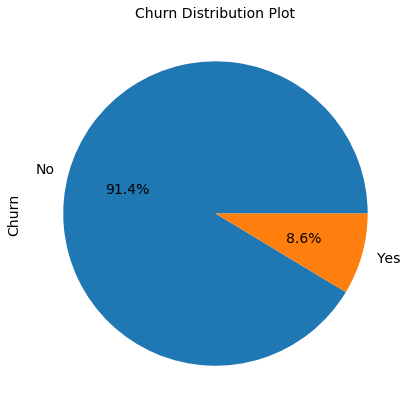

In [20]:
# Checking the churn distribution
axis = (tel_churn_main_df['Churn'].value_counts()*100.0 /len(tel_churn_main_df)).plot.pie(autopct='%.1f%%', labels = ['No', 'Yes'],figsize =(7,7), fontsize = 14 )                                                                           
axis.set_ylabel('Churn',fontsize = 14)
axis.set_title('Churn Distribution Plot', fontsize = 14)

#### From the above plot it is observed that only 8.63% customer churn out and the rest of the customer did not churn. The data is highly imbalanced and we need to take care of it during model building

#### Once tagging is done dropping all the columns related to churn phase
Need to identify all the columns with '_9' at the end and drop them

In [21]:
# Storing the list of columns related to churn phase
churn_phase_drop_col_list = [cols for cols in tel_churn_main_df.columns if '_9' in cols]
# Print the list of churn columns and validate before dropping
print(churn_phase_drop_col_list)

['last_date_of_month_9', 'arpu_9', 'onnet_mou_9', 'offnet_mou_9', 'roam_ic_mou_9', 'roam_og_mou_9', 'loc_og_t2t_mou_9', 'loc_og_t2m_mou_9', 'loc_og_t2f_mou_9', 'loc_og_t2c_mou_9', 'loc_og_mou_9', 'std_og_t2t_mou_9', 'std_og_t2m_mou_9', 'std_og_t2f_mou_9', 'std_og_t2c_mou_9', 'std_og_mou_9', 'isd_og_mou_9', 'spl_og_mou_9', 'og_others_9', 'total_og_mou_9', 'loc_ic_t2t_mou_9', 'loc_ic_t2m_mou_9', 'loc_ic_t2f_mou_9', 'loc_ic_mou_9', 'std_ic_t2t_mou_9', 'std_ic_t2m_mou_9', 'std_ic_t2f_mou_9', 'std_ic_t2o_mou_9', 'std_ic_mou_9', 'total_ic_mou_9', 'spl_ic_mou_9', 'isd_ic_mou_9', 'ic_others_9', 'total_rech_num_9', 'total_rech_amt_9', 'max_rech_amt_9', 'date_of_last_rech_9', 'last_day_rch_amt_9', 'date_of_last_rech_data_9', 'total_rech_data_9', 'max_rech_data_9', 'count_rech_2g_9', 'count_rech_3g_9', 'av_rech_amt_data_9', 'vol_2g_mb_9', 'vol_3g_mb_9', 'arpu_3g_9', 'arpu_2g_9', 'night_pck_user_9', 'monthly_2g_9', 'sachet_2g_9', 'monthly_3g_9', 'sachet_3g_9', 'fb_user_9']


In [22]:
# Drop the above columns
tel_churn_main_df.drop(churn_phase_drop_col_list, axis=1, inplace=True)
tel_churn_main_df.shape

(29979, 174)

#### Handling Null Values and Imputation

In [23]:
# Check for null values and percentages
round(100*(tel_churn_main_df.isnull().sum().sort_values(ascending=False))/len(tel_churn_main_df), 2)

total_rech_data_6              62.02
fb_user_6                      62.02
av_rech_amt_data_6             62.02
count_rech_2g_6                62.02
max_rech_data_6                62.02
arpu_3g_6                      62.02
arpu_2g_6                      62.02
night_pck_user_6               62.02
date_of_last_rech_data_6       62.02
count_rech_3g_6                62.02
arpu_2g_7                      61.13
date_of_last_rech_data_7       61.13
count_rech_3g_7                61.13
count_rech_2g_7                61.13
max_rech_data_7                61.13
total_rech_data_7              61.13
arpu_3g_7                      61.13
night_pck_user_7               61.13
av_rech_amt_data_7             61.13
fb_user_7                      61.13
max_rech_data_8                60.84
count_rech_2g_8                60.84
night_pck_user_8               60.84
fb_user_8                      60.84
arpu_2g_8                      60.84
count_rech_3g_8                60.84
arpu_3g_8                      60.84
a

#### There are lot of columns having 60% and above null values. These columns are of no use and we will drop them

In [24]:
# Prepare the list of the columns having more than 60% null values and drop them
col_list_with_significant_null_values = ['total_rech_data_6','fb_user_6','av_rech_amt_data_6','count_rech_2g_6','max_rech_data_6',
                            'arpu_3g_6','arpu_2g_6','night_pck_user_6','date_of_last_rech_data_6','count_rech_3g_6',
                            'arpu_2g_7','date_of_last_rech_data_7','count_rech_3g_7','count_rech_2g_7','max_rech_data_7',
                            'total_rech_data_7','arpu_3g_7','night_pck_user_7','av_rech_amt_data_7','fb_user_7',
                            'max_rech_data_8','count_rech_2g_8','night_pck_user_8','fb_user_8','arpu_2g_8',
                            'count_rech_3g_8','arpu_3g_8','av_rech_amt_data_8','date_of_last_rech_data_8','total_rech_data_8']

In [25]:
tel_churn_main_df.drop(col_list_with_significant_null_values, axis=1, inplace=True)
tel_churn_main_df.shape

(29979, 144)

#### Now let's check the data for any columns having single / unique values

In [26]:
# List of columns with single / unique value
single_value_col_df = tel_churn_main_df.loc[:, tel_churn_main_df.apply(pd.Series.nunique) == 1]
single_value_col_df.head()

circle_id  loc_og_t2o_mou  std_og_t2o_mou  loc_ic_t2o_mou  \
7         109             0.0             0.0             0.0   
8         109             0.0             0.0             0.0   
13        109             0.0             0.0             0.0   
16        109             0.0             0.0             0.0   
17        109             0.0             0.0             0.0   

   last_date_of_month_6 last_date_of_month_7 last_date_of_month_8  \
7             6/30/2014            7/31/2014            8/31/2014   
8             6/30/2014            7/31/2014            8/31/2014   
13            6/30/2014            7/31/2014            8/31/2014   
16            6/30/2014            7/31/2014            8/31/2014   
17            6/30/2014            7/31/2014            8/31/2014   

    std_og_t2c_mou_6  std_og_t2c_mou_7  std_og_t2c_mou_8  std_ic_t2o_mou_6  \
7                0.0               0.0               0.0               0.0   
8                0.0               0.0               0.0               0.0   
13               0.0               0.0               0.0               0.0   
16               0.0               0.0               0.0               0.0   
17               0.0               0.0               0.0               0.0   

    std_ic_t2o_mou_7  std_ic_t2o_mou_8  
7                0.0               0.0  
8                0.0               0.0  
13               0.0               0.0  
16               0.0               0.0  
17               0.0               0.0

#### We can drop these columns as there is no variance in the data

In [27]:
# Drop the columns with single/unique value
tel_churn_main_df.drop(single_value_col_df.columns, axis=1, inplace=True)
tel_churn_main_df.shape

(29979, 131)

#### Missing Value Imputation

In [28]:
# Check again for remaining null values and percentages
round(100*(tel_churn_main_df.isnull().sum().sort_values(ascending=False))/len(tel_churn_main_df), 2)

isd_ic_mou_8                   3.13
std_og_mou_8                   3.13
loc_og_t2m_mou_8               3.13
loc_og_t2f_mou_8               3.13
loc_ic_t2t_mou_8               3.13
loc_og_mou_8                   3.13
std_og_t2t_mou_8               3.13
loc_ic_t2m_mou_8               3.13
ic_others_8                    3.13
spl_ic_mou_8                   3.13
loc_ic_t2f_mou_8               3.13
std_og_t2m_mou_8               3.13
std_ic_mou_8                   3.13
std_og_t2f_mou_8               3.13
std_ic_t2f_mou_8               3.13
loc_ic_mou_8                   3.13
std_ic_t2m_mou_8               3.13
loc_og_t2t_mou_8               3.13
loc_og_t2c_mou_8               3.13
offnet_mou_8                   3.13
og_others_8                    3.13
isd_og_mou_8                   3.13
spl_og_mou_8                   3.13
onnet_mou_8                    3.13
roam_ic_mou_8                  3.13
std_ic_t2t_mou_8               3.13
roam_og_mou_8                  3.13
date_of_last_rech_8         

In [29]:
# Let's check for any non numeric columns
tel_churn_main_df.select_dtypes(include=['object']).columns

Index(['date_of_last_rech_6', 'date_of_last_rech_7', 'date_of_last_rech_8'], dtype='object')

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30]),
 <a list of 31 Text xticklabel objects>)

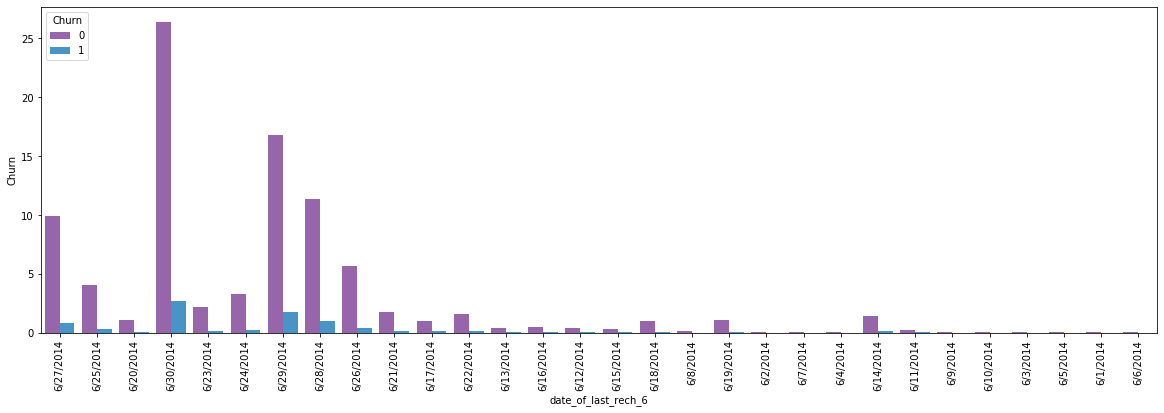

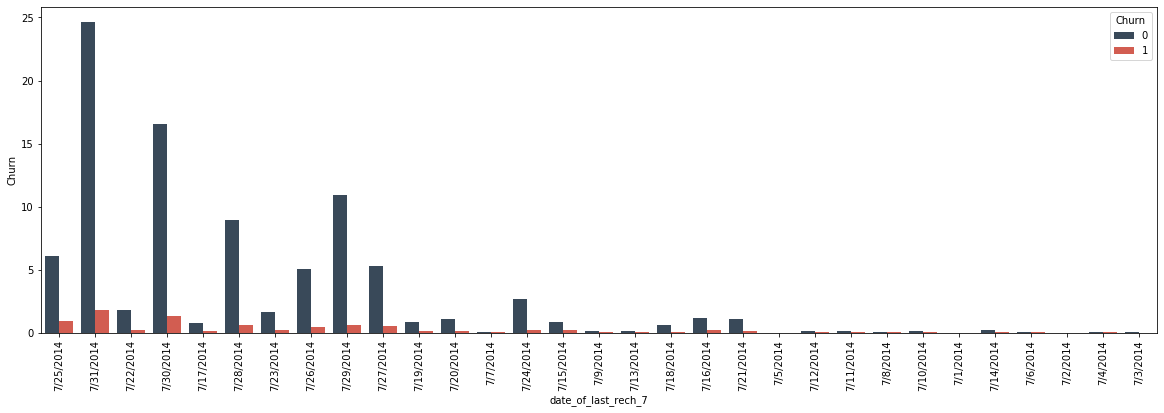

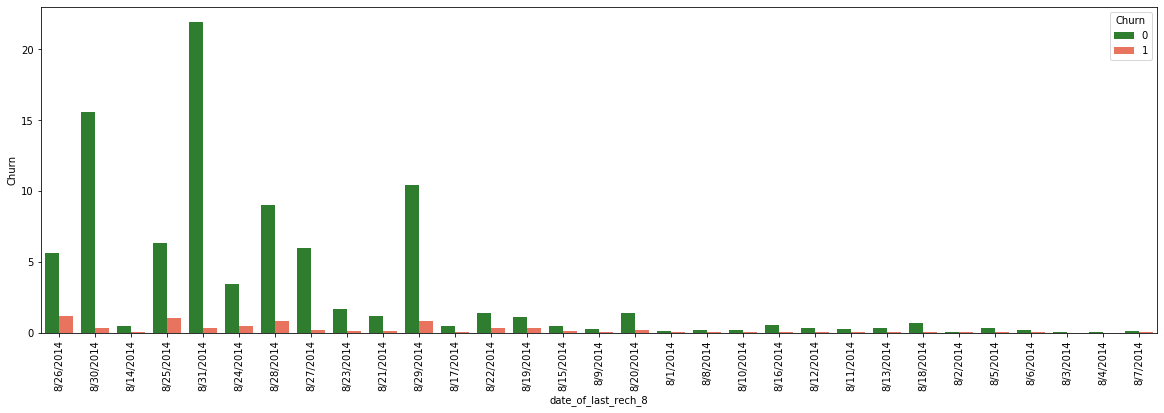

In [30]:
# Compartive data Analysis by Dates

#flatui = ["#9b59b6", "#3498db", "#95a5a6", "#e74c3c", "#34495e", "#2ecc71"]
plt.figure(figsize=(20,6))
palette = ["#9b59b6", "#3498db"]
sns.barplot(x="date_of_last_rech_6", y="Churn", hue="Churn", data=tel_churn_main_df, palette=palette, 
            estimator=lambda x: len(x) / len(tel_churn_main_df) * 100)
xticks(rotation = 90)

plt.figure(figsize=(20,6))
palette = ["#34495e", "#e74c3c"]
sns.barplot(x="date_of_last_rech_7", y="Churn", hue="Churn", data=tel_churn_main_df, palette=palette, 
            estimator=lambda x: len(x) / len(tel_churn_main_df) * 100)

xticks(rotation = 90)

plt.figure(figsize=(20,6))
palette = ["#228B22", "#FF6347"]
sns.barplot(x="date_of_last_rech_8", y="Churn", hue="Churn", data=tel_churn_main_df, palette=palette, 
            estimator=lambda x: len(x) / len(tel_churn_main_df) * 100)

xticks(rotation = 90)

#### From the above plots for 6th, 7th & 8th month, it is concluded that chances of Customer churn increases from 25th of the month

In [31]:
# From the above list there are 3 date columns, which needs a separate treatment for missing value imputation
# We will impute with mode (Maximum Occurance) value for these date columns
tel_churn_main_df['date_of_last_rech_6'].fillna(tel_churn_main_df['date_of_last_rech_6'].mode()[0], inplace=True)
tel_churn_main_df['date_of_last_rech_7'].fillna(tel_churn_main_df['date_of_last_rech_7'].mode()[0], inplace=True)
tel_churn_main_df['date_of_last_rech_8'].fillna(tel_churn_main_df['date_of_last_rech_8'].mode()[0], inplace=True)

In [32]:
# Once the imputation with date column done, let's extract the day value from the date and store it against the date 
# fields for future processing
tel_churn_main_df['date_of_last_rech_6'] = pd.to_datetime(tel_churn_main_df.date_of_last_rech_6).dt.day
tel_churn_main_df['date_of_last_rech_7'] = pd.to_datetime(tel_churn_main_df.date_of_last_rech_7).dt.day
tel_churn_main_df['date_of_last_rech_8'] = pd.to_datetime(tel_churn_main_df.date_of_last_rech_8).dt.day

In [33]:
# Prepare the list of columns having missing values for Imputation
col_having_missing_values = tel_churn_main_df.columns[tel_churn_main_df.isnull().sum()>0]
col_having_missing_values

Index(['onnet_mou_6', 'onnet_mou_7', 'onnet_mou_8', 'offnet_mou_6',
       'offnet_mou_7', 'offnet_mou_8', 'roam_ic_mou_6', 'roam_ic_mou_7',
       'roam_ic_mou_8', 'roam_og_mou_6', 'roam_og_mou_7', 'roam_og_mou_8',
       'loc_og_t2t_mou_6', 'loc_og_t2t_mou_7', 'loc_og_t2t_mou_8',
       'loc_og_t2m_mou_6', 'loc_og_t2m_mou_7', 'loc_og_t2m_mou_8',
       'loc_og_t2f_mou_6', 'loc_og_t2f_mou_7', 'loc_og_t2f_mou_8',
       'loc_og_t2c_mou_6', 'loc_og_t2c_mou_7', 'loc_og_t2c_mou_8',
       'loc_og_mou_6', 'loc_og_mou_7', 'loc_og_mou_8', 'std_og_t2t_mou_6',
       'std_og_t2t_mou_7', 'std_og_t2t_mou_8', 'std_og_t2m_mou_6',
       'std_og_t2m_mou_7', 'std_og_t2m_mou_8', 'std_og_t2f_mou_6',
       'std_og_t2f_mou_7', 'std_og_t2f_mou_8', 'std_og_mou_6', 'std_og_mou_7',
       'std_og_mou_8', 'isd_og_mou_6', 'isd_og_mou_7', 'isd_og_mou_8',
       'spl_og_mou_6', 'spl_og_mou_7', 'spl_og_mou_8', 'og_others_6',
       'og_others_7', 'og_others_8', 'loc_ic_t2t_mou_6', 'loc_ic_t2t_mou_7',
       'lo

#### As all the columns are numeric, observing the columns data, we decided to impute the missing values with median value

In [34]:
# Imputing with mean for all the columns in col_having_missing_values list
for cols in col_having_missing_values:
    tel_churn_main_df[cols].fillna((tel_churn_main_df[cols].median()), inplace=True)

In [35]:
# Check again for any missing values after inputation
round(100*(tel_churn_main_df.isnull().sum().sort_values(ascending=False))/len(tel_churn_main_df), 2)

Churn                          0.0
std_og_t2t_mou_7               0.0
std_og_t2m_mou_6               0.0
std_og_t2m_mou_7               0.0
std_og_t2m_mou_8               0.0
std_og_t2f_mou_6               0.0
std_og_t2f_mou_7               0.0
std_og_t2f_mou_8               0.0
std_og_mou_6                   0.0
std_og_mou_7                   0.0
std_og_mou_8                   0.0
isd_og_mou_6                   0.0
isd_og_mou_7                   0.0
isd_og_mou_8                   0.0
spl_og_mou_6                   0.0
spl_og_mou_7                   0.0
spl_og_mou_8                   0.0
og_others_6                    0.0
og_others_7                    0.0
og_others_8                    0.0
total_og_mou_6                 0.0
total_og_mou_7                 0.0
total_og_mou_8                 0.0
loc_ic_t2t_mou_6               0.0
loc_ic_t2t_mou_7               0.0
loc_ic_t2t_mou_8               0.0
loc_ic_t2m_mou_6               0.0
loc_ic_t2m_mou_7               0.0
loc_ic_t2m_mou_8    

### Outlier Treatment

- Let's check for outliers for some of the features

In [36]:
# Let's check for different percentile values for the different features
tel_churn_main_df.describe(percentiles=[0.10,.25,.5,.75,.90,.95])

mobile_number        arpu_6        arpu_7        arpu_8   onnet_mou_6  \
count   2.997900e+04  29979.000000  29979.000000  29979.000000  29979.000000   
mean    7.001223e+09    587.587624    589.424681    535.067748    297.590611   
std     6.846594e+05    442.848876    463.049067    492.447887    460.257092   
min     7.000000e+09  -2258.709000  -2014.045000   -945.808000      0.000000   
10%     7.000269e+09    270.692200    274.458200    134.118600     12.230000   
25%     7.000641e+09    364.352500    365.235000    289.782000     43.590000   
50%     7.001232e+09    495.951000    493.781000    452.232000    128.480000   
75%     7.001814e+09    704.184500    700.986000    671.349500    353.500000   
90%     7.002167e+09    994.311800    996.051400    985.499200    795.354000   
95%     7.002287e+09   1240.976700   1261.848400   1258.703300   1154.900000   
max     7.002411e+09  27731.088000  35145.834000  33543.624000   7376.710000   

        onnet_mou_7   onnet_mou_8  offnet_mou_6  offnet_mou_7  offnet_mou_8  \
count  29979.000000  29979.000000  29979.000000  29979.000000  29979.000000   
mean     305.886840    271.137938    421.142281    426.990330    383.029940   
std      481.318377    465.205131    468.998414    485.030117    473.464516   
min        0.000000      0.000000      0.000000      0.000000      0.000000   
10%       11.726000      6.906000     58.606000     59.604000     35.072000   
25%       43.370000     34.060000    142.860000    141.280000    111.780000   
50%      128.120000    106.390000    285.990000    285.630000    251.530000   
75%      360.360000    298.215000    523.625000    532.905000    483.000000   
90%      825.486000    724.182000    916.490000    935.716000    854.006000   
95%     1208.691000   1115.857000   1271.757000   1287.221000   1188.523000   
max     8157.780000  10752.560000   8362.360000   9667.130000  14007.340000   

       roam_ic_mou_6  roam_ic_mou_7  roam_ic_mou_8  roam_og_mou_6  \
count   29979.000000   29979.000000   29979.000000   29979.000000   
mean       17.428073      13.535270      13.263074      29.348362   
std        79.192826      76.343222      74.588105     118.629898   
min         0.000000       0.000000       0.000000       0.000000   
10%         0.000000       0.000000       0.000000       0.000000   
25%         0.000000       0.000000       0.000000       0.000000   
50%         0.000000       0.000000       0.000000       0.000000   
75%         0.000000       0.000000       0.000000       0.000000   
90%        32.740000      18.390000      18.664000      64.604000   
95%        94.663000      63.422000      62.813000     168.647000   
max      2613.310000    3813.290000    4169.810000    3775.110000   

       roam_og_mou_7  roam_og_mou_8  loc_og_t2t_mou_6  loc_og_t2t_mou_7  \
count   29979.000000   29979.000000      29979.000000      29979.000000   
mean       22.056425      21.483542         95.084989         96.129949   
std        97.974803     106.294911        236.844869        248.141101   
min         0.000000       0.000000          0.000000          0.000000   
10%         0.000000       0.000000          1.190000          1.460000   
25%         0.000000       0.000000          8.990000          9.770000   
50%         0.000000       0.000000         33.340000         33.890000   
75%         0.000000       0.000000         91.550000         91.535000   
90%        41.216000      37.150000        208.006000        207.880000   
95%       119.447000     114.900000        348.694000        346.993000   
max      2812.040000    5337.040000       6431.330000       7400.660000   

       loc_og_t2t_mou_8  loc_og_t2m_mou_6  loc_og_t2m_mou_7  loc_og_t2m_mou_8  \
count      29979.000000      29979.000000      29979.000000      29979.000000   
mean          88.149189        182.428031        182.396339        170.618259   
std          234.536455        249.663144        240.241486        233.343345   
min            0.000000          0.000000  

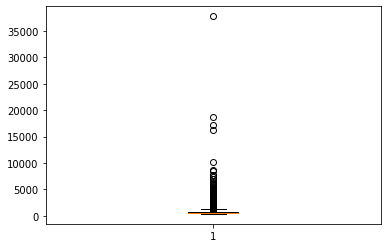

In [37]:
# Let's check for some of the columns for outliers
plt.boxplot(tel_churn_main_df.Avg_Recharge_Amt_Good_Phase)
plt.show()

#### From the above plot it is clear that there are a good number of outliers for the column Avg_Recharge_Amt during good phase. But we don't want to remove as they can contribute to Churn

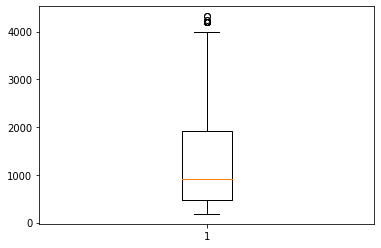

In [38]:
# Let's check for some of the columns for outliers
plt.boxplot(tel_churn_main_df.aon)
plt.show()

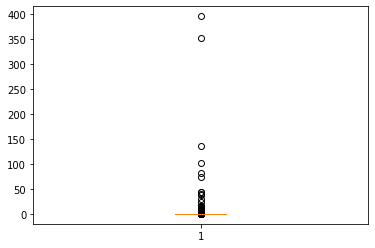

In [39]:
# Let's check for some of the columns for outliers
plt.boxplot(tel_churn_main_df.og_others_8)
plt.show()

#### Few outliers are present, but will not remove them at the moment. Will derive new feature from this column

In [40]:
# Let's check the below few columns
tel_churn_main_df.spl_ic_mou_6.describe(), tel_churn_main_df.spl_ic_mou_7.describe(), tel_churn_main_df.spl_ic_mou_8.describe()

(count    29979.000000
 mean         0.066736
 std          0.194321
 min          0.000000
 25%          0.000000
 50%          0.000000
 75%          0.000000
 max         19.760000
 Name: spl_ic_mou_6, dtype: float64, count    29979.000000
 mean         0.018064
 std          0.182005
 min          0.000000
 25%          0.000000
 50%          0.000000
 75%          0.000000
 max         21.330000
 Name: spl_ic_mou_7, dtype: float64, count    29979.000000
 mean         0.027609
 std          0.116422
 min          0.000000
 25%          0.000000
 50%          0.000000
 75%          0.000000
 max          6.230000
 Name: spl_ic_mou_8, dtype: float64)

In [41]:
# The above few columns have very little variance in the data, which is of no use.
# So lets drop them
tel_churn_main_df = tel_churn_main_df.drop(['spl_ic_mou_6','spl_ic_mou_7','spl_ic_mou_8'], axis=1)

In [42]:
# Let's check below few columns
tel_churn_main_df.og_others_6.describe(), tel_churn_main_df.og_others_7.describe(), tel_churn_main_df.og_others_8.describe()

(count    29979.000000
 mean         0.693200
 std          2.282437
 min          0.000000
 25%          0.000000
 50%          0.000000
 75%          0.000000
 max        100.610000
 Name: og_others_6, dtype: float64, count    29979.000000
 mean         0.047651
 std          2.743248
 min          0.000000
 25%          0.000000
 50%          0.000000
 75%          0.000000
 max        370.130000
 Name: og_others_7, dtype: float64, count    29979.000000
 mean         0.059194
 std          3.322091
 min          0.000000
 25%          0.000000
 50%          0.000000
 75%          0.000000
 max        394.930000
 Name: og_others_8, dtype: float64)

In [43]:
# The above few columns have very little variance in the data, which is of no use.
# So lets drop them
tel_churn_main_df = tel_churn_main_df.drop(['og_others_6','og_others_7','og_others_8'], axis=1)
tel_churn_main_df.shape

(29979, 125)


#### Relation of Churn with other Features


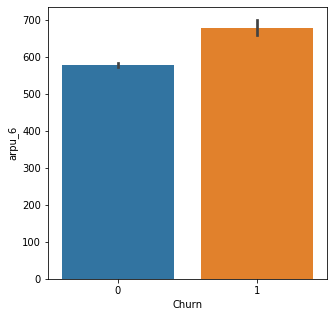

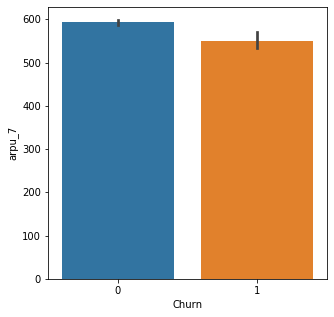

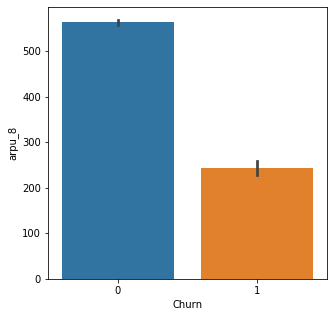

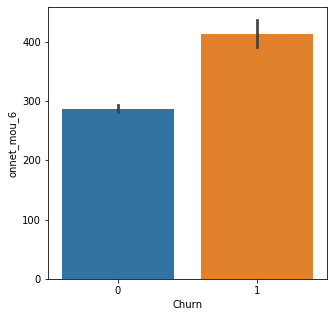

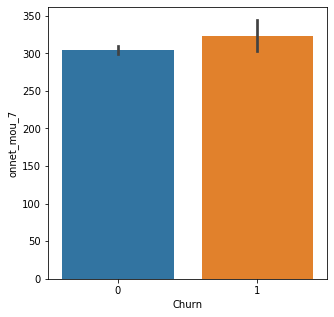

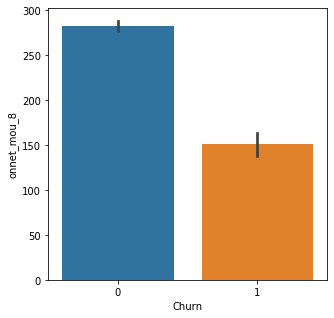

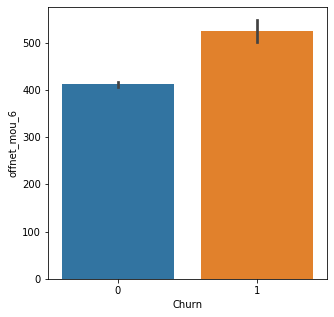

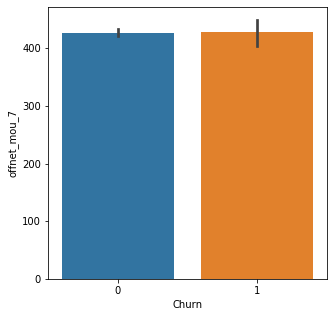

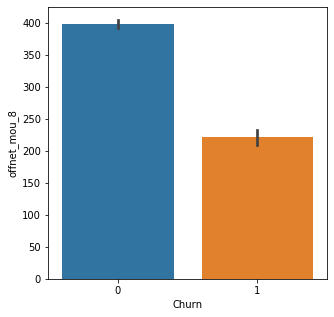

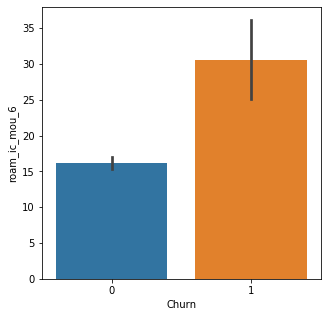

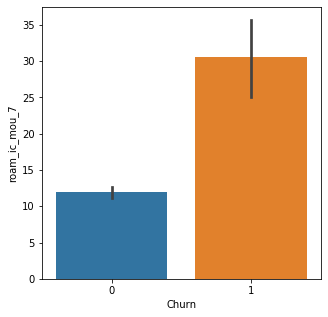

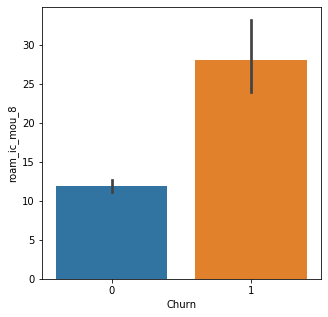

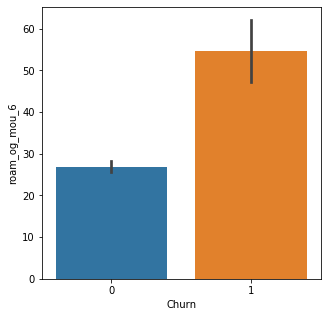

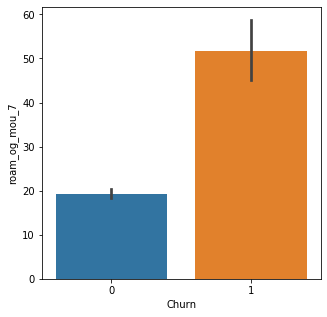

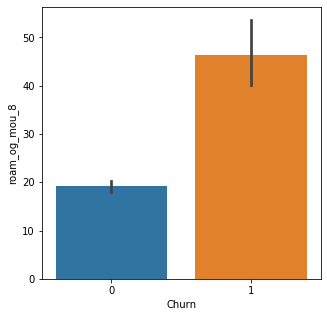

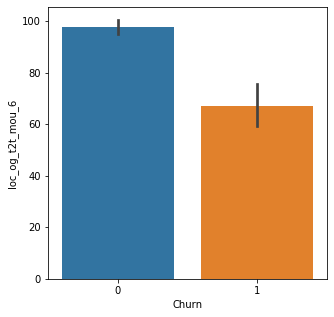

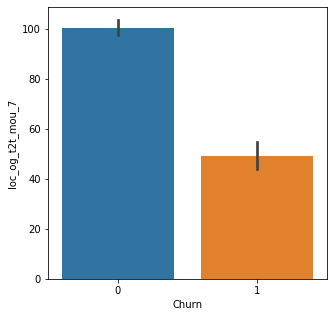

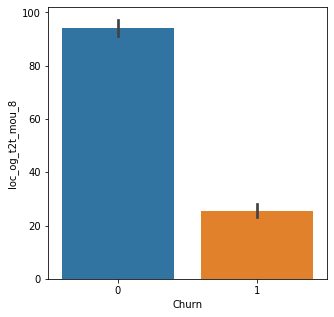

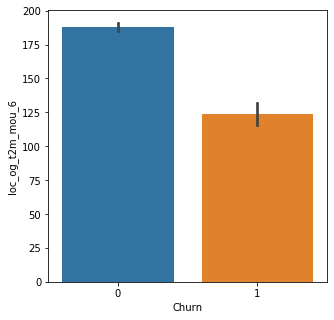

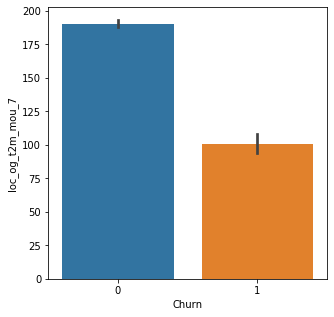

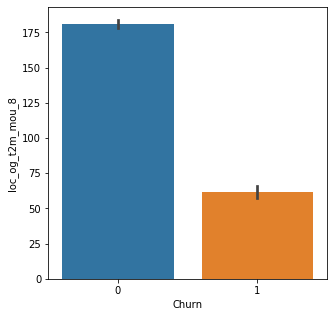

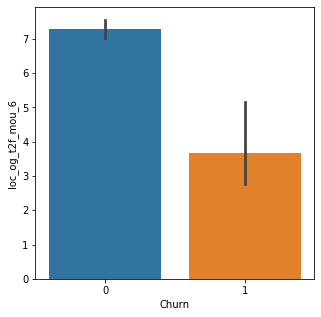

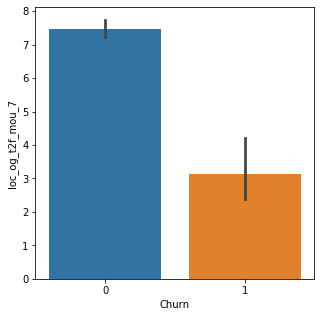

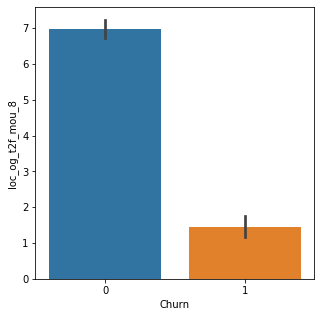

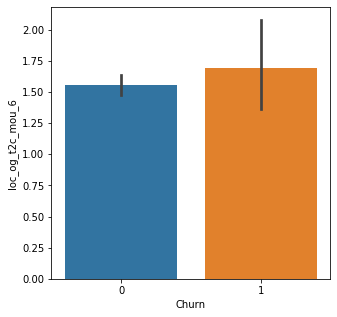

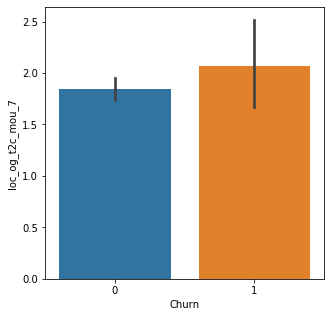

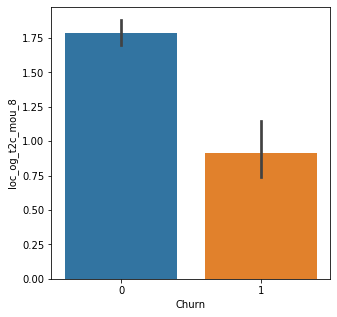

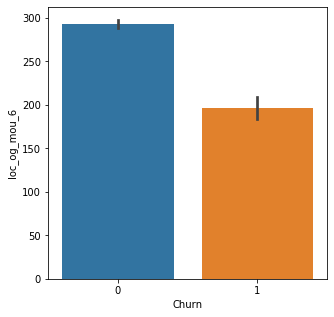

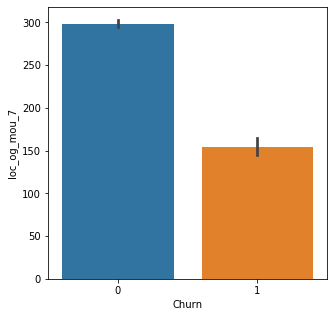

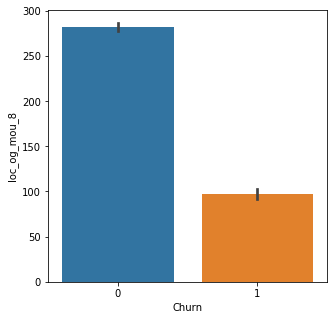

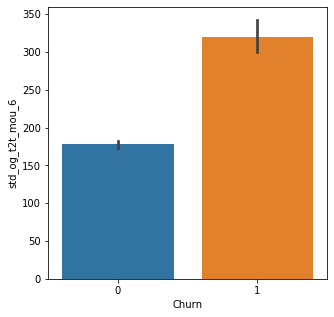

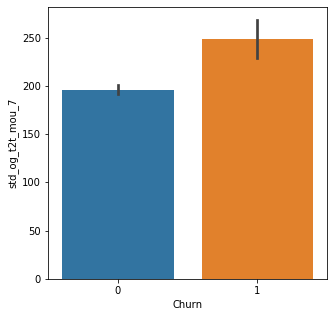

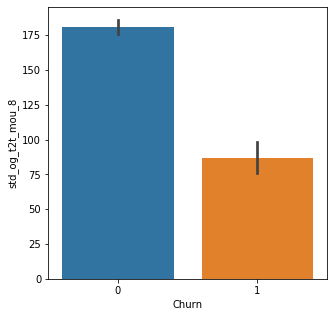

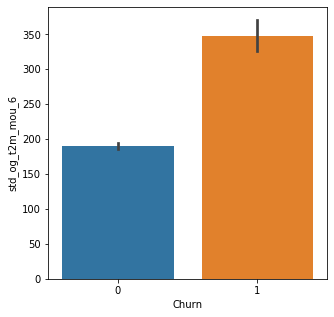

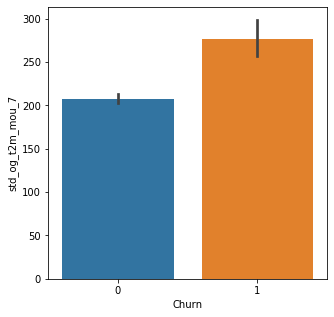

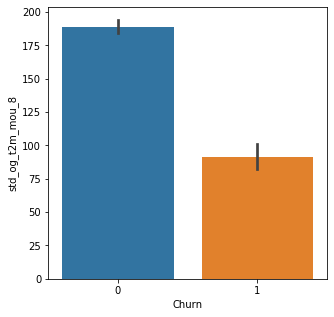

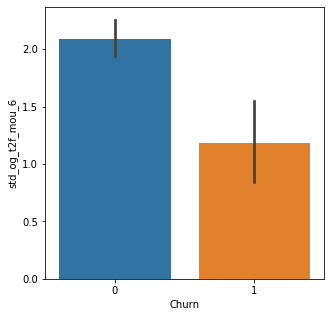

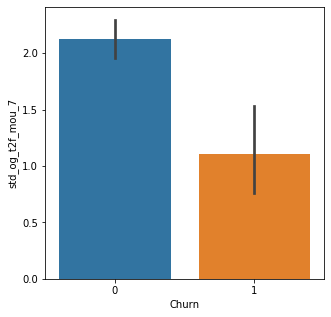

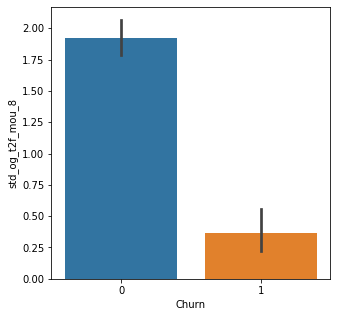

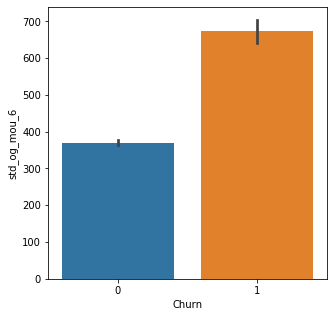

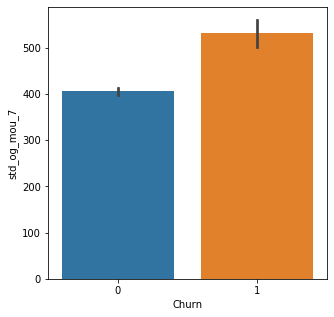

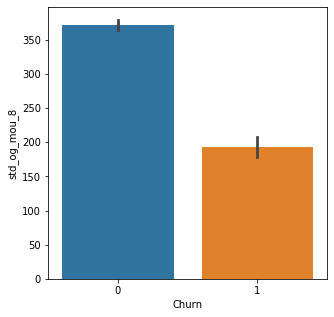

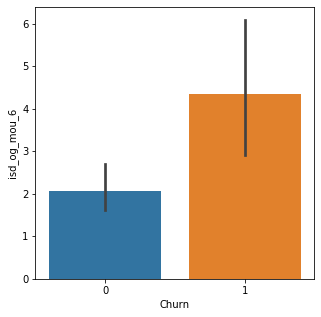

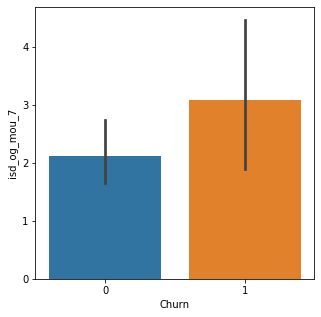

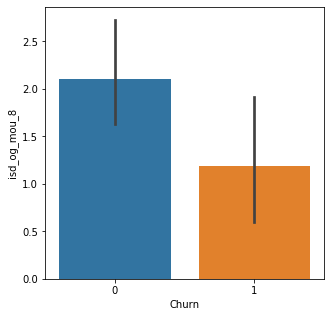

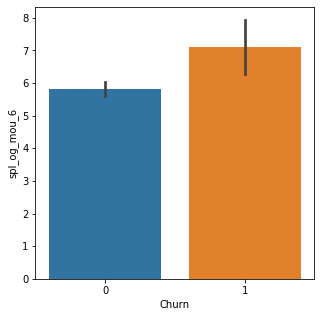

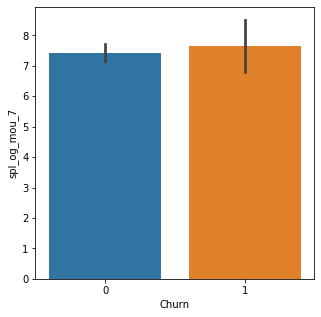

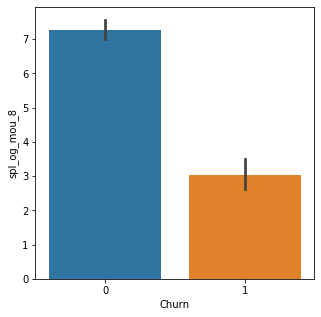

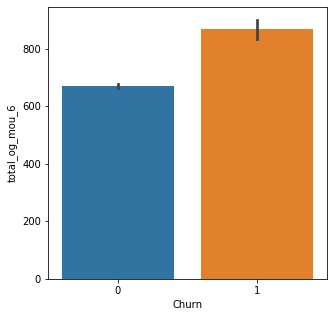

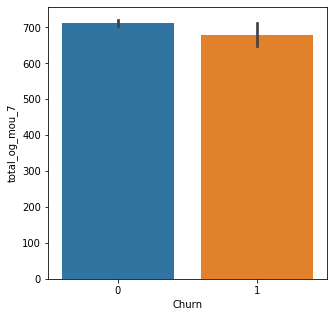

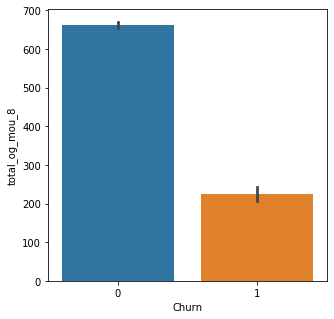

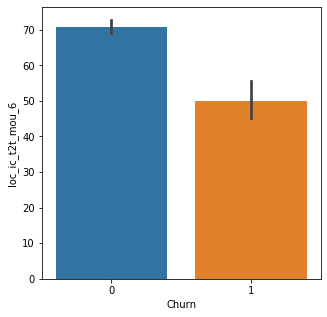

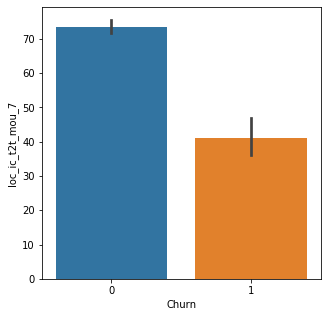

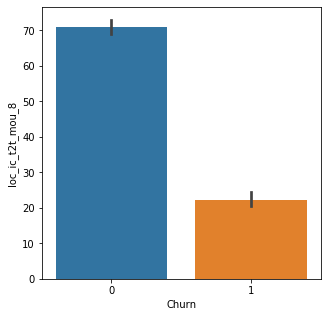

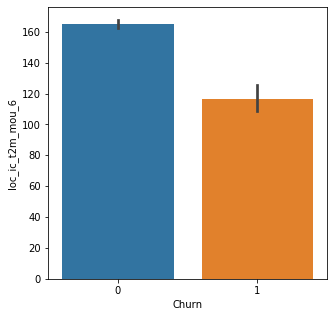

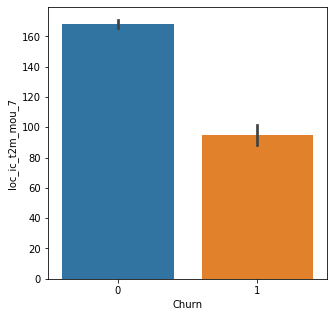

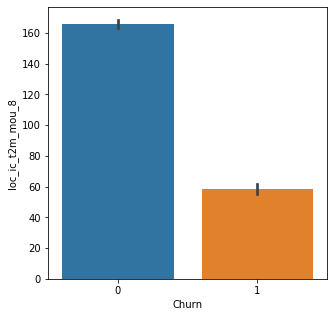

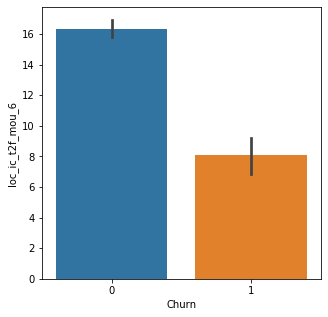

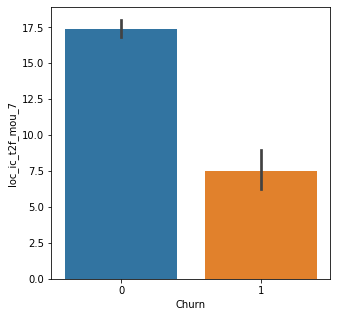

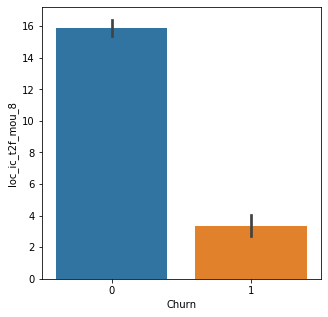

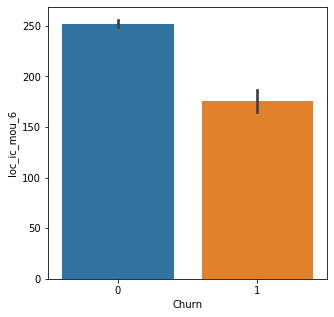

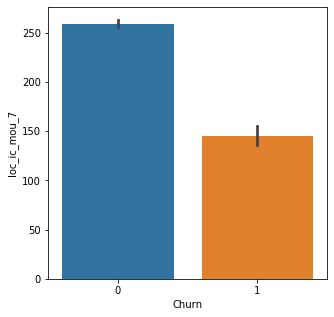

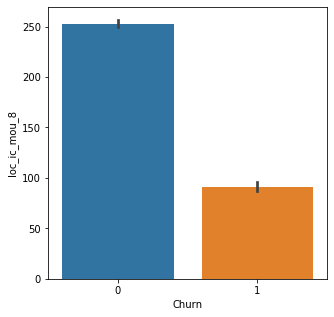

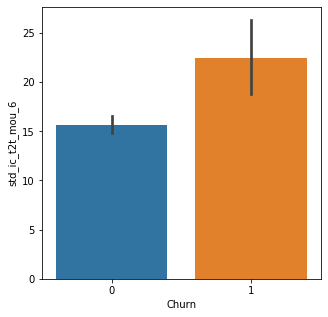

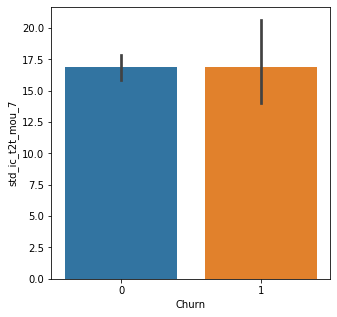

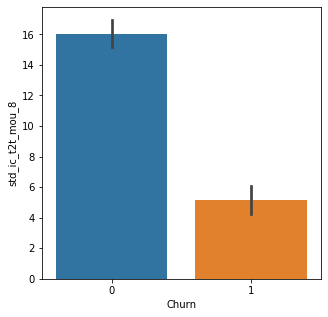

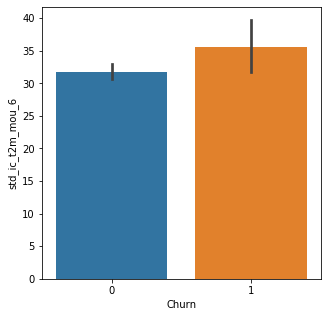

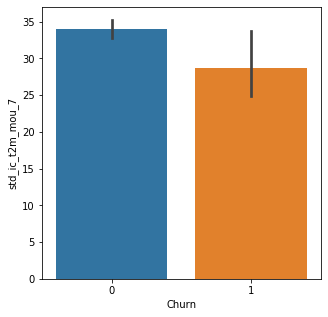

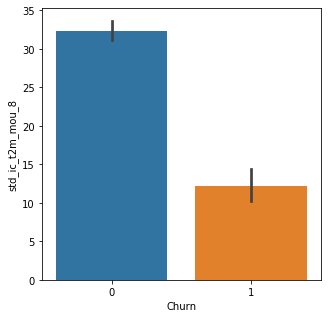

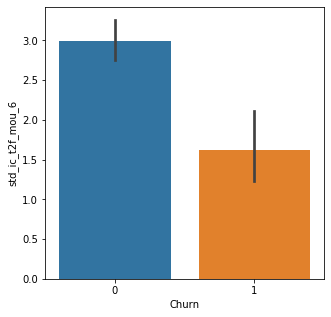

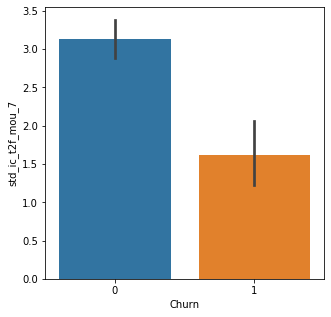

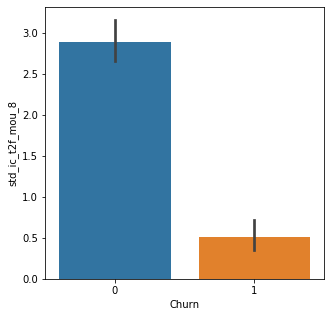

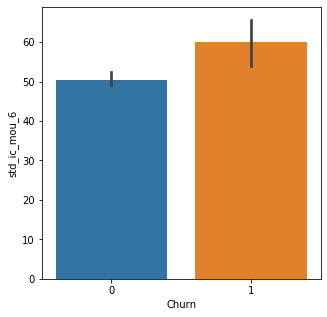

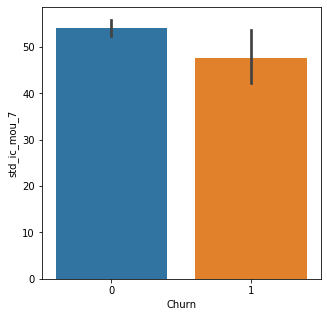

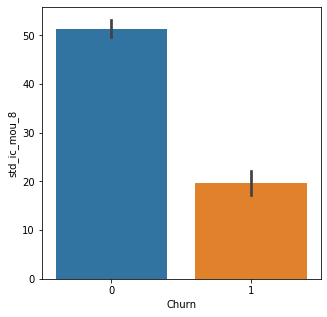

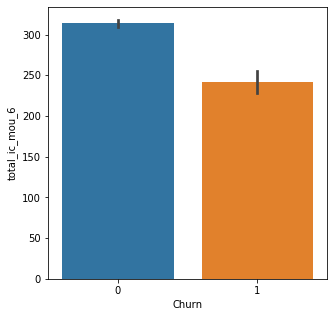

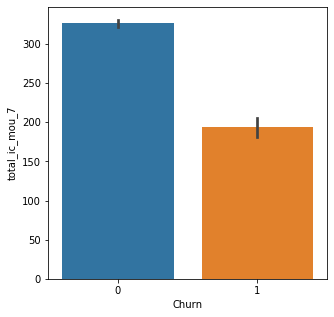

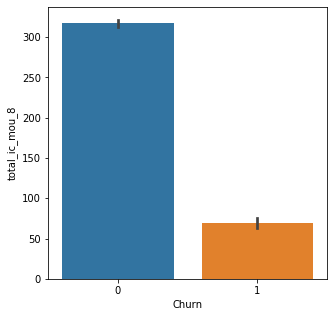

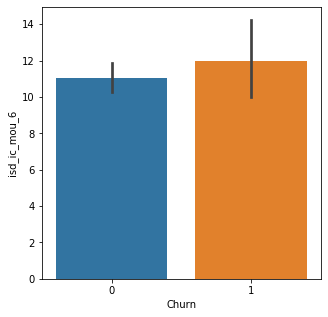

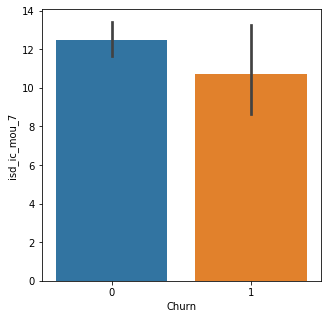

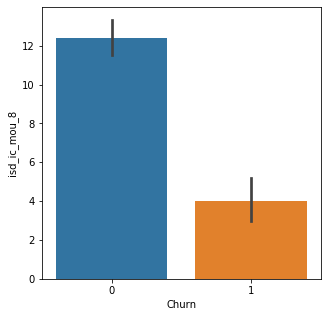

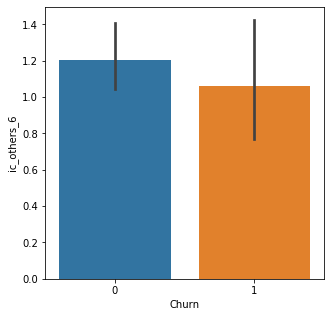

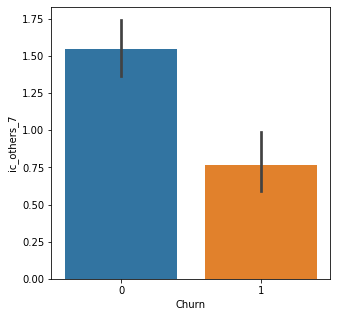

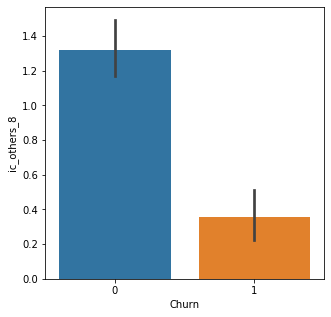

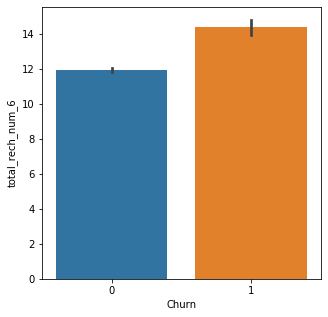

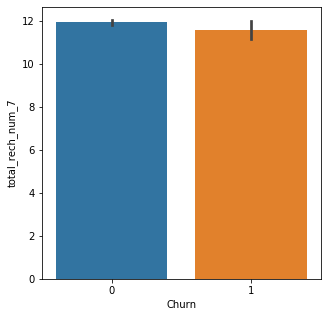

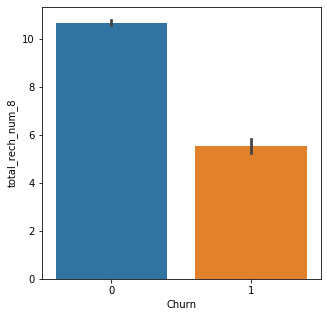

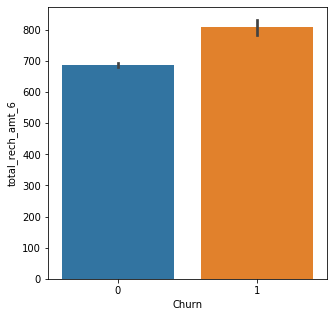

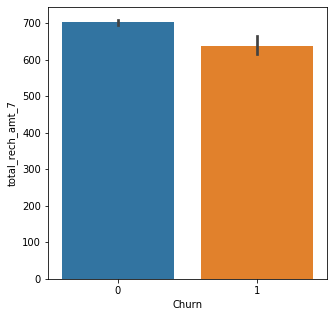

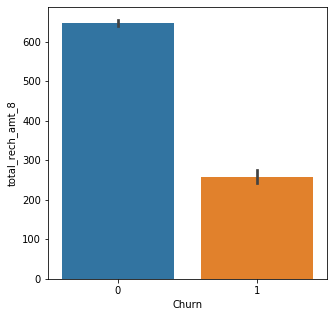

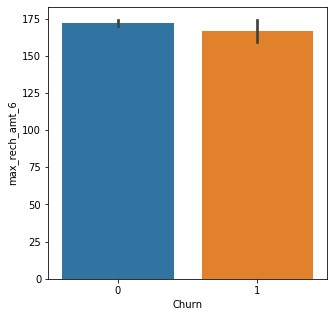

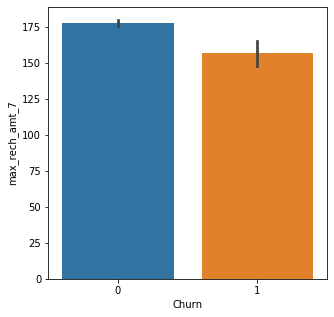

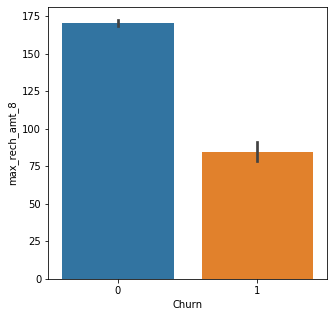

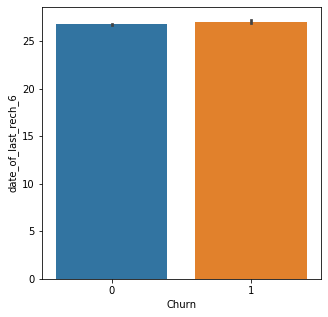

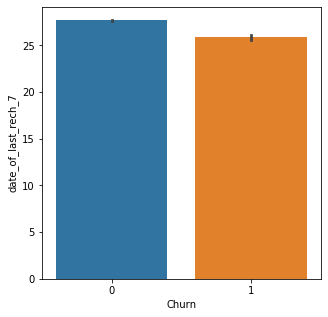

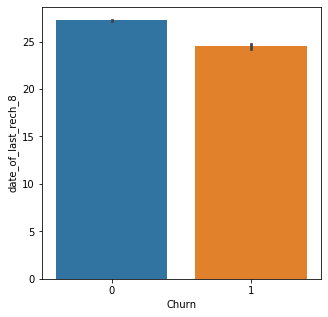

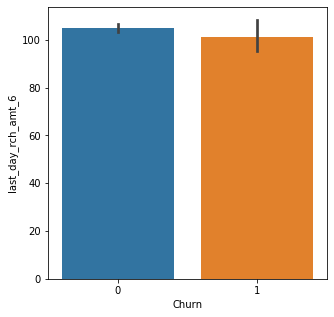

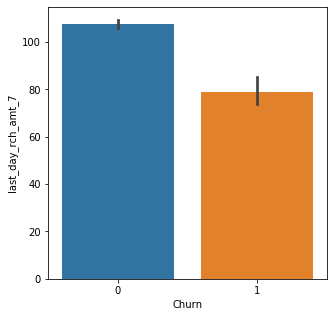

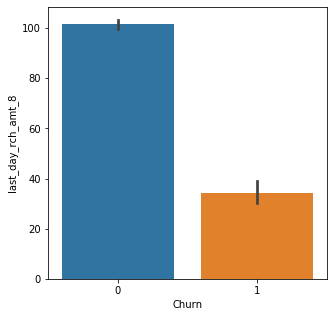

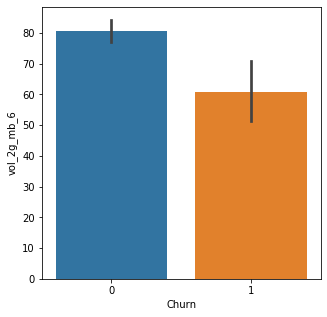

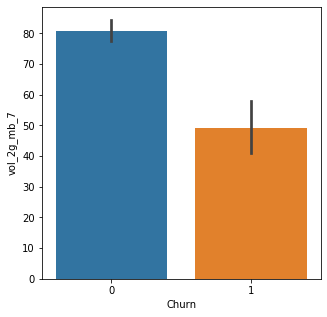

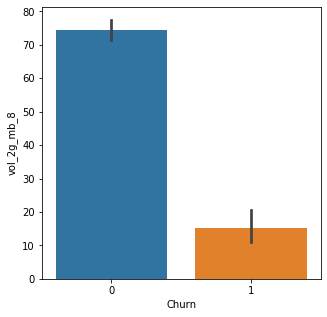

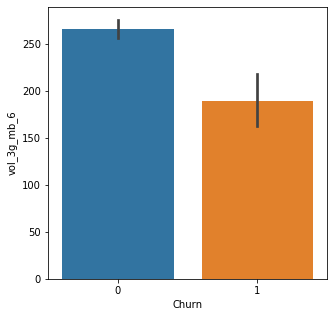

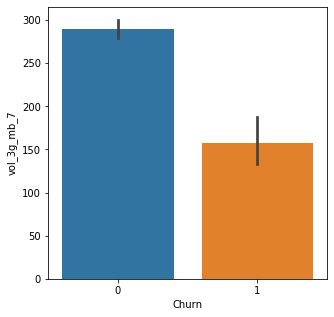

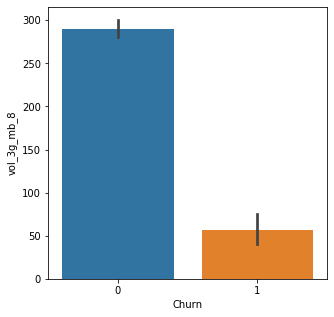

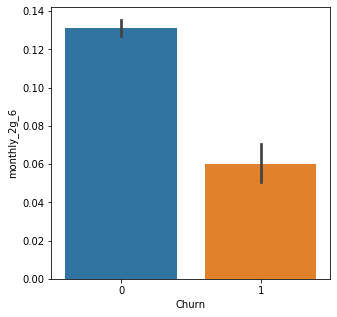

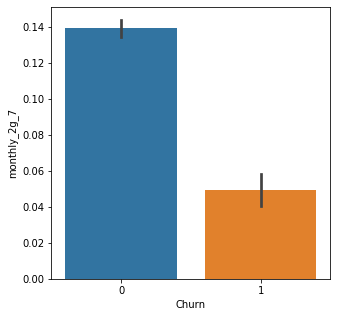

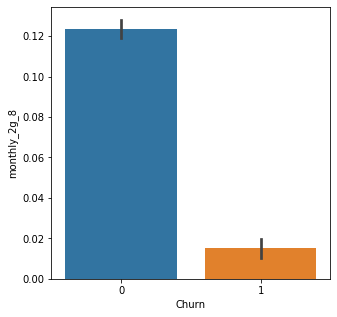

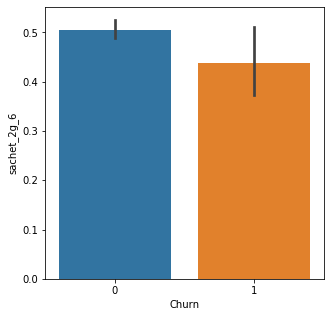

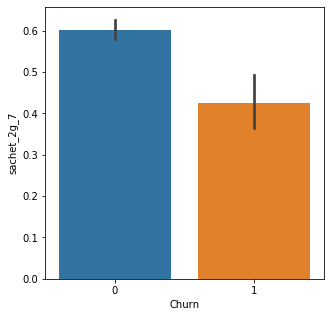

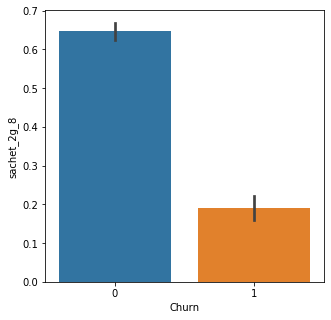

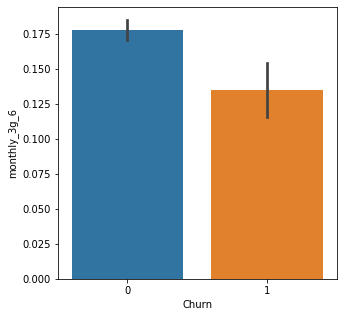

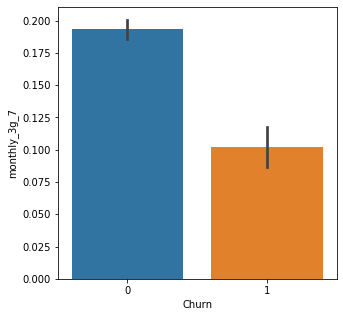

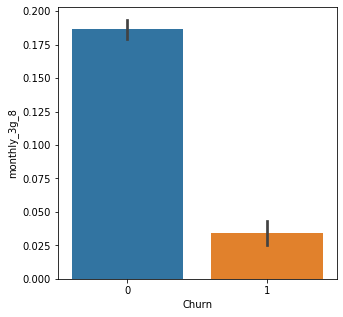

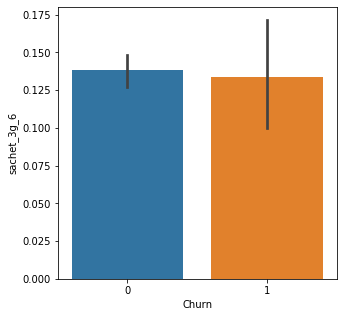

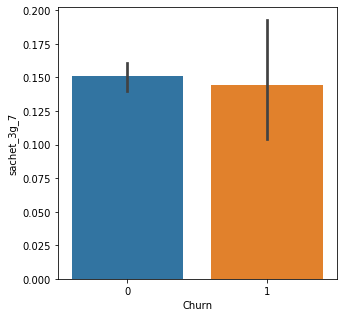

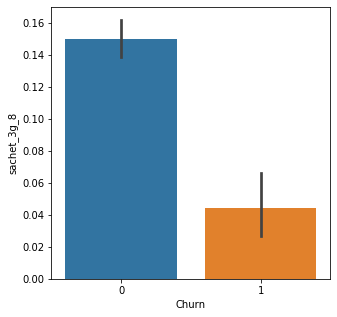

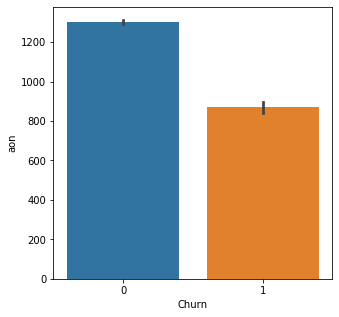

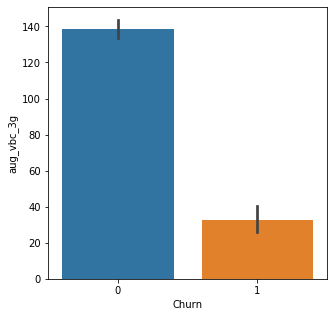

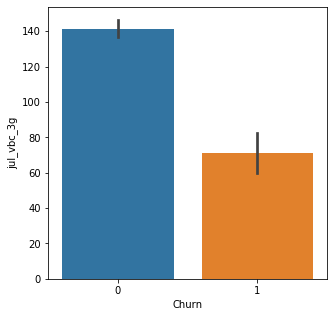

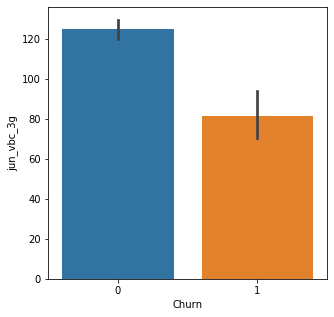

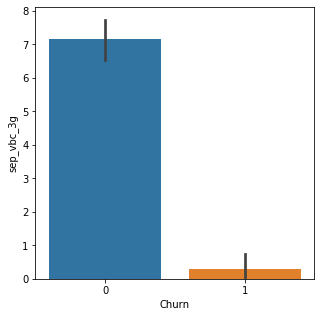

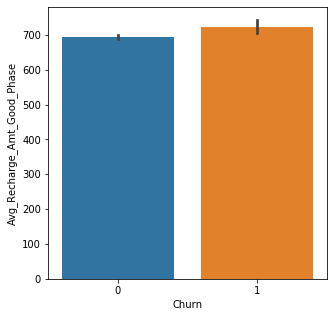

In [44]:
# Find out the correlation of Churn with other Features
# As there are too many features, we have created a loop and created a barplot for all the features against Churn data
cont_cols = [col for col in tel_churn_main_df.columns if col not in ['Churn','mobile_number']]
for col in cont_cols:
    plt.figure(figsize=(5, 5))
    sns.barplot(x='Churn', y=col, data=tel_churn_main_df)
    plt.show()



#### Correlation among Other Feathers Excluding Churn

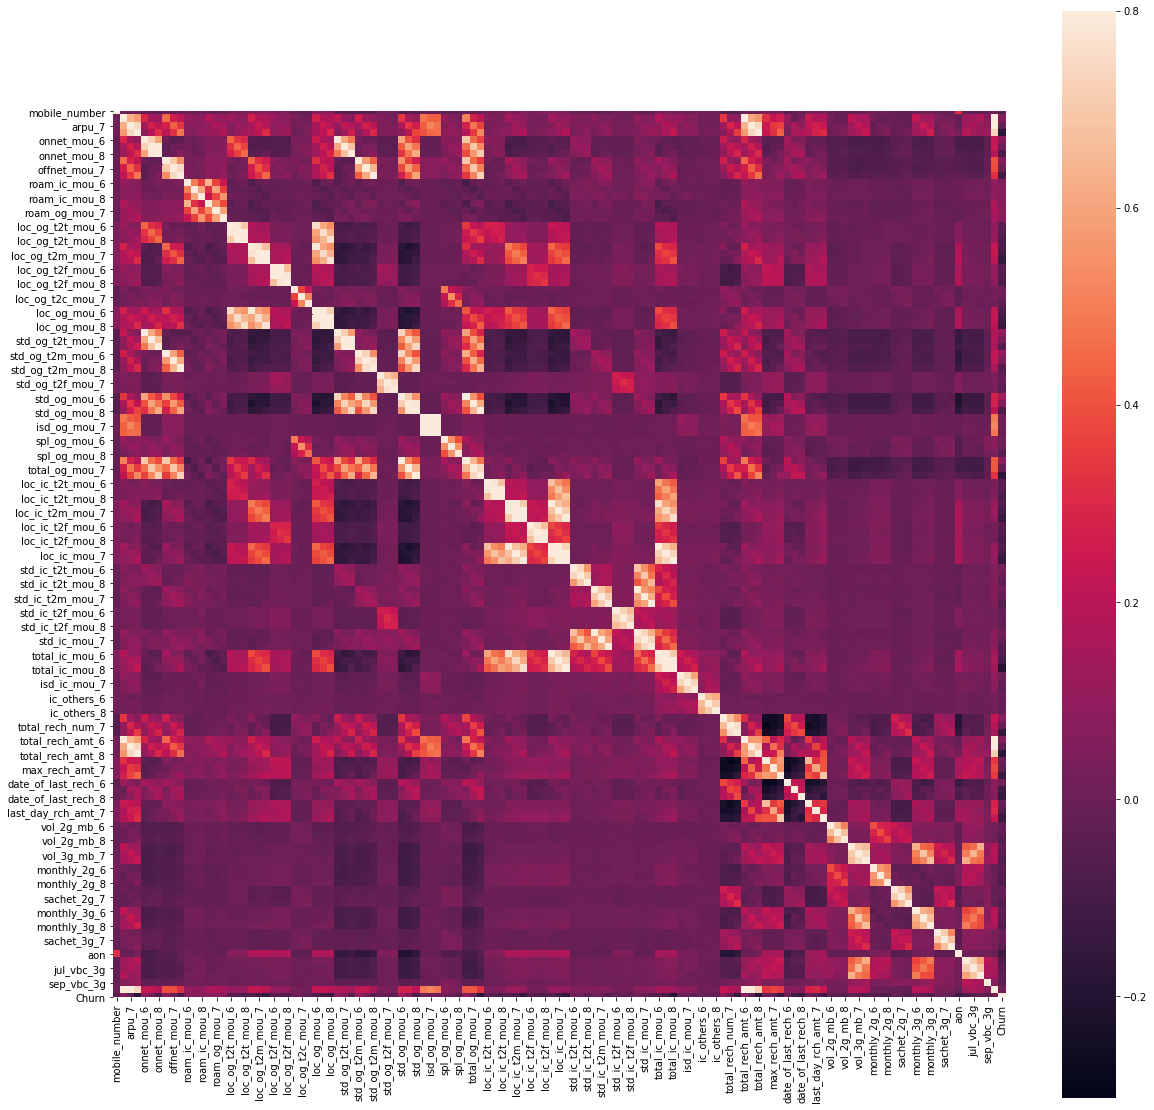

In [45]:
#Let's Plot the correlation matrix
corrmatrix = tel_churn_main_df.corr()
f, ax = plt.subplots(figsize=(20, 20))
sns.heatmap(corrmatrix, vmax=.8, square=True)

#### From the above plot, nothing much can be concluded. So let's create some pairplot for some of the variables and explore the relationship

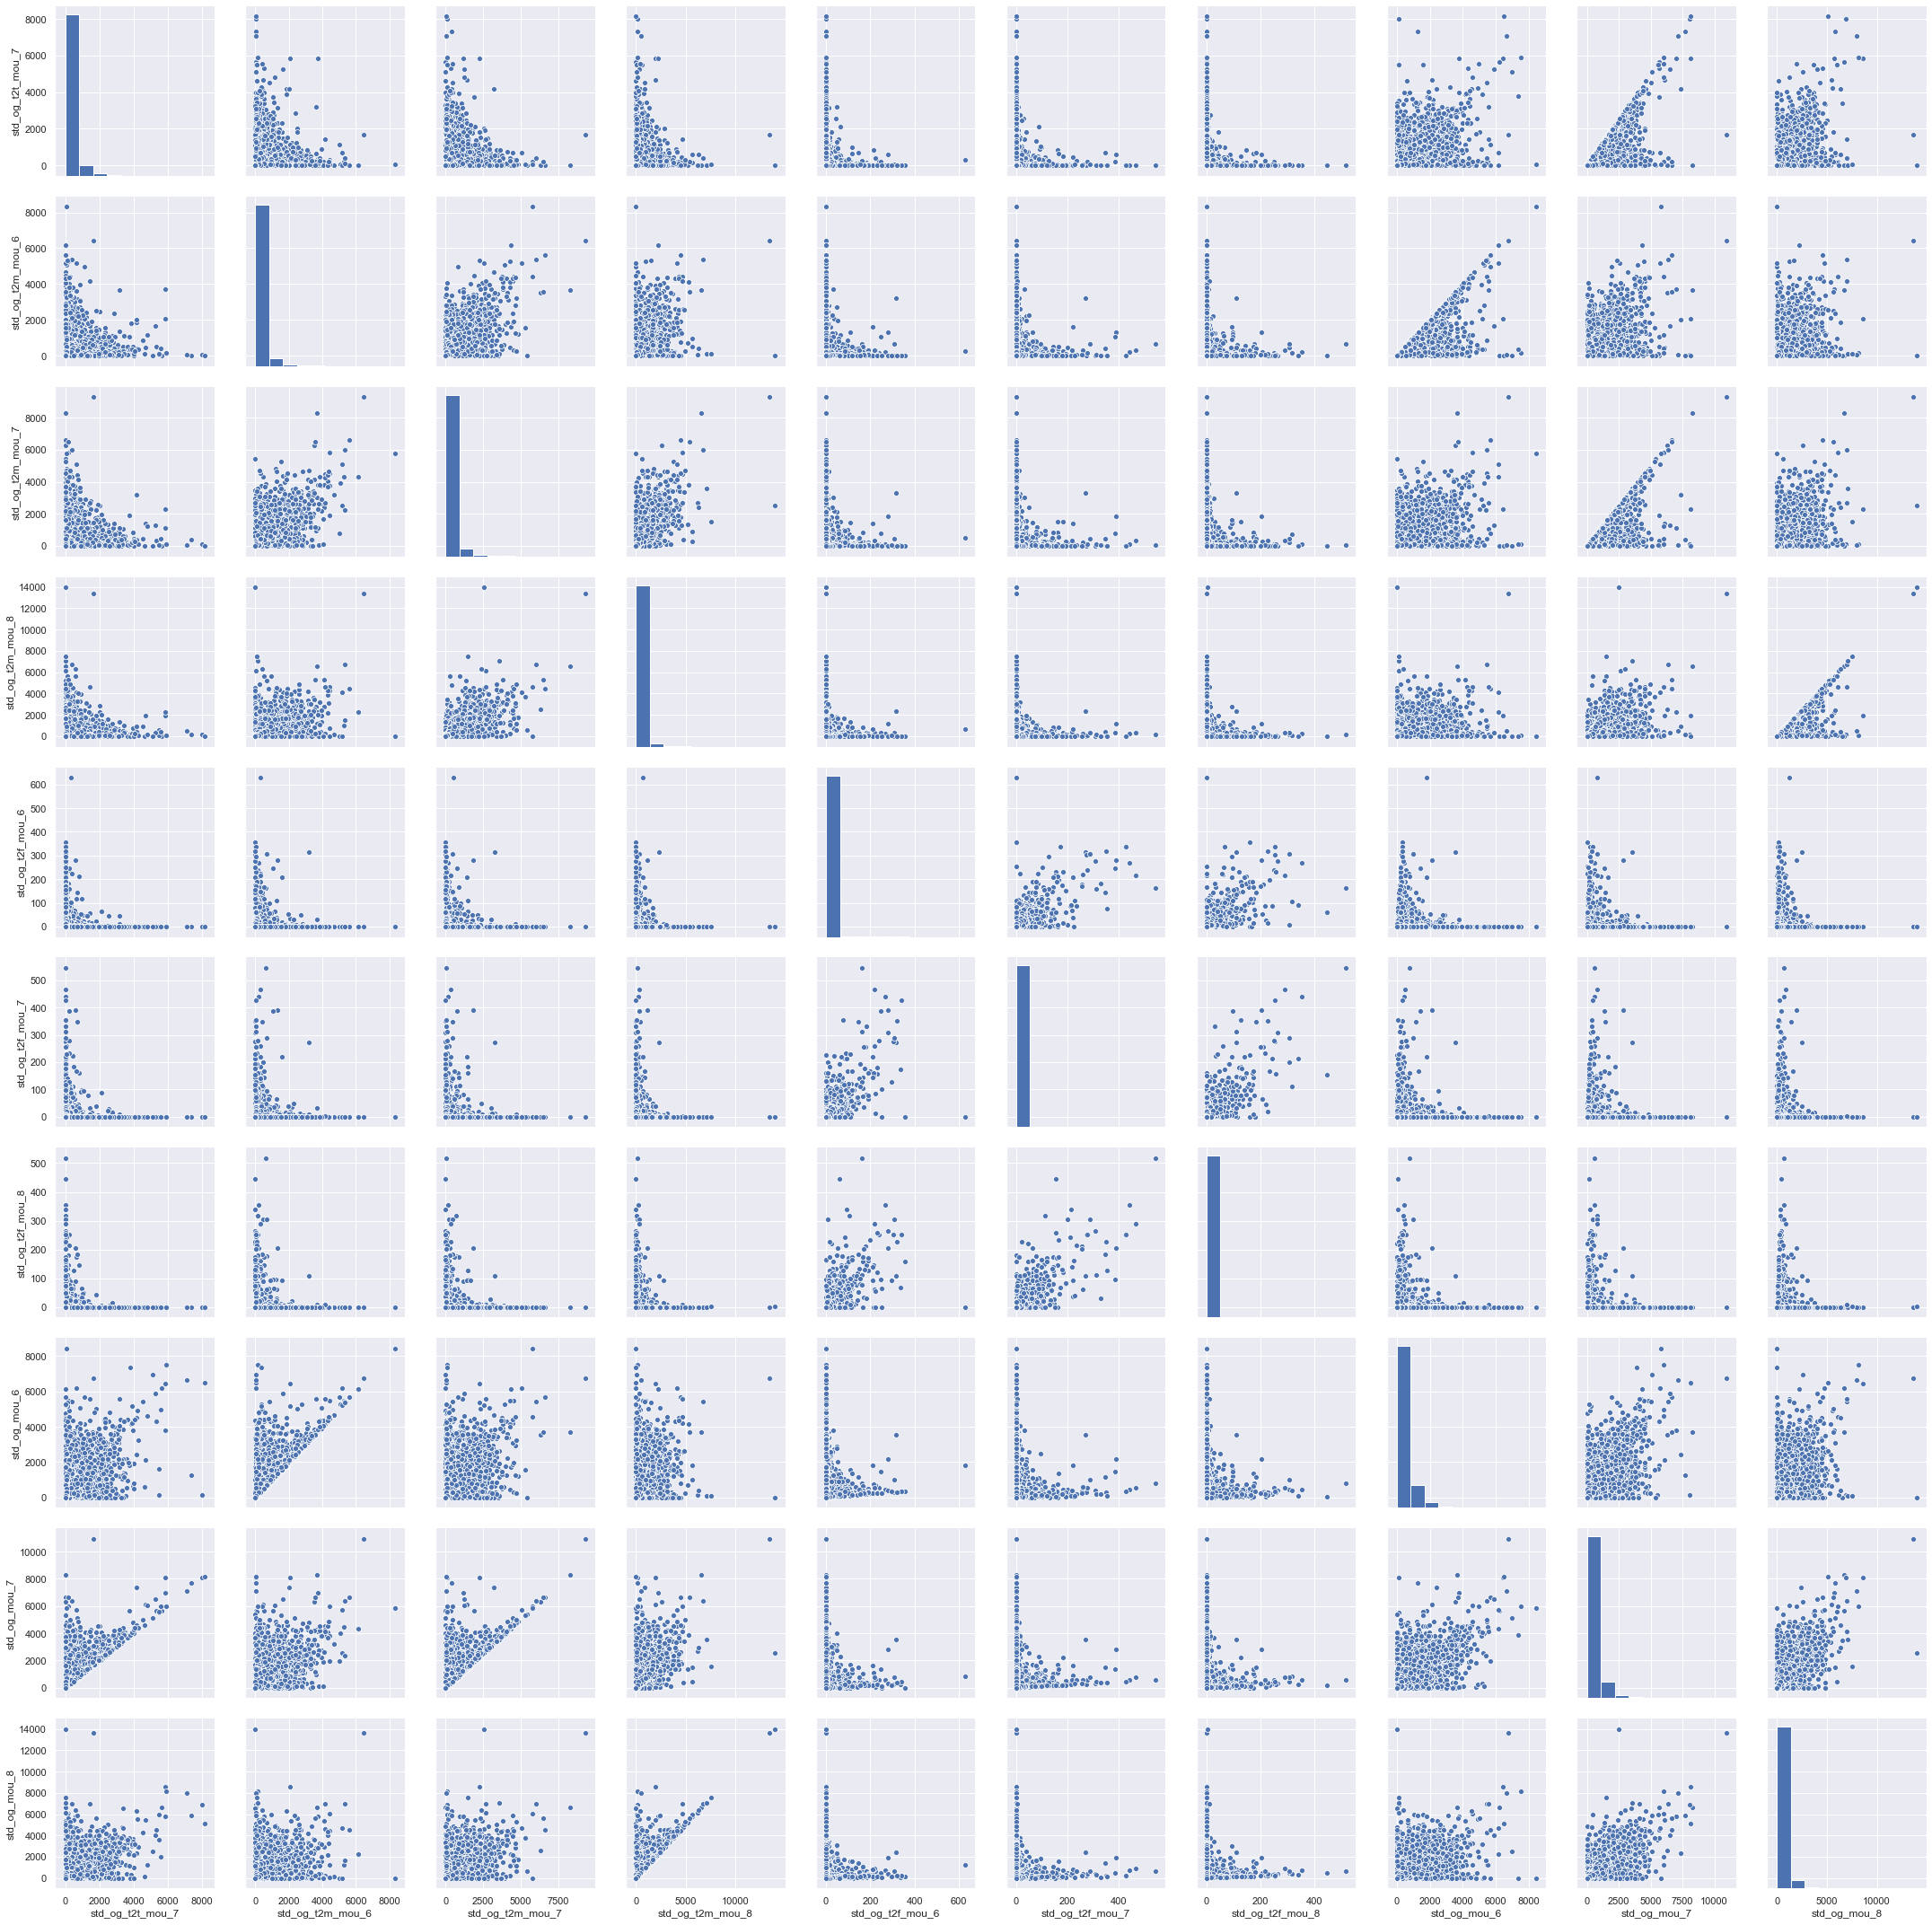

In [46]:
# Let's create pairplot among the features
sns.set()
cols = ['std_og_t2t_mou_7','std_og_t2m_mou_6', 'std_og_t2m_mou_7','std_og_t2m_mou_8', 'std_og_t2f_mou_6','std_og_t2f_mou_7',
        'std_og_t2f_mou_8', 'std_og_mou_6' , 'std_og_mou_7' , 'std_og_mou_8']
sns.pairplot(tel_churn_main_df[cols], size = 3)
plt.show()

#### Here we can visualize correlation in some variables:  1)std_og_mou_6 and std_og_t2m_mou_6, 2) std_og_mou_8 and std_og_t2m_mou_8, 3) std_og_mou_7 and std_og_t2m_mou_7,   


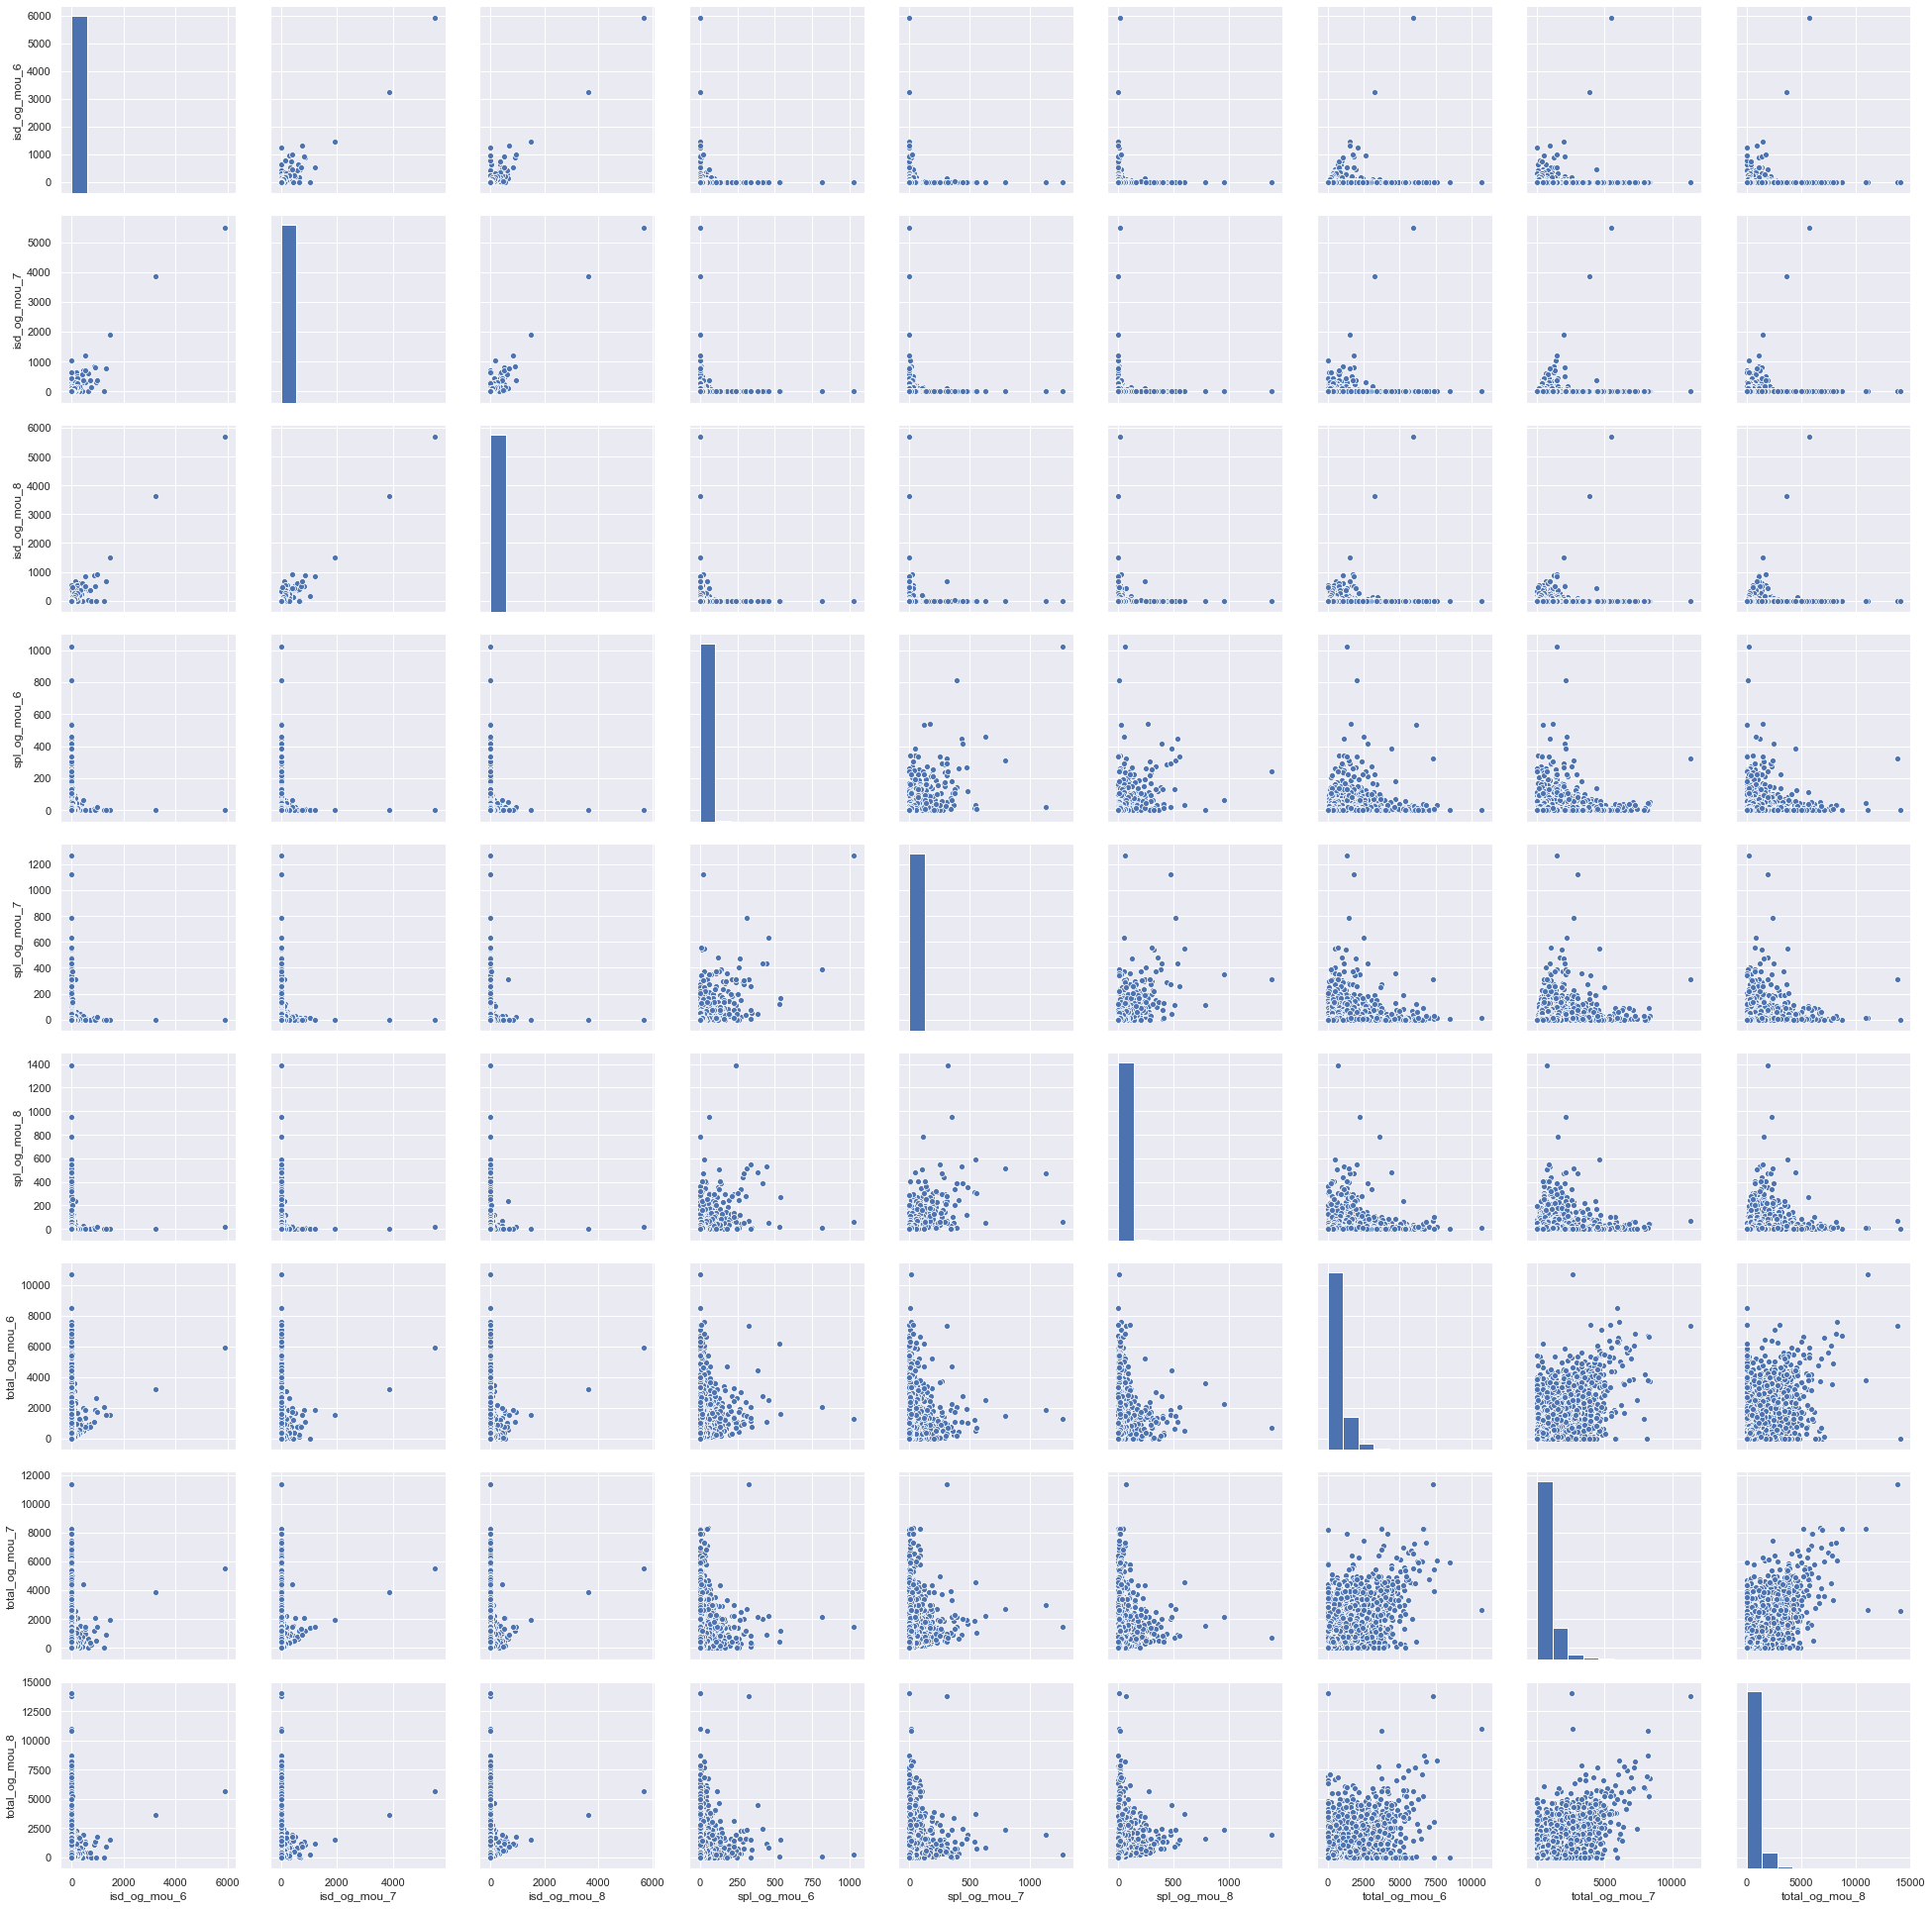

In [47]:
sns.set()
cols = ['isd_og_mou_6','isd_og_mou_7','isd_og_mou_8','spl_og_mou_6','spl_og_mou_7',
        'spl_og_mou_8','total_og_mou_6','total_og_mou_7','total_og_mou_8']
sns.pairplot(tel_churn_main_df[cols], size = 3)
plt.show()

#### Here we couldn’t find some more positive correlation between different set of variables like total_og_mou_7 vs total_og_mou_6. 

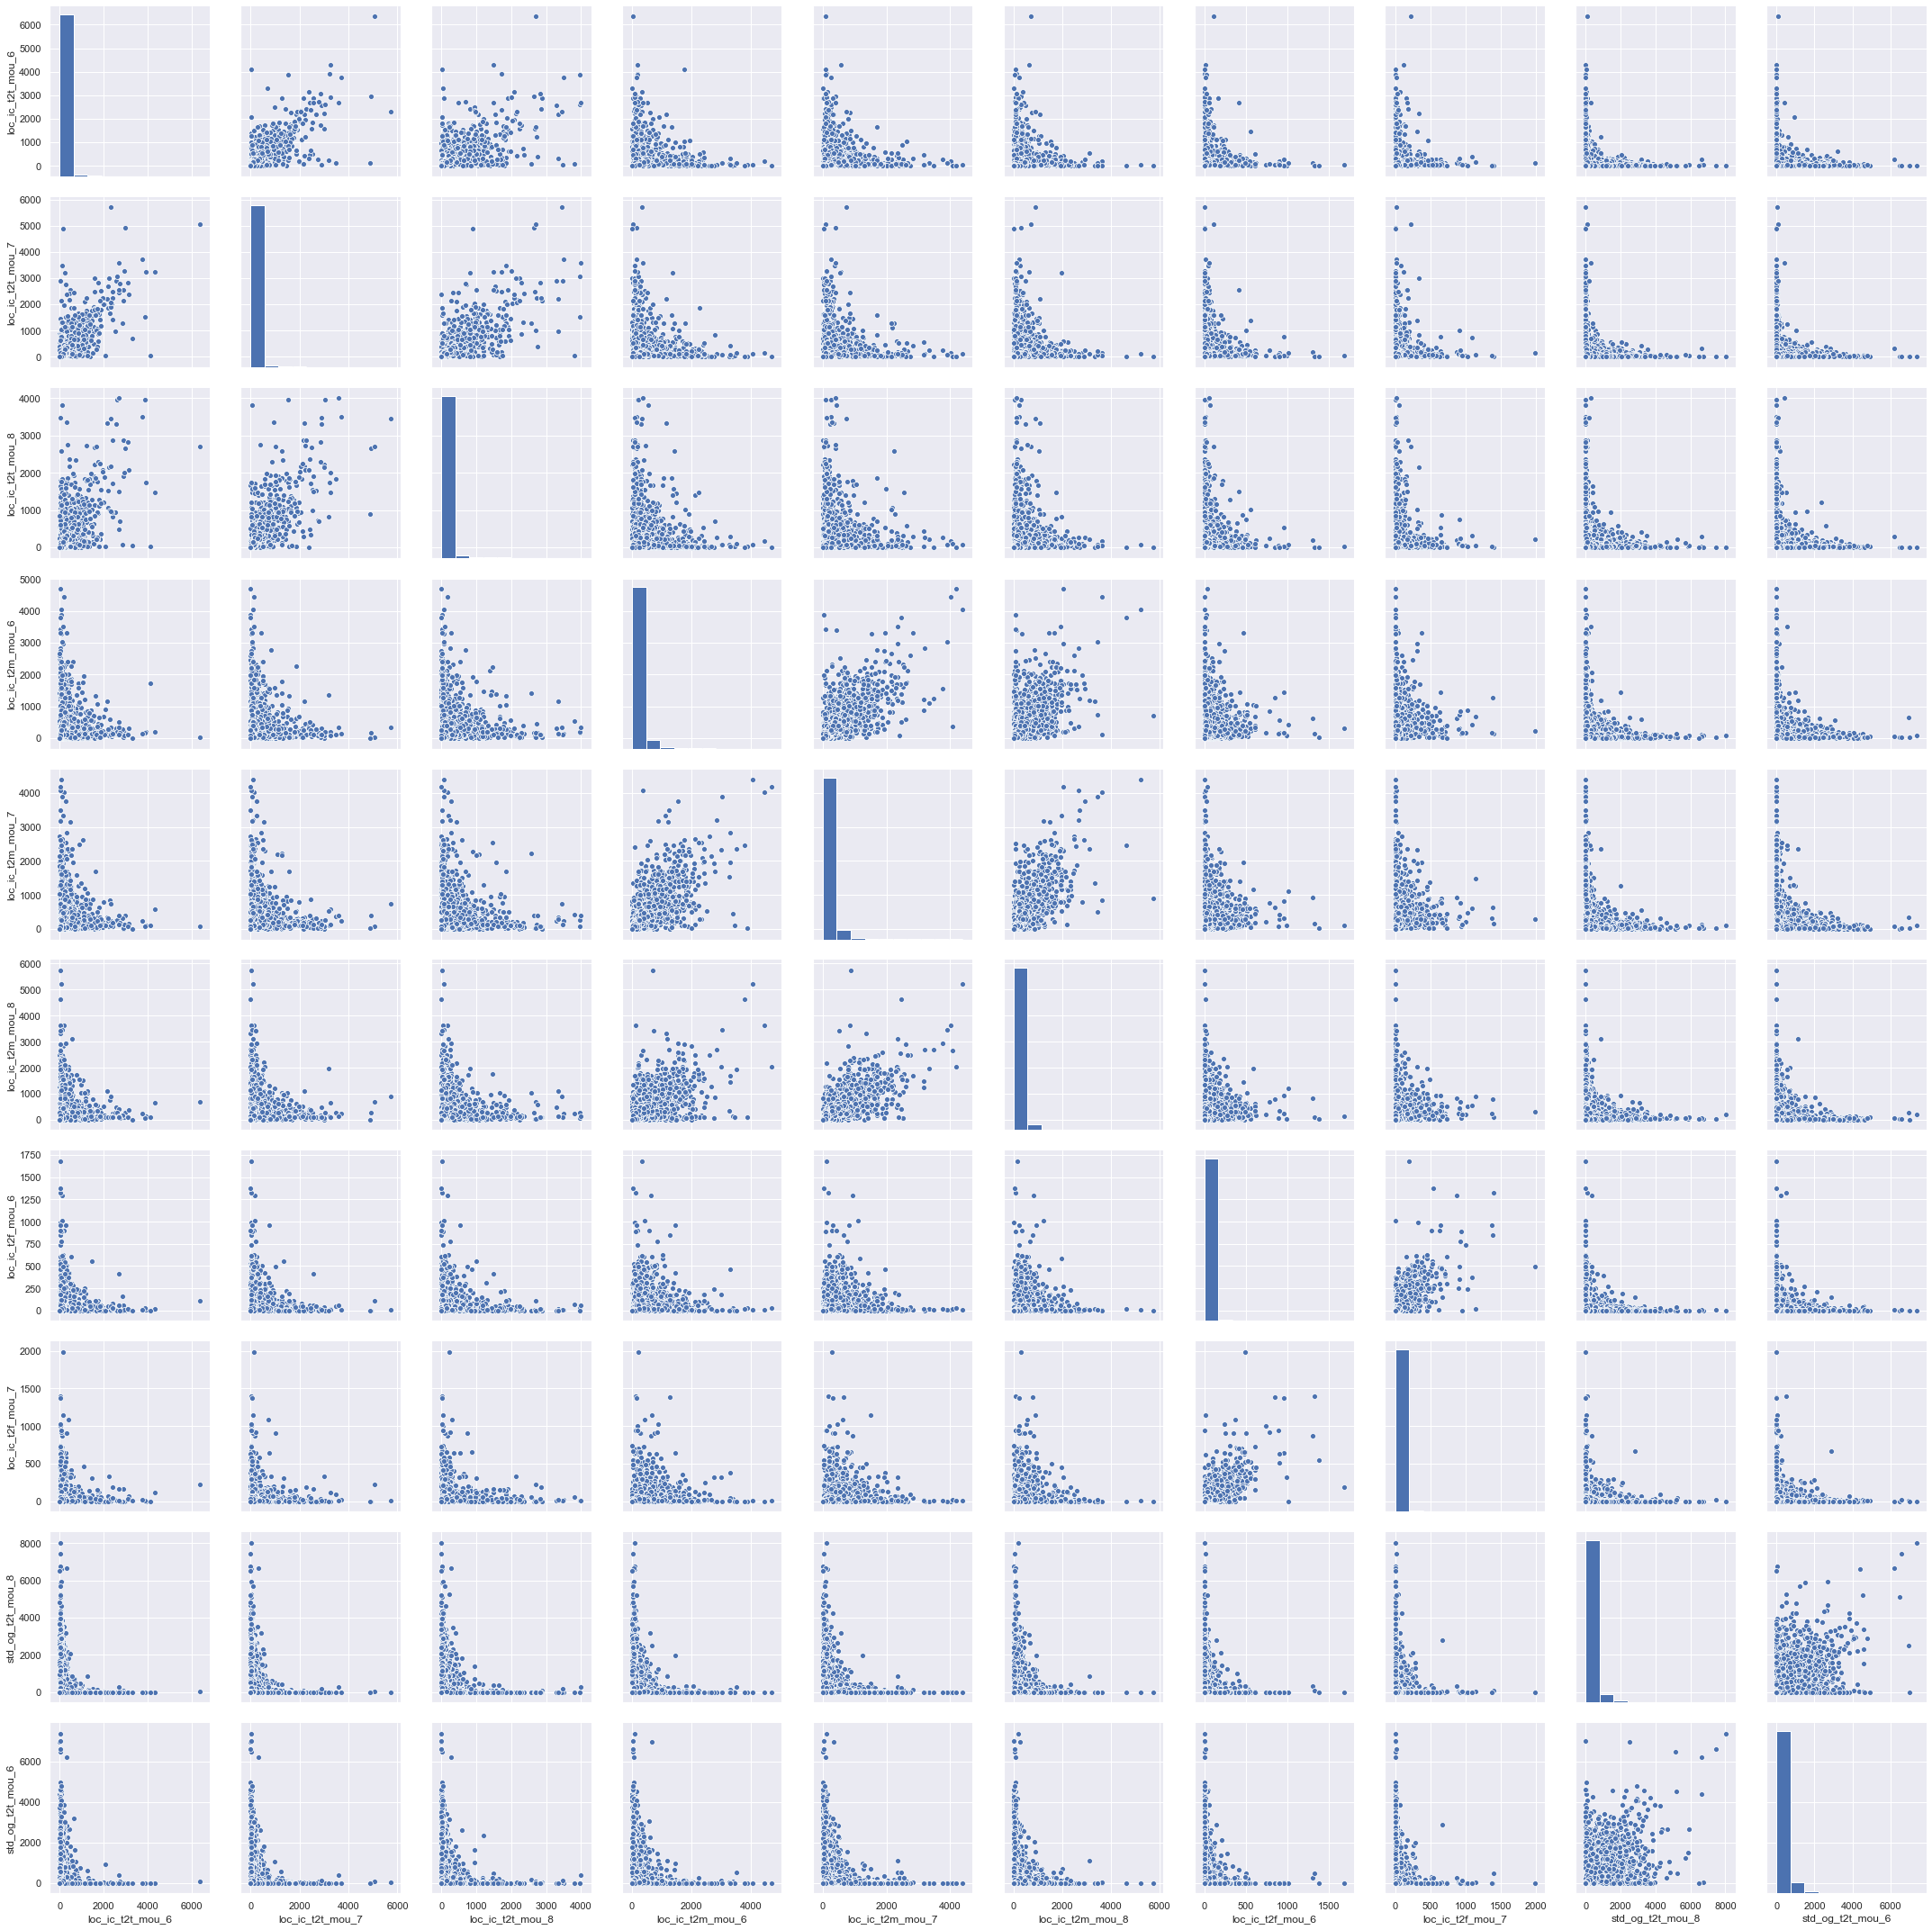

In [48]:
sns.set()
cols = ['loc_ic_t2t_mou_6','loc_ic_t2t_mou_7','loc_ic_t2t_mou_8','loc_ic_t2m_mou_6','loc_ic_t2m_mou_7','loc_ic_t2m_mou_8',
        'loc_ic_t2f_mou_6','loc_ic_t2f_mou_7','std_og_t2t_mou_8','std_og_t2t_mou_6']
sns.pairplot(tel_churn_main_df[cols], size = 3)
plt.show()

#### Here are few more positive correlation between the variables

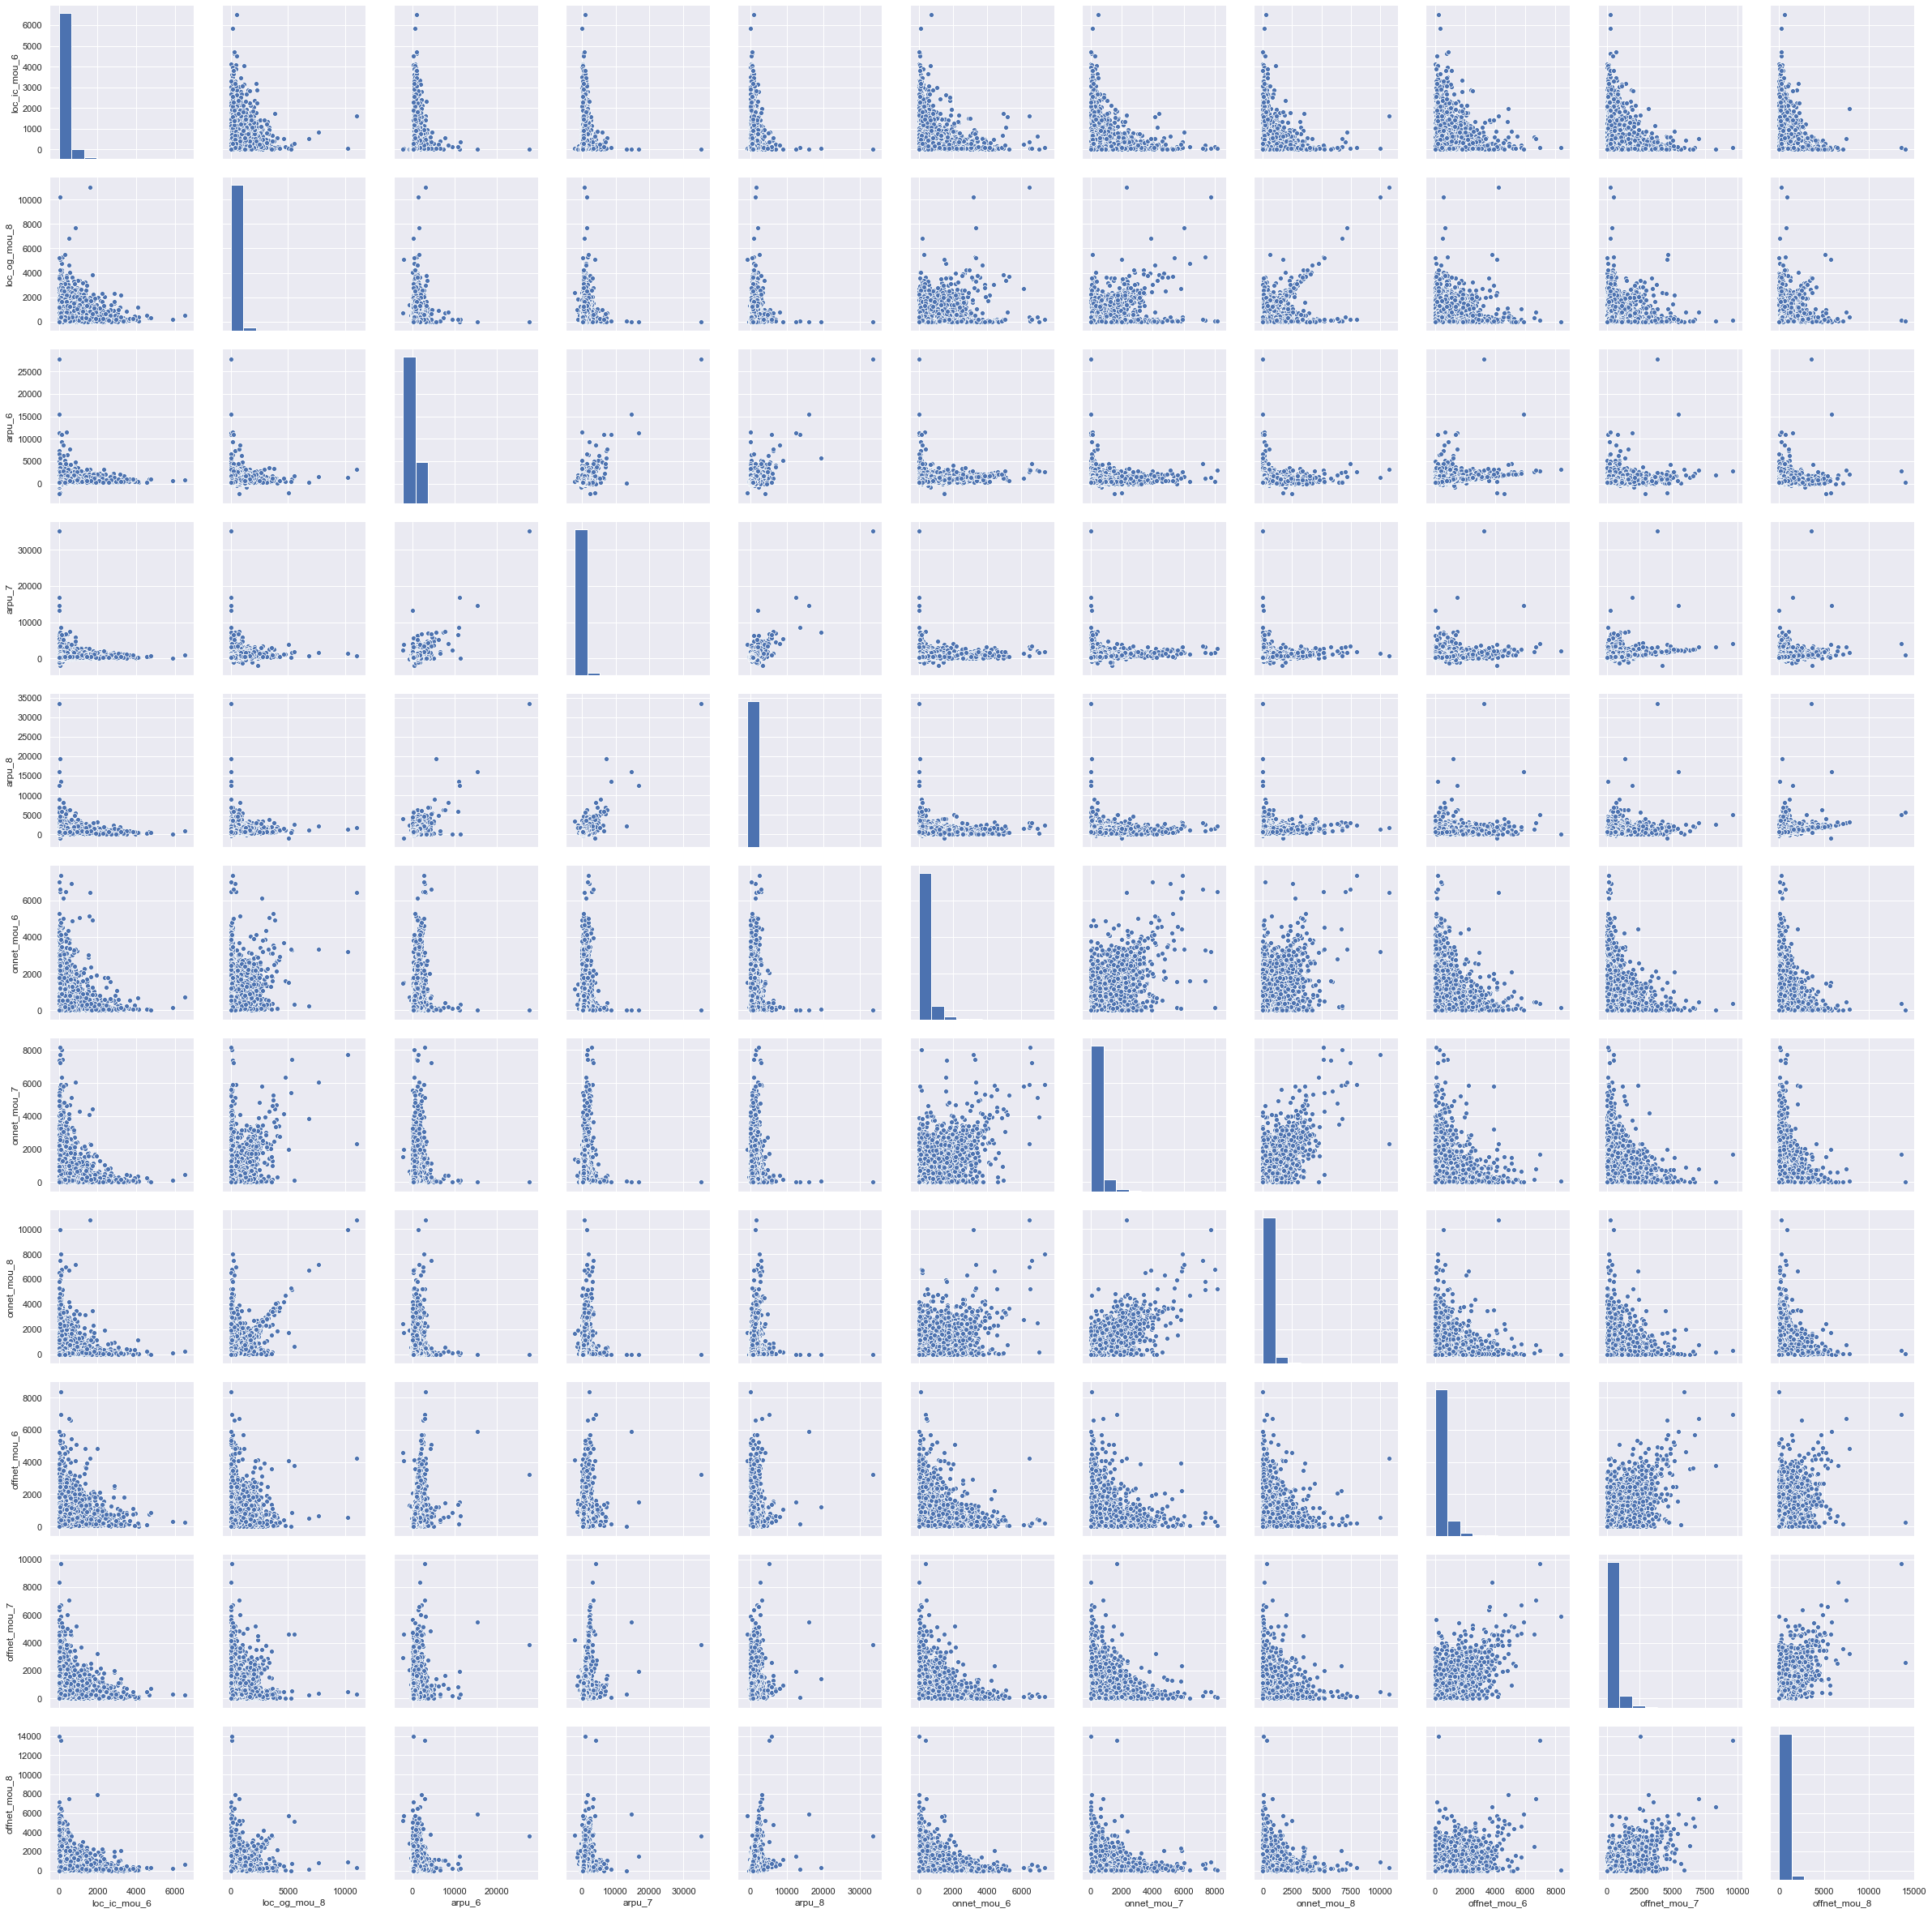

In [49]:
sns.set()
cols = ['loc_ic_mou_6','loc_og_mou_8','arpu_6','arpu_7','arpu_8','onnet_mou_6',
        'onnet_mou_7','onnet_mou_8','offnet_mou_6','offnet_mou_7','offnet_mou_8']
sns.pairplot(tel_churn_main_df[cols], size = 3)
plt.show()

#### Here we can visualize the correlation in offnet_mou_6 and loc_og_mou_8

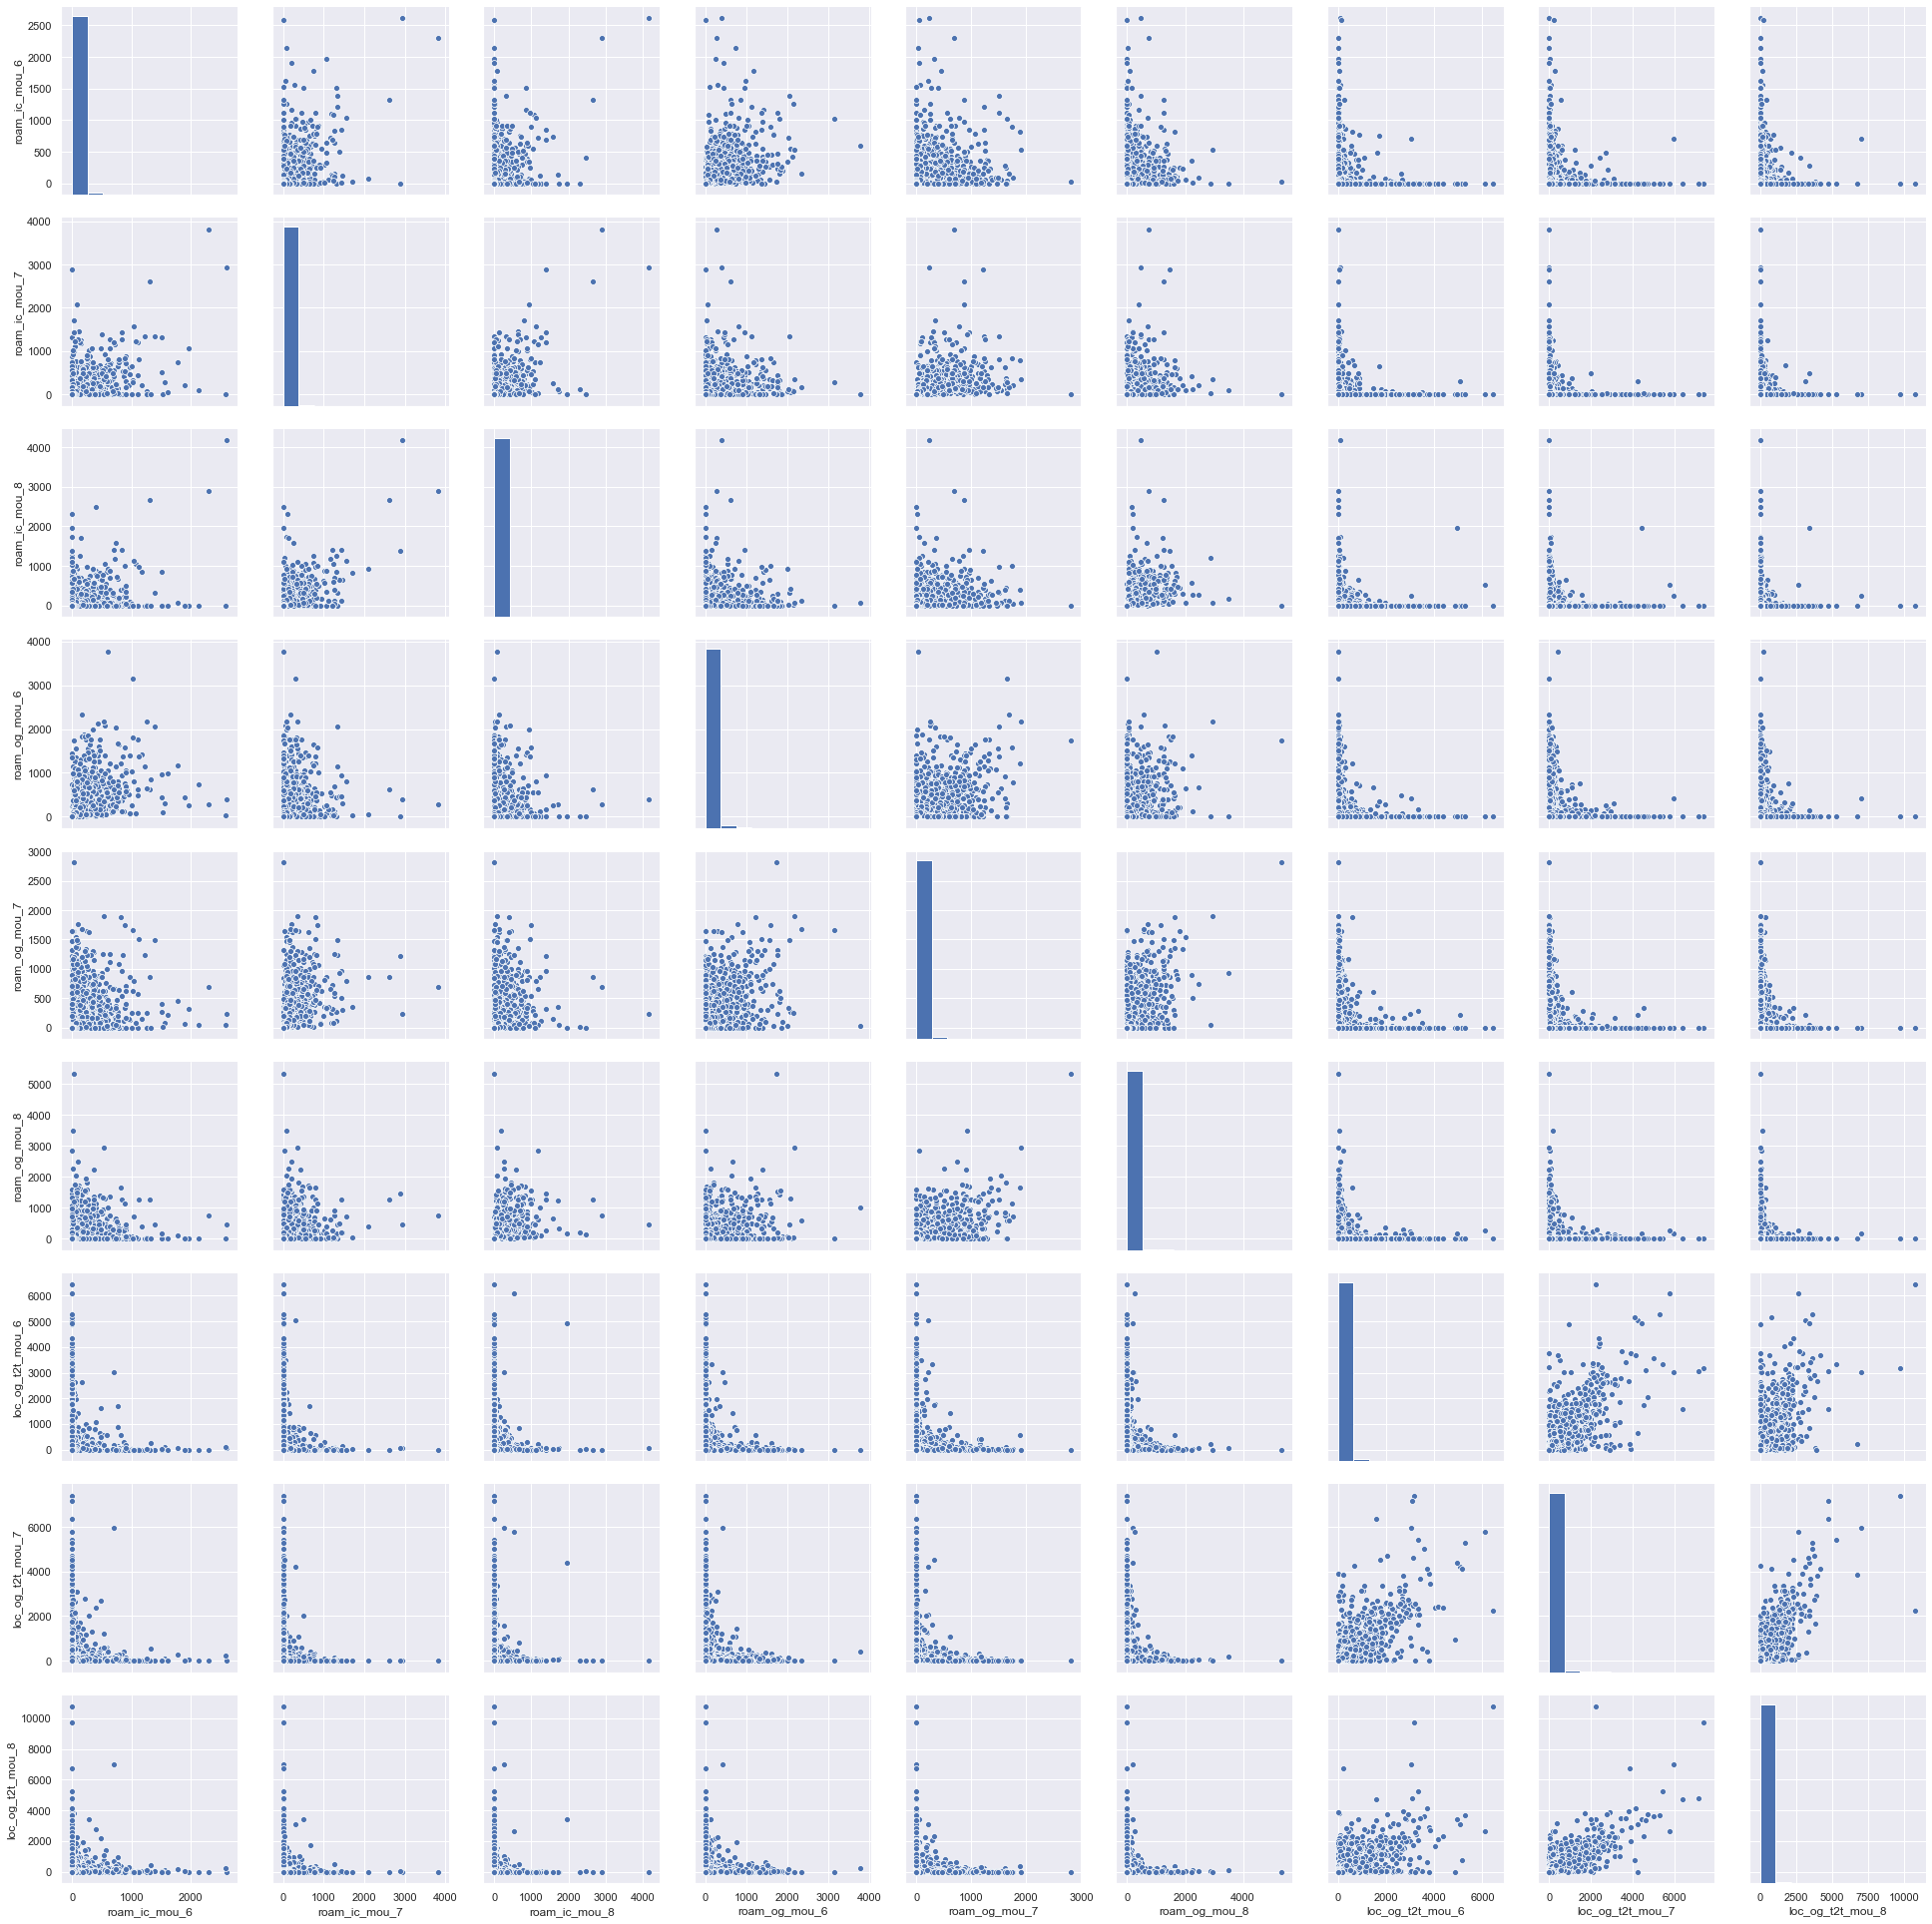

In [50]:
sns.set()
cols = ['roam_ic_mou_6','roam_ic_mou_7','roam_ic_mou_8','roam_og_mou_6','roam_og_mou_7',
        'roam_og_mou_8','loc_og_t2t_mou_6','loc_og_t2t_mou_7','loc_og_t2t_mou_8']
sns.pairplot(tel_churn_main_df[cols], size = 3)
plt.show()

#### Continuation of above plots, few more pairplots for positive correlation visualization

<a id='eee'></a>
### Feature Engineering

#### AON (Age on network) is provided as days. Let's convert it to years (365 days) and create bins on tenure in the network.

In [51]:
# Divide AON value by 365 for convertion and rounding off to 1 decimal place
tel_churn_main_df['tenure_in_years'] = np.round(tel_churn_main_df['aon']/365, 1)

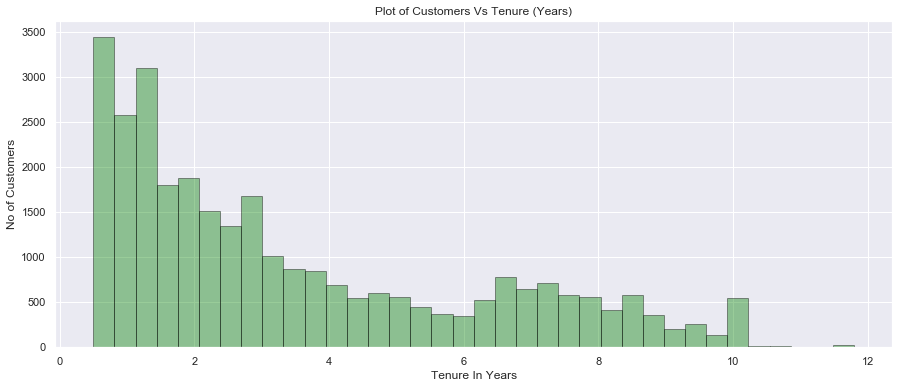

In [52]:
fig= plt.figure(figsize = (15,6))
ax_plot = sns.distplot(tel_churn_main_df['tenure_in_years'], hist=True, kde=False, 
             bins=int(180/5), color = 'green', 
             hist_kws={'edgecolor':'black'},
             kde_kws={'linewidth': 3})
ax_plot.set_ylabel('No of Customers')
ax_plot.set_xlabel('Tenure In Years')
ax_plot.set_title('Plot of Customers Vs Tenure (Years)')
plt.show()

#### From the above plot, it is concluded that major customers are in range in 0 to 2 years. As the tenure increases, customer bases decreases. There are very few customers who are associated with the operator over 10+ years

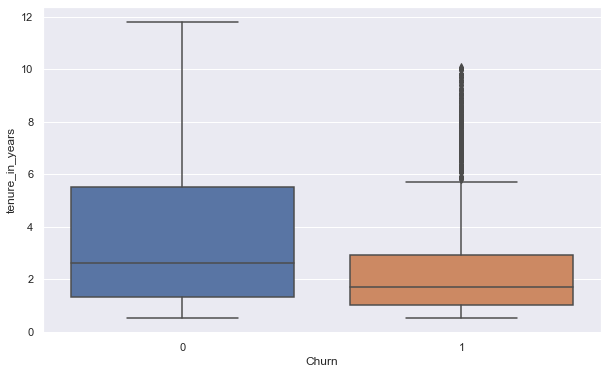

In [53]:
# Let's create a Box plot for tenure_in_years against Churn customer data
fig= plt.figure(figsize = (10,6))
sns.boxplot(x = tel_churn_main_df.Churn, y = tel_churn_main_df.tenure_in_years)

#### From the above box plot, it is concluded that, customers who are associated with the operator for longer time, do not churn. In otherwords, customer who churn out, have less number of tenure with the operator

In [54]:
# Define Bins ranges
bins = [0, 1, 2, 3, 4, 5, 10]
tel_churn_main_df['tenure_in_years'] = pd.cut(tel_churn_main_df['tenure_in_years'], bins)
tel_churn_main_df['tenure_in_years'].value_counts()

(5, 10]    7675
(1, 2]     7486
(0, 1]     5320
(2, 3]     4530
(3, 4]     2962
(4, 5]     1935
Name: tenure_in_years, dtype: int64

In [55]:
# As new feature created as "tenure_bucket" -- Dropping the original feature "aon"
tel_churn_main_df.drop(['aon'], axis=1, inplace=True)
tel_churn_main_df.shape

(29979, 125)

### Correlation Analysis Among Feature Variables

#### We still left with 131 feature, which is a good number. Let's check the correlation among the variables and see if we can drop highly correlated variables and reduced the dimentiones of the data 

In [56]:
# Let's store the correlation matrix with absolute values
corr_matt = tel_churn_main_df.corr().abs()
#corr_matt

# Select upper trangle of the correlation Matrix
upper_trangle = corr_matt.where(np.triu(np.ones(corr_matt.shape), k=1).astype(np.bool))
# Finding the index of the feature with correlation greater than 0.7
feature_to_drop = [cols for cols in upper_trangle.columns if any(upper_trangle[cols] > 0.7)]
feature_to_drop

['arpu_8',
 'onnet_mou_7',
 'onnet_mou_8',
 'offnet_mou_8',
 'loc_og_t2t_mou_7',
 'loc_og_t2t_mou_8',
 'loc_og_t2m_mou_7',
 'loc_og_t2m_mou_8',
 'loc_og_t2f_mou_7',
 'loc_og_t2f_mou_8',
 'loc_og_mou_6',
 'loc_og_mou_7',
 'loc_og_mou_8',
 'std_og_t2t_mou_6',
 'std_og_t2t_mou_7',
 'std_og_t2t_mou_8',
 'std_og_t2m_mou_6',
 'std_og_t2m_mou_7',
 'std_og_t2m_mou_8',
 'std_og_t2f_mou_8',
 'std_og_mou_6',
 'std_og_mou_7',
 'std_og_mou_8',
 'isd_og_mou_7',
 'isd_og_mou_8',
 'total_og_mou_6',
 'total_og_mou_7',
 'total_og_mou_8',
 'loc_ic_t2t_mou_7',
 'loc_ic_t2t_mou_8',
 'loc_ic_t2m_mou_7',
 'loc_ic_t2m_mou_8',
 'loc_ic_t2f_mou_7',
 'loc_ic_t2f_mou_8',
 'loc_ic_mou_6',
 'loc_ic_mou_7',
 'loc_ic_mou_8',
 'std_ic_t2t_mou_7',
 'std_ic_t2t_mou_8',
 'std_ic_t2m_mou_8',
 'std_ic_t2f_mou_7',
 'std_ic_t2f_mou_8',
 'std_ic_mou_6',
 'std_ic_mou_7',
 'std_ic_mou_8',
 'total_ic_mou_6',
 'total_ic_mou_7',
 'total_ic_mou_8',
 'isd_ic_mou_7',
 'isd_ic_mou_8',
 'ic_others_8',
 'total_rech_num_8',
 'total_rech_

#### From the above list it is seen that there are quite a bit of correlated columns exist. So we can drop some of the highly correlated columns, which are less revenue generating feature

In [57]:
# Drop the above correlated feature list
#tel_churn_main_df.drop(drop_high_corr_col_list, axis=1, inplace=True)
tel_churn_main_df.drop(feature_to_drop, axis=1, inplace=True)
tel_churn_main_df.shape

(29979, 64)

In [58]:
# Checking the values for columns tenure_in_years
tel_churn_main_df.tenure_in_years.dtype

CategoricalDtype(categories=[(0, 1], (1, 2], (2, 3], (3, 4], (4, 5], (5, 10]],
              ordered=True)

In [59]:
# Checking for object type column before genating the dummies
tel_churn_main_df.select_dtypes(include=['object']).columns

Index([], dtype='object')

In [60]:
# Create Dummies for tenure_in_years
tel_churn_main_df = pd.get_dummies(tel_churn_main_df, drop_first=True)
tel_churn_main_df.shape

(29979, 68)

In [61]:
# Rename the column based on the tenure_in_years value
tel_churn_main_df.rename(columns={"tenure_in_years_(1, 2]": "tenure_in_years_1_to_2","tenure_in_years_(2, 3]":"tenure_in_years_2_to_3",
                   "tenure_in_years_(3, 4]":"tenure_in_years_3_to_4",
                   "tenure_in_years_(4, 5]":"tenure_in_years_4_to_5", "tenure_in_years_(5, 10]":"tenure_in_years_5_to_10"}, inplace=True)

In [62]:
tel_churn_main_df.shape

(29979, 68)

In [63]:
# Redundant steps -- need to remove
tel_churn_main_df.head()

mobile_number    arpu_6    arpu_7  onnet_mou_6  offnet_mou_6  \
7      7000701601  1069.180  1349.850        57.84        453.43   
8      7001524846   378.721   492.223       413.69         94.66   
13     7002191713   492.846   205.671       501.76        413.31   
16     7000875565   430.975   299.869        50.51        296.29   
17     7000187447   690.008    18.980      1185.91         61.64   

    offnet_mou_7  roam_ic_mou_6  roam_ic_mou_7  roam_ic_mou_8  roam_og_mou_6  \
7         567.16          16.23          33.49          31.64          23.74   
8          80.63           0.00           0.00           0.00           0.00   
13        119.28          23.53         144.24          72.11           7.98   
16        229.74           0.00           2.83           0.00           0.00   
17          0.00           0.00           4.76           4.81           0.00   

    roam_og_mou_7  roam_og_mou_8  loc_og_t2t_mou_6  loc_og_t2m_mou_6  \
7           12.59          38.06             51.39            308.63   
8            0.00           0.00            297.13             80.96   
13          35.26           1.44             49.63            151.13   
16          17.74           0.00             42.61            273.29   
17           8.46          13.34             38.99             58.54   

    loc_og_t2f_mou_6  loc_og_t2c_mou_6  loc_og_t2c_mou_7  loc_og_t2c_mou_8  \
7              62.13               0.0               0.0              0.00   
8               0.00               0.0               0.0              7.15   
13              4.54               0.0               0.0              0.49   
16              0.00               0.0               0.0              0.00   
17              0.00               0.0               0.0              0.00   

    std_og_t2f_mou_6  std_og_t2f_mou_7  isd_og_mou_6  spl_og_mou_6  \
7               6.66             20.08           0.0          4.50   
8               0.00              0.00           0.0          0.00   
13              0.00              0.00           0.0          0.00   
16              0.00              0.00           0.0          0.00   
17              0.00              0.00           0.0          2.58   

    spl_og_mou_7  spl_og_mou_8  loc_ic_t2t_mou_6  loc_ic_t2m_mou_6  \
7           0.00          6.50             58.14            217.56   
8           0.00         10.23             23.84             57.58   
13          0.00          4.78             67.88            142.88   
16          3.26          5.91             41.33            226.81   
17          0.00          0.00             34.54             47.41   

    loc_ic_t2f_mou_6  std_ic_t2t_mou_6  std_ic_t2m_mou_6  std_ic_t2m_mou_7  \
7             152.16             36.89             91.44            126.99   
8               0.00              0.00             22.43              4.08   
13              4.81            115.68            308.13             29.79   
16              8.71             68.79             18.68             73.08   
17              0.00              8.63              1.28              0.00   

    std_ic_t2f_mou_6  isd_ic_mou_6  ic_others_6  ic_others_7  \
7              52.19          2.06        15.74        15.19   
8               0.00          0.00         0.00         0.00   
13              0.00        245.28        83.48        16.24   
16              0.51          0.00         0.00         0.00   
17              0.00          0.00         0.00         0.00   

    total_rech_num_6  total_rech_num_7  max_rech_amt_6  max_rech_amt_7  \
7                  5                 5            1580             790   
8                 19                21              90             154   
13                 6                 4             110             110   
16                10                 6             110             110   
17                19                 2             110               0   

    max_rech_amt_8  date_of_last_rech_6  date_of_last_rech_7  \
7      

<a id='nnn'></a>
### Feature Scaling

In [64]:
# Store feature variable in X
X = tel_churn_main_df.drop(['Churn', 'mobile_number'], axis=1)
y = tel_churn_main_df['Churn']
X.shape,y.shape

((29979, 66), (29979,))

In [65]:
# defining a normalisation function 
def normalize_feature (x): 
    return ( (x-np.min(x))/ (max(x) - min(x)))
                                                                                          
# applying normalize_feature( ) to all columns 
X_normalized = X.apply(normalize_feature) 
X_normalized.head()

arpu_6    arpu_7  onnet_mou_6  offnet_mou_6  offnet_mou_7  \
7   0.110967  0.090525     0.007841      0.054223      0.058669   
8   0.087944  0.067446     0.056081      0.011320      0.008341   
13  0.091750  0.059734     0.068019      0.049425      0.012339   
16  0.089687  0.062269     0.006847      0.035431      0.023765   
17  0.098324  0.054710     0.160764      0.007371      0.000000   

    roam_ic_mou_6  roam_ic_mou_7  roam_ic_mou_8  roam_og_mou_6  roam_og_mou_7  \
7        0.006211       0.008782       0.007588       0.006289       0.004477   
8        0.000000       0.000000       0.000000       0.000000       0.000000   
13       0.009004       0.037826       0.017293       0.002114       0.012539   
16       0.000000       0.000742       0.000000       0.000000       0.006309   
17       0.000000       0.001248       0.001154       0.000000       0.003008   

    roam_og_mou_8  loc_og_t2t_mou_6  loc_og_t2m_mou_6  loc_og_t2f_mou_6  \
7        0.007131          0.007991          0.065253          0.042380   
8        0.000000          0.046200          0.017117          0.000000   
13       0.000270          0.007717          0.031953          0.003097   
16       0.000000          0.006625          0.057781          0.000000   
17       0.002500          0.006063          0.012377          0.000000   

    loc_og_t2c_mou_6  loc_og_t2c_mou_7  loc_og_t2c_mou_8  std_og_t2f_mou_6  \
7                0.0               0.0          0.000000          0.010596   
8                0.0               0.0          0.020322          0.000000   
13               0.0               0.0          0.001393          0.000000   
16               0.0               0.0          0.000000          0.000000   
17               0.0               0.0          0.000000          0.000000   

    std_og_t2f_mou_7  isd_og_mou_6  spl_og_mou_6  spl_og_mou_7  spl_og_mou_8  \
7           0.036869           0.0      0.004398      0.000000      0.004673   
8           0.000000           0.0      0.000000      0.000000      0.007355   
13          0.000000           0.0      0.000000      0.000000      0.003437   
16          0.000000           0.0      0.000000      0.002575      0.004249   
17          0.000000           0.0      0.002521      0.000000      0.000000   

    loc_ic_t2t_mou_6  loc_ic_t2m_mou_6  loc_ic_t2f_mou_6  std_ic_t2t_mou_6  \
7           0.009154          0.046350          0.090657          0.006757   
8           0.003753          0.012267          0.000000          0.000000   
13          0.010687          0.030440          0.002866          0.021189   
16          0.006507          0.048321          0.005189          0.012600   
17          0.005438          0.010100          0.000000          0.001581   

    std_ic_t2m_mou_6  std_ic_t2m_mou_7  std_ic_t2f_mou_6  isd_ic_mou_6  \
7           0.019748          0.036593          0.038627      0.000519   
8           0.004844          0.001176          0.000000      0.000000   
13          0.066547          0.008584          0.000000      0.061851   
16          0.004034          0.021058          0.000377      0.000000   
17          0.000276          0.000000          0.000000      0.000000   

    ic_others_6  ic_others_7  total_rech_num_6  total_rech_num_7  \
7      0.011710     0.010154          0.016287          0.036232   
8      0.000000     0.000000          0.061889          0.152174   
13     0.062107     0.010856          0.019544          0.028986   
16     0.000000     0.000000          0.032573          0.043478   
17     0.000000     0.000000          0.061889          0.014493   

    max_rech_amt_6  max_rech_amt_7  max_rech_amt_8  date_of_last_rech_6  \
7         0.394015        0.197007        0.355136             0.896552   
8         0.022444        0.038404        0.006743             0.827586   
13        0.027431        0.027431        0.029220             0.655172   
16        0.027431        0.027431        0.029220             1.000000   
17        0.02743

#### Splitting Data into Training and Test Sets

In [66]:
from sklearn.model_selection import train_test_split

In [67]:
# Split the data into training and test set
X_train, X_test, y_train, y_test = train_test_split(X_normalized, y, train_size=0.7, test_size=0.3, random_state=100)

In [68]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((20985, 66), (8994, 66), (20985,), (8994,))

In [69]:
print("Before OverSampling, counts of label '1' in Train Data Set: {}".format(sum(y_train==1)))
print("Before OverSampling, counts of label '0' in Train Data Set: {} \n".format(sum(y_train==0)))

Before OverSampling, counts of label '1' in Train Data Set: 1774
Before OverSampling, counts of label '0' in Train Data Set: 19211 



In [70]:
print("Before OverSampling, counts of label '1' in Test Data Set: {}".format(sum(y_test==1)))
print("Before OverSampling, counts of label '0' in Test Data Set: {} \n".format(sum(y_test==0)))

Before OverSampling, counts of label '1' in Test Data Set: 815
Before OverSampling, counts of label '0' in Test Data Set: 8179 



<a id='balance'></a>
### Balancing the Dataset

In [71]:
# Importing the SMOTE
from imblearn.over_sampling import SMOTE
oversampler_sm = SMOTE(random_state=0)
X_train_sm,y_train_sm = oversampler_sm.fit_sample(X_train,y_train)

In [72]:
print("After OverSampling, counts of label '1' in Train Data Set: {}".format(sum(y_train_sm==1)))
print("After OverSampling, counts of label '0' in Train Data Set: {} \n".format(sum(y_train_sm==0)))

After OverSampling, counts of label '1' in Train Data Set: 19211
After OverSampling, counts of label '0' in Train Data Set: 19211 



In [73]:
# Calculating the Imbalance on the data after performing the oversampling
imbalance_on_train_data = (y_train_sm != 0).sum()/(y_train_sm == 0).sum()
print("After completing the OverSampling imbalance in the Train Data : ",imbalance_on_train_data)

After completing the OverSampling imbalance in the Train Data :  1.0


<a id='fff'></a>
### Applying PCA on the Dataset


In [74]:
# Importing the PCA module
from sklearn.decomposition import PCA
pca = PCA(svd_solver='randomized', random_state=42)

In [248]:
# Applying PCA on tarin data
#pca.fit(X_train)
#pca.fit(X_train_sm)
pca.fit_transform(X_train_sm)

PCA(copy=True, iterated_power='auto', n_components=None, random_state=42,
    svd_solver='randomized', tol=0.0, whiten=False)

#### Let's plot the principal components and try to make sense of them

In [249]:
# List of PCA components
pca.components_

array([[ 5.50040312e-04,  3.61083211e-04,  1.10889746e-02, ...,
        -6.16481641e-02, -3.21996722e-02, -4.19172081e-01],
       [ 5.32886731e-04, -4.00951583e-04,  1.36501966e-02, ...,
         4.01566671e-02,  1.78859581e-02, -6.91617326e-01],
       [ 1.80114249e-04, -1.17976868e-04,  6.08609643e-03, ...,
         6.78273183e-01,  1.74735732e-01, -4.13727602e-01],
       ...,
       [-4.25909089e-01,  8.67485231e-01, -2.04268408e-03, ...,
         5.69164442e-05,  3.03051786e-04,  2.91392323e-04],
       [-3.26279175e-02, -3.16814482e-02,  3.72984457e-03, ...,
         9.89910783e-05,  5.07292078e-04, -1.30008136e-04],
       [-4.98933769e-01, -8.34089722e-02,  4.20108783e-02, ...,
         5.36456616e-04,  6.29844091e-04,  3.74434737e-04]])

In [250]:
# Let's check the variance ratio
pca.explained_variance_ratio_

array([3.05538446e-01, 2.31055215e-01, 1.43459839e-01, 8.65210867e-02,
       5.18760627e-02, 4.09998407e-02, 3.79640459e-02, 2.49164342e-02,
       1.24861489e-02, 7.39257741e-03, 6.26847452e-03, 5.72145943e-03,
       4.59817430e-03, 4.43756204e-03, 3.14267206e-03, 2.97004088e-03,
       2.64583003e-03, 2.42643836e-03, 2.16424457e-03, 1.78772073e-03,
       1.35457092e-03, 1.26333659e-03, 1.22293909e-03, 1.18238822e-03,
       1.10986836e-03, 1.07575275e-03, 1.00696218e-03, 9.56557437e-04,
       8.61403046e-04, 7.93254011e-04, 7.89312020e-04, 7.39540650e-04,
       7.07636065e-04, 6.70164814e-04, 6.41014396e-04, 5.91853449e-04,
       5.11554929e-04, 4.46939655e-04, 4.28956007e-04, 4.10148568e-04,
       3.79063359e-04, 3.59683687e-04, 3.19299716e-04, 2.94010583e-04,
       2.89457554e-04, 2.81295439e-04, 2.51935057e-04, 2.29625308e-04,
       2.24213725e-04, 2.17388649e-04, 2.11790880e-04, 2.02515775e-04,
       1.95578410e-04, 1.84982930e-04, 1.76504999e-04, 1.60041221e-04,
      

In [251]:
colnames = list(X_train.columns)
pcs_df = pd.DataFrame({'PC1':pca.components_[0],'PC2':pca.components_[1], 
                       'PC3':pca.components_[2],'PC4':pca.components_[3],
                       'PC5':pca.components_[4],'PC6':pca.components_[5],
                       'PC7':pca.components_[6],'PC8':pca.components_[7],
                       'PC9':pca.components_[8],'PC10':pca.components_[9],
                       'Feature':colnames})
pcs_df.head()

PC1       PC2       PC3       PC4       PC5       PC6       PC7  \
0  0.000550  0.000533  0.000180  0.000607  0.001014 -0.003600  0.005180   
1  0.000361 -0.000401 -0.000118 -0.000356 -0.008372  0.003934 -0.009024   
2  0.011089  0.013650  0.006086  0.000788 -0.000594 -0.012482 -0.018929   
3  0.005113  0.008701 -0.002016 -0.000940 -0.011733 -0.017654 -0.004879   
4  0.003442  0.004440 -0.002459 -0.002404 -0.034836  0.006184 -0.043470   

        PC8       PC9      PC10       Feature  
0 -0.012154 -0.000156  0.086753        arpu_6  
1  0.002015  0.002754  0.072763        arpu_7  
2 -0.086007 -0.087910 -0.216549   onnet_mou_6  
3 -0.066558 -0.046915  0.581017  offnet_mou_6  
4 -0.015356 -0.036027  0.456224  offnet_mou_7

#### Understanding how the original variables are loaded on the principal components. It can be verified from above as well.

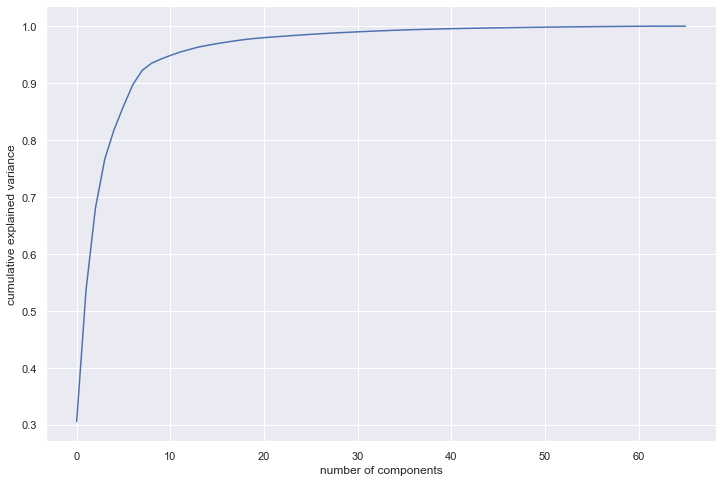

In [252]:
#Making the screeplot - plotting the cumulative variance against the number of components
%matplotlib inline
fig = plt.figure(figsize = (12,8))
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance')
plt.grid(True)
plt.show()

#### Looking at the screeplot to assess the number of principal components and variance. 
#### 25 components are enough to describe more than 95% of the variance in the dataset
- We will choose 25 components for modeling

In [253]:
#Using incremental PCA for efficiency
from sklearn.decomposition import IncrementalPCA
pca_final = IncrementalPCA(n_components=25)

#### Basis transformation - getting the data onto our PCs

In [254]:
#df_train_pca = pca_final.fit_transform(X_train)
df_train_pca = pca_final.fit_transform(X_train_sm)
df_train_pca.shape

(38422, 25)

#### Creating correlation matrix for the principal components - we expect little to no correlation

In [255]:
#creating correlation matrix for the principal components
corrmat = np.corrcoef(df_train_pca.transpose())

In [256]:
# Importing matplotlib and seaborn
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

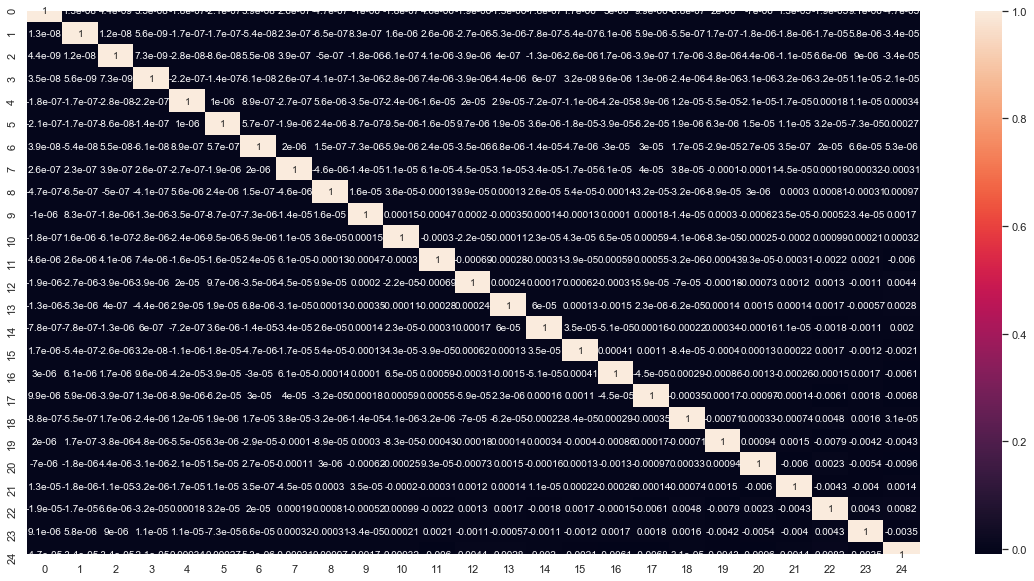

In [257]:
# Let's see the correlation matrix 
plt.figure(figsize = (20,10))        # Size of the figure
sns.heatmap(corrmat, annot = True)
plt.show()

In [258]:
# 1s -> 0s in diagonals
corrmat_nodiag = corrmat - np.diagflat(corrmat.diagonal())
print("max corr:",corrmat_nodiag.max(), ", min corr: ", corrmat_nodiag.min(),)
# we see that correlations are indeed very close to 0

max corr: 0.008217882798285935 , min corr:  -0.009576852906172587


#### There is no correlation between any two components!
- We have effectively removed multicollinearity and our models will be much more stable

In [259]:
#Applying selected components to the test data - 25 components
df_test_pca = pca_final.transform(X_test)
df_test_pca.shape

(8994, 25)

<a id='ggg'></a>
### Logistic Regression With PCA

- From the Churn Distribution plot above it is observed that only 8.6% customer churn out and the rest of the customer did not churn. The data is highly imbalanced. We need to do the class imbalance with class_width = balanced to balance the data

In [260]:
#Training the model on the train data
from sklearn.linear_model import LogisticRegression
from sklearn import metrics

#learner_pca = LogisticRegression(class_weight='balanced')
logistic_pca = LogisticRegression()
model_pca_logistic = logistic_pca.fit(df_train_pca,y_train_sm)

In [261]:
prediction_probs_test = model_pca_logistic.predict_proba(df_test_pca)[:,1]
"{:2.2}".format(metrics.roc_auc_score(y_test, prediction_probs_test))

'0.81'

In [262]:
#Making prediction on the test data
prediction_test_logistic = model_pca_logistic.predict_proba(df_test_pca)
y_pred_default_logistic = model_pca_logistic.predict(df_test_pca)

In [263]:
# Import the required packages from sklearn
from sklearn.metrics import confusion_matrix, accuracy_score

In [264]:
# print(classification_report(y_test,y_pred_default_logistic))
print(confusion_matrix(y_test,y_pred_default_logistic))
print(accuracy_score(y_test,y_pred_default_logistic))

[[6231 1948]
 [ 212  603]]
0.7598398932621748


In [265]:
# Converting y_pred to a dataframe which is an array
y_pred_df = pd.DataFrame(prediction_test_logistic)
# Converting to column dataframe
y_pred_1 = y_pred_df.iloc[:,[1]]

# Removing index for both dataframes to append them side by side 
y_pred_1.reset_index(drop=True, inplace=True)
y_test.reset_index(drop=True, inplace=True)
# Appending y_test_df and y_pred_1
y_pred_final = pd.concat([y_test,y_pred_1],axis=1)

# Renaming the column 
y_pred_final= y_pred_final.rename(columns={ 1 : 'churn_prob'})

In [266]:
from sklearn.metrics import roc_curve, auc
fpr, tpr, thresholds =roc_curve(y_pred_final.Churn,y_pred_final.churn_prob)
roc_auc = auc(fpr, tpr)
print('ROC_AUC score: ',roc_auc)

ROC_AUC score:  0.8140548479309199


### ROC Curve

In [267]:
#ROC Curve
def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(6, 6))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return fpr, tpr, thresholds

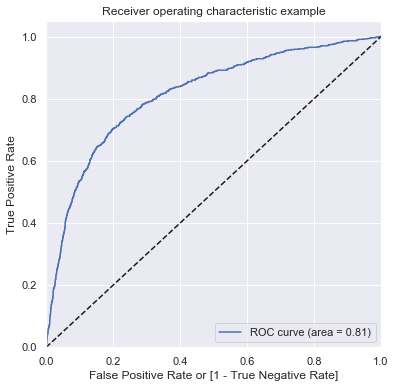

(array([0.00000000e+00, 1.22264335e-04, 1.22264335e-04, ...,
        9.99755471e-01, 9.99877736e-01, 1.00000000e+00]),
 array([0.        , 0.        , 0.00122699, ..., 1.        , 1.        ,
        1.        ]),
 array([1.99840246e+00, 9.98402459e-01, 9.97349373e-01, ...,
        2.91042861e-07, 1.57587618e-07, 1.38344321e-07]))

In [268]:
draw_roc(y_pred_final.Churn, y_pred_final.churn_prob)

In [269]:
# Let's create columns with different probability cutoffs 
numbers = [float(x)/10 for x in range(10)]
for i in numbers:
    y_pred_final[i]= y_pred_final.churn_prob.map( lambda x: 1 if x > i else 0)
y_pred_final.head()

Churn  churn_prob  0.0  0.1  0.2  0.3  0.4  0.5  0.6  0.7  0.8  0.9
0      0    0.151094    1    1    0    0    0    0    0    0    0    0
1      0    0.335316    1    1    1    1    0    0    0    0    0    0
2      0    0.292064    1    1    1    0    0    0    0    0    0    0
3      0    0.424009    1    1    1    1    1    0    0    0    0    0
4      0    0.936765    1    1    1    1    1    1    1    1    1    1

In [270]:
# Now let's calculate accuracy sensitivity and specificity for various probability cutoffs.
cutoff_df = pd.DataFrame( columns = ['prob','accuracy','sensi','speci'])

from sklearn.metrics import confusion_matrix

num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in num:
    cm1 = metrics.confusion_matrix( y_pred_final.Churn, y_pred_final[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    sensi = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    speci = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,sensi,speci]
print(cutoff_df)

     prob  accuracy     sensi     speci
0.0   0.0  0.090616  0.000000  1.000000
0.1   0.1  0.234712  0.161389  0.970552
0.2   0.2  0.366022  0.308106  0.947239
0.3   0.3  0.498332  0.458736  0.895706
0.4   0.4  0.635757  0.615845  0.835583
0.5   0.5  0.759840  0.761829  0.739877
0.6   0.6  0.845008  0.869544  0.598773
0.7   0.7  0.885590  0.928598  0.453988
0.8   0.8  0.900044  0.962343  0.274847
0.9   0.9  0.907716  0.985573  0.126380


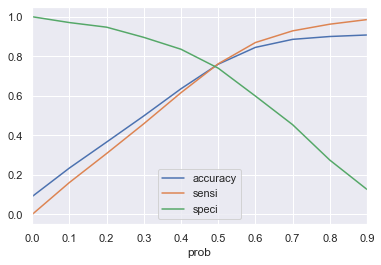

In [271]:
# Let's plot accuracy sensitivity and specificity for various probabilities.
cutoff_df.plot.line(x='prob', y=['accuracy','sensi','speci'])

In [272]:
# Finidng the optimal cutoff
def find_the_Optimal_Cutoff(target, predicted):

    fpr, tpr, threshold = roc_curve(target, predicted)
    i = np.arange(len(tpr)) 
    roc = pd.DataFrame({'tf' : pd.Series(tpr-(1-fpr), index=i), 'threshold' : pd.Series(threshold, index=i)})
    roc_t = roc.ix[(roc.tf-0).abs().argsort()[:1]]

    return list(roc_t['threshold'])

# Find optimal probability threshold
threshold = find_the_Optimal_Cutoff(y_pred_final.Churn,y_pred_final.churn_prob)
print('Threshold: ',threshold)

Threshold:  [0.49123624816197103]


- Creating new column 'predicted' with 1 if Churn_Prob>0.49 else 0

In [273]:
# Creating new column 'pred_churn' with 1 if Churn_Prob>0.49 else 0
y_pred_final['pred_churn'] = y_pred_final.churn_prob.map( lambda x: 1 if x > 0.49 else 0)

y_pred_final.Churn.value_counts()

0    8179
1     815
Name: Churn, dtype: int64

### Confusion matrix

In [274]:
# Confusion matrix 
confusion_logistic_regression = metrics.confusion_matrix( y_pred_final.Churn, y_pred_final.pred_churn )
confusion_logistic_regression

array([[6116, 2063],
       [ 204,  611]], dtype=int64)

In [275]:
print(accuracy_score(y_test,y_pred_final.pred_churn))

0.7479430731598844


#### Matrics Values - Logistic Regression Model With PCA

In [276]:
TP = confusion_logistic_regression[1,1] # true positive 
TN = confusion_logistic_regression[0,0] # true negatives
FP = confusion_logistic_regression[0,1] # false positives
FN = confusion_logistic_regression[1,0] # false negatives

print('Accuracy Score on test data: ', accuracy_score(y_test,y_pred_final.pred_churn))

# Let's see the sensitivity of our logistic regression model
print('Sensitivity/ Recall(Churn Correctly Detected): ', TP / float(TP+FN))

# positive predictive value 
print('Precision or positive predictive value: ', TP / float(TP+FP))

# Let us calculate specificity
print('Specificity: ',TN / float(TN+FP))

# Calculate false postive rate - predicting churn when customer does not have churned
print('false postive rate: ',FP/ float(TN+FP))

# Negative predictive value
print('Negative predictive value: ',TN / float(TN+ FN))

## Misclassification rate

print('Misclassification Rate: ',(FN+FP)/(TP+TN+FP+FN))

Accuracy Score on test data:  0.7479430731598844
Sensitivity/ Recall(Churn Correctly Detected):  0.7496932515337423
Precision or positive predictive value:  0.22849663425579655
Specificity:  0.7477686758772466
false postive rate:  0.2522313241227534
Negative predictive value:  0.9677215189873418
Misclassification Rate:  0.25205692684011566


<a id='rfe'></a>
### LogistcRegression With RFE (10 Features)
- We are selecting 10 features

In [277]:
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import RFE

# Using another technique to balance the data
logreg_rfe = LogisticRegression(class_weight='balanced')
# Selecting 10 most significant features
rfe_logistic = RFE(logreg_rfe, 10)
rfe_logistic = rfe_logistic.fit(X_normalized,y)
print(rfe_logistic.support_)                      

[ True False False False False False False False False  True  True False
 False False False False False False False False False False  True False
 False False False False False False False False False False False False
 False  True False False False False False  True False False False False
 False False  True False  True False False  True False False False False
  True False False False False False]


In [278]:
print(rfe_logistic.ranking_)

[ 1 26 15  8 47 54 18  4 39  1  1 14  3 19 50 29 16 56 40 34 57 20  1 23
 41  5 27 48 30 24 37 55 28 17 42  2  9  1 53 21  7 45 10  1 36 32 11 13
 43 33  1 12  1 35 25  1 31 22  6 44  1 51 52 49 46 38]


In [279]:
col = X.columns[rfe_logistic.support_]
col

Index(['arpu_6', 'roam_og_mou_7', 'roam_og_mou_8', 'spl_og_mou_8',
       'max_rech_amt_8', 'last_day_rch_amt_8', 'monthly_2g_8', 'sachet_2g_8',
       'monthly_3g_8', 'sep_vbc_3g'],
      dtype='object')

In [280]:
import statsmodels.api as sm
# UDF for calculating vif value
def calculate_vif(input_data, dependent_col):
    vif_df = pd.DataFrame( columns = ['Feature', 'VIF'])
    x_vars=input_data.drop([dependent_col], axis=1)
    xvar_names=x_vars.columns
    for i in range(0,xvar_names.shape[0]):
        y=x_vars[xvar_names[i]] 
        x=x_vars[xvar_names.drop(xvar_names[i])]
        rsq=sm.OLS(y,x).fit().rsquared  
        vif=round(1/(1-rsq),2)
        vif_df.loc[i] = [xvar_names[i], vif]
    return vif_df.sort_values(by = 'VIF', axis=0, ascending=False, inplace=False)

#### Correlation matrix

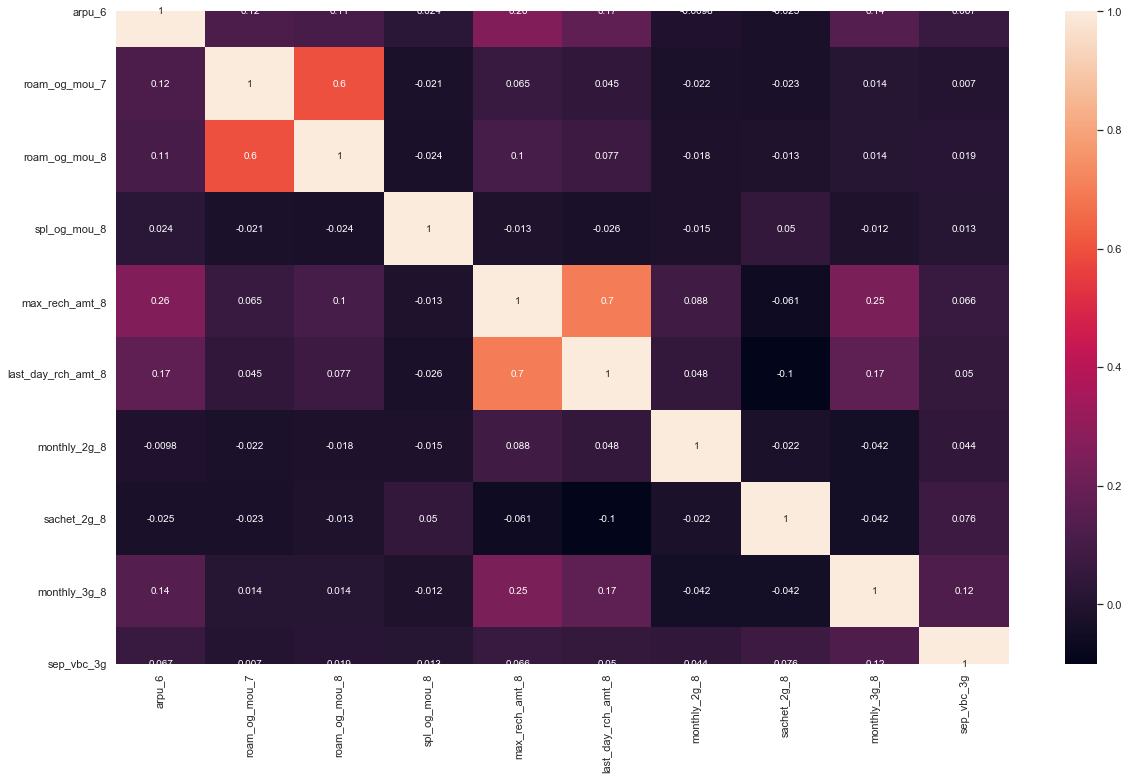

In [281]:
# Let's see the correlation matrix 
plt.figure(figsize = (20,12))        # Size of the figure
sns.heatmap(X_normalized[col].corr(),annot = True)

#### Check VIF value

In [282]:
col_for_vif = list(col)
col_for_vif.append('Churn')
calculate_vif(input_data=tel_churn_main_df[col_for_vif], dependent_col='Churn')

Feature   VIF
4      max_rech_amt_8  3.81
5  last_day_rch_amt_8  2.83
0              arpu_6  1.95
1       roam_og_mou_7  1.64
2       roam_og_mou_8  1.63
8        monthly_3g_8  1.19
6        monthly_2g_8  1.09
7         sachet_2g_8  1.08
3        spl_og_mou_8  1.07
9          sep_vbc_3g  1.05

- VIF looks good as all the values are less than 5. Now will select these coloums for creating LogisticRegression Model

In [283]:
# Let's run the model using the selected variables
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
logsk = LogisticRegression(class_weight='balanced')
logsk.fit(X_train[col], y_train)

LogisticRegression(C=1.0, class_weight='balanced', dual=False,
                   fit_intercept=True, intercept_scaling=1, l1_ratio=None,
                   max_iter=100, multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

#### ROC_AUC score

In [284]:
#Making prediction on the test data
pred_probs_test = logsk.predict_proba(X_test[col])[:,1]
"{:2.2}".format(metrics.roc_auc_score(y_test, pred_probs_test))

'0.83'

In [285]:
#Making prediction on the test data
pred_test = logsk.predict_proba(X_test[col])
y_pred_default = logsk.predict(X_test[col])

In [286]:
# Import classification_report
from sklearn.metrics import classification_report

print(classification_report(y_test,y_pred_default))
print(confusion_matrix(y_test,y_pred_default))
print('accuracy_score : ',accuracy_score(y_test,y_pred_default))

              precision    recall  f1-score   support

           0       0.98      0.65      0.78      8179
           1       0.19      0.84      0.31       815

    accuracy                           0.66      8994
   macro avg       0.58      0.74      0.54      8994
weighted avg       0.90      0.66      0.73      8994

[[5276 2903]
 [ 133  682]]
accuracy_score :  0.6624416277518346


In [287]:
# Converting y_pred to a dataframe which is an array
y_pred_df = pd.DataFrame(pred_test)
# Converting to column dataframe
y_pred_1 = y_pred_df.iloc[:,[1]]

# Removing index for both dataframes to append them side by side 
y_pred_1.reset_index(drop=True, inplace=True)
y_test.reset_index(drop=True, inplace=True)
# Appending y_test_df and y_pred_1
y_pred_final = pd.concat([y_test,y_pred_1],axis=1)

# Renaming the column 
y_pred_final= y_pred_final.rename(columns={ 1 : 'churn_prob'})

In [288]:
from sklearn.metrics import roc_curve, auc
fpr, tpr, thresholds =roc_curve(y_pred_final.Churn,y_pred_final.churn_prob)
roc_auc = auc(fpr, tpr)
print('ROC_AUC Score: ',roc_auc)

ROC_AUC Score:  0.8315836531833358


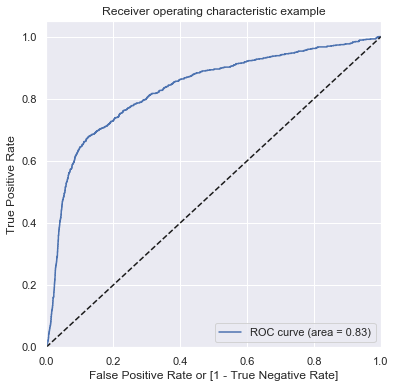

(array([0.00000000e+00, 1.22264335e-04, 2.44528671e-04, ...,
        9.99755471e-01, 9.99877736e-01, 1.00000000e+00]),
 array([0., 0., 0., ..., 1., 1., 1.]),
 array([1.99864800e+00, 9.98647998e-01, 9.97877264e-01, ...,
        7.69293440e-07, 2.31835149e-07, 9.69636208e-08]))

In [289]:
draw_roc(y_pred_final.Churn, y_pred_final.churn_prob)

In [290]:
# Let's create columns with different probability cutoffs 
numbers = [float(x)/10 for x in range(10)]
for i in numbers:
    y_pred_final[i]= y_pred_final.churn_prob.map( lambda x: 1 if x > i else 0)
y_pred_final.head()

Churn  churn_prob  0.0  0.1  0.2  0.3  0.4  0.5  0.6  0.7  0.8  0.9
0      0    0.483690    1    1    1    1    1    0    0    0    0    0
1      0    0.445741    1    1    1    1    1    0    0    0    0    0
2      0    0.430716    1    1    1    1    1    0    0    0    0    0
3      0    0.332093    1    1    1    1    0    0    0    0    0    0
4      0    0.974795    1    1    1    1    1    1    1    1    1    1

In [291]:
# Now let's calculate accuracy sensitivity and specificity for various probability cutoffs.
cutoff_df = pd.DataFrame( columns = ['prob','accuracy','sensi','speci'])
from sklearn.metrics import confusion_matrix
num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in num:
    cm1 = metrics.confusion_matrix( y_pred_final.Churn, y_pred_final[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    sensi = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    speci = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,sensi,speci]
print(cutoff_df)

     prob  accuracy     sensi     speci
0.0   0.0  0.090616  0.000000  1.000000
0.1   0.1  0.148543  0.065045  0.986503
0.2   0.2  0.244052  0.172026  0.966871
0.3   0.3  0.335446  0.274606  0.946012
0.4   0.4  0.447298  0.400049  0.921472
0.5   0.5  0.662442  0.645067  0.836810
0.6   0.6  0.874249  0.897053  0.645399
0.7   0.7  0.904937  0.983494  0.116564
0.8   0.8  0.905826  0.992909  0.031902
0.9   0.9  0.907272  0.996577  0.011043


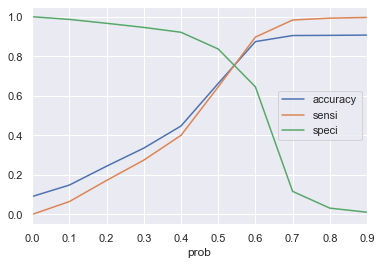

In [292]:
# Let's plot accuracy sensitivity and specificity for various probabilities.
cutoff_df.plot.line(x='prob', y=['accuracy','sensi','speci'])

In [293]:
## Finidng the optimal cutoff
def Find_Optimal_Cutoff(target, predicted):

    fpr, tpr, threshold = roc_curve(target, predicted)
    i = np.arange(len(tpr)) 
    roc = pd.DataFrame({'tf' : pd.Series(tpr-(1-fpr), index=i), 'threshold' : pd.Series(threshold, index=i)})
    roc_t = roc.ix[(roc.tf-0).abs().argsort()[:1]]

    return list(roc_t['threshold'])

# Find optimal probability threshold
threshold = Find_Optimal_Cutoff(y_pred_final.Churn,y_pred_final.churn_prob)
print('CutOff threshold: ', threshold)

CutOff threshold:  [0.5510890526742288]


In [294]:
# Creating new column 'predicted' with 1 if Churn_Prob>0.55 else 0
y_pred_final['pred_churn'] = y_pred_final.churn_prob.map( lambda x: 1 if x > 0.55 else 0)
y_pred_final.Churn.value_counts()

0    8179
1     815
Name: Churn, dtype: int64

In [295]:
# Confusion matrix 
confusion_rfe = metrics.confusion_matrix( y_pred_final.Churn, y_pred_final.pred_churn)
confusion_rfe

array([[6215, 1964],
       [ 192,  623]], dtype=int64)

#### Matrics Values - Logistic Regression Model With RFE

In [296]:
TP = confusion_rfe[1,1] # true positive 
TN = confusion_rfe[0,0] # true negatives
FP = confusion_rfe[0,1] # false positives
FN = confusion_rfe[1,0] # false negatives

print('Accuracy Score on test data: ', accuracy_score(y_test,y_pred_final.pred_churn))

# Let's see the sensitivity of our logistic regression model
print('Sensitivity/ Recall(Churn Correctly Detected): ', TP / float(TP+FN))

# positive predictive value 
print('Precision or positive predictive value: ', TP / float(TP+FP))

# Let us calculate specificity
print('Specificity: ',TN / float(TN+FP))

# Calculate false postive rate - predicting churn when customer does not have churned
print('false postive rate: ',FP/ float(TN+FP))

# Negative predictive value
print('Negative predictive value: ',TN / float(TN+ FN))

## Misclassification rate
print('Misclassification Rate: ',(FN+FP)/(TP+TN+FP+FN))

Accuracy Score on test data:  0.7602846342005781
Sensitivity/ Recall(Churn Correctly Detected):  0.7644171779141105
Precision or positive predictive value:  0.24081948202551218
Specificity:  0.7598728450910869
false postive rate:  0.24012715490891307
Negative predictive value:  0.9700327766505384
Misclassification Rate:  0.23971536579942185


<a id='iii'></a>
### DecisionTreeClassifier With PCA

In [297]:
# Importing decision tree classifier from sklearn
from sklearn.tree import DecisionTreeClassifier

# Fit the decision tree with default hyperparameters, apart from max_depth which is 5 so that we can plot and read the tree.
dt_default = DecisionTreeClassifier(max_depth=5)
dt_default.fit(df_train_pca,y_train_sm)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=5,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

In [298]:
# Let's check the evaluation metrics of our default Decision Tree model

# Making predictions
y_pred_default_dt = dt_default.predict(df_test_pca)

print(classification_report(y_test,y_pred_default_dt))
print(confusion_matrix(y_test,y_pred_default_dt))
print('Acuracy Score', accuracy_score(y_test,y_pred_default_dt))

              precision    recall  f1-score   support

           0       0.97      0.66      0.78      8179
           1       0.19      0.79      0.30       815

    accuracy                           0.67      8994
   macro avg       0.58      0.72      0.54      8994
weighted avg       0.90      0.67      0.74      8994

[[5360 2819]
 [ 174  641]]
Acuracy Score 0.6672225928396709


In [299]:
confusion_matt_defauly_dt = confusion_matrix(y_test,y_pred_default)
TP = confusion_matt_defauly_dt[1,1] # true positive 
TN = confusion_matt_defauly_dt[0,0] # true negatives
FP = confusion_matt_defauly_dt[0,1] # false positives
FN = confusion_matt_defauly_dt[1,0] # false negatives

print('Acuracy Score', accuracy_score(y_test,y_pred_default))

# Let's see the sensitivity of our logistic regression model
print('Sensitivity/ Recall(Churn Correctly Detected): ', TP / float(TP+FN))

# positive predictive value 
print('Precision or positive predictive value: ', TP / float(TP+FP))

# Let us calculate specificity
print('Specificity: ',TN / float(TN+FP))

# Calculate false postive rate - predicting churn when customer does not have churned
print('false postive rate: ',FP/ float(TN+FP))

# Negative predictive value
print('Negative predictive value: ',TN / float(TN+ FN))

## Misclassification rate
print('Misclassification Rate: ',(FN+FP)/(TP+TN+FP+FN))

Acuracy Score 0.6624416277518346
Sensitivity/ Recall(Churn Correctly Detected):  0.8368098159509203
Precision or positive predictive value:  0.19023709902370992
Specificity:  0.6450666340628438
false postive rate:  0.35493336593715613
Negative predictive value:  0.9754113514512849
Misclassification Rate:  0.33755837224816543


#### As we see above that Sensitivity/ Recall(Churn Correctly Detected) is 0.83, which is good. Let's see if we can futher increase it by tuning hyperparameters

<a id='jjj'></a>
### Hyperparameter Tuning for DecisionTree Classifier

In [300]:
# let's tune hyper parameters for DecisionTree Classifier 
# GridSearchCV to find optimal max_depth

from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV

# Specify the number of folds for k-fold CV
n_folds = 5

# parameters to build the model on
parameters = {'max_depth': range(1, 40)}

# instantiate the model
dtree_classifier = DecisionTreeClassifier(criterion = "gini", random_state = 100)

# fit tree on training data
tree = GridSearchCV(dtree_classifier, parameters, 
                    cv=n_folds, 
                   scoring="accuracy",
                   return_train_score=True)
tree.fit(df_train_pca,y_train_sm)

GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=DecisionTreeClassifier(class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features=None,
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              presort=False, random_state=100,
                                              splitter='best'),
             iid='warn', n_jobs=None, param_grid={'max_depth': range(1, 40)},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
             scoring='

In [301]:
# Scores of GridSearch CV
scores_hy = tree.cv_results_
pd.DataFrame(scores_hy).head()

mean_fit_time  std_fit_time  mean_score_time  std_score_time  \
0       0.090159      0.001017         0.000998    3.504023e-07   
1       0.163824      0.003135         0.000200    3.993034e-04   
2       0.235720      0.002480         0.000000    0.000000e+00   
3       0.307978      0.003117         0.001821    4.123096e-04   
4       0.378075      0.003721         0.002407    2.873887e-03   

  param_max_depth            params  split0_test_score  split1_test_score  \
0               1  {'max_depth': 1}           0.664845           0.656429   
1               2  {'max_depth': 2}           0.686053           0.685450   
2               3  {'max_depth': 3}           0.712074           0.705492   
3               4  {'max_depth': 4}           0.726516           0.724362   
4               5  {'max_depth': 5}           0.746552           0.742582   

   split2_test_score  split3_test_score  split4_test_score  mean_test_score  \
0           0.650573           0.655648           0.665539         0.658607   
1           0.679073           0.682717           0.687793         0.684217   
2           0.698725           0.700156           0.715122         0.706314   
3           0.723712           0.730739           0.727356         0.726537   
4           0.750521           0.754945           0.750911         0.749102   

   std_test_score  rank_test_score  split0_train_score  split1_train_score  \
0        0.005745               39            0.658934            0.659770   
1        0.003046               38            0.686654            0.687716   
2        0.006434               37            0.711055            0.715564   
3        0.002492               36            0.733049            0.733197   
4        0.004206               35            0.757874            0.754376   

   split2_train_score  split3_train_score  split4_train_score  \
0            0.661201            0.661299            0.657492   
1            0.689245            0.682478            0.687260   
2            0.706585            0.699297            0.713514   
3            0.735572            0.734238            0.728414   
4            0.757824            0.758377            0.755612   

   mean_train_score  std_train_score  
0          0.659739         0.001433  
1          0.686670         0.002265  
2          0.709203         0.005787  
3          0.732894         0.002415  
4          0.756813         0.001548

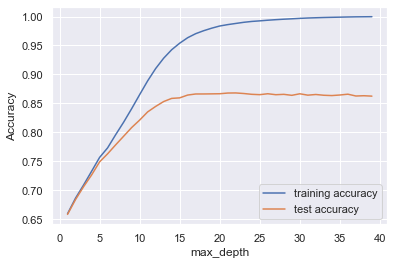

In [302]:
# Plotting accuracy with max_depth
plt.figure()
plt.plot(scores_hy["param_max_depth"], 
         scores_hy['mean_train_score'], 
         label="training accuracy")
plt.plot(scores_hy["param_max_depth"], 
         scores_hy["mean_test_score"], 
         label="test accuracy")
plt.xlabel("max_depth")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

#### From the above plot it is clear that max_depth 16 is optimum, after that both train and test score flatten out

In [303]:
# Let's tune min sample leaf Parameters to build the model
parameters = {'min_samples_leaf': range(5, 200, 20)}

# instantiate the model
dtree = DecisionTreeClassifier(criterion = "gini", random_state = 100)

# fit tree on training data
tree = GridSearchCV(dtree, parameters, 
                    cv=n_folds, 
                   scoring="accuracy",
                   return_train_score=True)
tree.fit(df_train_pca,y_train_sm)

GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=DecisionTreeClassifier(class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features=None,
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              presort=False, random_state=100,
                                              splitter='best'),
             iid='warn', n_jobs=None,
             param_grid={'min_samples_leaf': range(5, 200, 20)},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=Tru

In [304]:
# Scores of GridSearch CV
scores_min_leaf = tree.cv_results_
pd.DataFrame(scores_min_leaf).head()

mean_fit_time  std_fit_time  mean_score_time  std_score_time  \
0       1.030836      0.031420         0.003239        0.002417   
1       0.863997      0.019684         0.000607        0.000803   
2       0.801553      0.015100         0.000598        0.000797   
3       0.768227      0.022019         0.001209        0.000760   
4       0.724163      0.016963         0.002406        0.002955   

  param_min_samples_leaf                    params  split0_test_score  \
0                      5   {'min_samples_leaf': 5}           0.853240   
1                     25  {'min_samples_leaf': 25}           0.814858   
2                     45  {'min_samples_leaf': 45}           0.793781   
3                     65  {'min_samples_leaf': 65}           0.789357   
4                     85  {'min_samples_leaf': 85}           0.786625   

   split1_test_score  split2_test_score  split3_test_score  split4_test_score  \
0           0.851900           0.848386           0.852160           0.847866   
1           0.825872           0.824961           0.823269           0.812988   
2           0.812467           0.811947           0.812207           0.808563   
3           0.800755           0.800495           0.803227           0.800755   
4           0.794898           0.789823           0.793467           0.796330   

   mean_test_score  std_test_score  rank_test_score  split0_train_score  \
0         0.850711        0.002164                1            0.949668   
1         0.820389        0.005378                2            0.868656   
2         0.807792        0.007149                3            0.838951   
3         0.798917        0.004883                4            0.824798   
4         0.792228        0.003540                5            0.813997   

   split1_train_score  split2_train_score  split3_train_score  \
0            0.947362            0.950355            0.946906   
1            0.868729            0.867883            0.867038   
2            0.837595            0.839254            0.839840   
3            0.824029            0.825200            0.826209   
4            0.816091            0.815017            0.815017   

   split4_train_score  mean_train_score  std_train_score  
0            0.947719          0.948402         0.001357  
1            0.867623          0.867986         0.000639  
2            0.839287          0.838985         0.000752  
3            0.825265          0.825100         0.000708  
4            0.813716          0.814768         0.000846

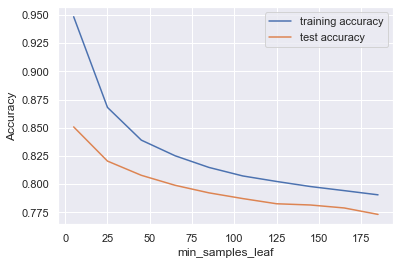

In [305]:
# plotting accuracies with min_samples_leaf
plt.figure()
plt.plot(scores_min_leaf["param_min_samples_leaf"], 
         scores_min_leaf["mean_train_score"], 
         label="training accuracy")
plt.plot(scores_min_leaf["param_min_samples_leaf"], 
         scores_min_leaf["mean_test_score"], 
         label="test accuracy")
plt.xlabel("min_samples_leaf")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

#### From the above plot it is evident that both train and test score are at peak when min samples leaf = 5 and test score flatten at 40 and started dropping beyond 140

In [306]:
# Tuning min sample split parameters to build the model
parameters = {'min_samples_split': range(5, 200, 20)}

# instantiate the model
dtree = DecisionTreeClassifier(criterion = "gini", random_state = 100)

# fit tree on training data
tree = GridSearchCV(dtree, parameters, 
                    cv=n_folds, 
                   scoring="accuracy",
                   return_train_score=True)
tree.fit(df_train_pca,y_train_sm)

GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=DecisionTreeClassifier(class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features=None,
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              presort=False, random_state=100,
                                              splitter='best'),
             iid='warn', n_jobs=None,
             param_grid={'min_samples_split': range(5, 200, 20)},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=Tr

In [307]:
# scores of GridSearch CV
scores_min_samples_split = tree.cv_results_
pd.DataFrame(scores_min_samples_split).head()

mean_fit_time  std_fit_time  mean_score_time  std_score_time  \
0       1.155992      0.029363         0.001811        0.000981   
1       1.152169      0.043751         0.001621        0.000812   
2       1.116443      0.013446         0.000798        0.000977   
3       1.115997      0.042497         0.004046        0.003363   
4       1.080628      0.017267         0.002842        0.002730   

  param_min_samples_split                     params  split0_test_score  \
0                       5   {'min_samples_split': 5}           0.862477   
1                      25  {'min_samples_split': 25}           0.841010   
2                      45  {'min_samples_split': 45}           0.833594   
3                      65  {'min_samples_split': 65}           0.826047   
4                      85  {'min_samples_split': 85}           0.813557   

   split1_test_score  split2_test_score  split3_test_score  split4_test_score  \
0           0.868168           0.861010           0.858798           0.856585   
1           0.851770           0.844482           0.844352           0.840448   
2           0.838365           0.839797           0.831989           0.837064   
3           0.830817           0.830297           0.823139           0.826913   
4           0.822228           0.829256           0.819885           0.823529   

   mean_test_score  std_test_score  rank_test_score  split0_train_score  \
0         0.861408        0.003926                1            0.992029   
1         0.844412        0.004036                2            0.940103   
2         0.836162        0.002929                3            0.911862   
3         0.827443        0.002838                4            0.892862   
4         0.821691        0.005105                5            0.877863   

   split1_train_score  split2_train_score  split3_train_score  \
0            0.991672            0.991769            0.990435   
1            0.941668            0.940725            0.940400   
2            0.915284            0.910892            0.912942   
3            0.896317            0.888965            0.891633   
4            0.878522            0.876960            0.875691   

   split4_train_score  mean_train_score  std_train_score  
0            0.992355          0.991652         0.000653  
1            0.943262          0.941232         0.001144  
2            0.916618          0.913520         0.002131  
3            0.893129          0.892581         0.002380  
4            0.875887          0.876985         0.001097

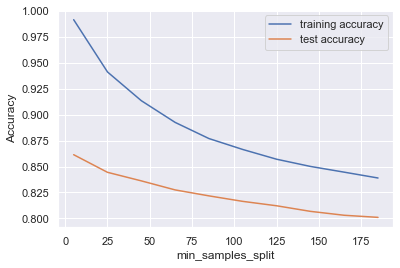

In [308]:
# plotting accuracies with min_samples_split
plt.figure()
plt.plot(scores_min_samples_split["param_min_samples_split"], 
         scores_min_samples_split["mean_train_score"], 
         label="training accuracy")
plt.plot(scores_min_samples_split["param_min_samples_split"], 
         scores_min_samples_split["mean_test_score"], 
         label="test accuracy")
plt.xlabel("min_samples_split")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

#### From the above plot it is clear than both test and train accuracy score are at peak when min_sample_split = 5 or so and decrease as min_sample_split value increases

In [309]:
# Creating the parameter grid
param_grid = {
    'max_depth': range(5, 15, 5),
    'min_samples_leaf': range(5, 200, 20),
    'min_samples_split': range(5, 200, 20),
    'criterion': ["entropy", "gini"]
}

n_folds = 5

# Instantiate the grid search model
dtree = DecisionTreeClassifier()
grid_search = GridSearchCV(estimator = dtree, param_grid = param_grid, refit='recall_score',
                          cv = n_folds, verbose = 1, n_jobs = -1)

# Fit the grid search to the data
grid_search.fit(df_train_pca,y_train_sm)

Fitting 5 folds for each of 400 candidates, totalling 2000 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:   12.7s
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:   42.6s
[Parallel(n_jobs=-1)]: Done 434 tasks      | elapsed:  1.4min
[Parallel(n_jobs=-1)]: Done 784 tasks      | elapsed:  3.0min
[Parallel(n_jobs=-1)]: Done 1234 tasks      | elapsed:  4.3min
[Parallel(n_jobs=-1)]: Done 1784 tasks      | elapsed:  5.8min
[Parallel(n_jobs=-1)]: Done 2000 out of 2000 | elapsed:  6.4min finished


GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=DecisionTreeClassifier(class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features=None,
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              presort=False, random_state=None,
                                              splitter='best'),
             iid='warn', n_jobs=-1,
             param_grid={'criterion': ['entropy', 'gini'],
                         'max_depth': range(5, 15, 5),
                        

In [310]:
# cv results final
cv_results_final = pd.DataFrame(grid_search.cv_results_)
cv_results_final.head()

mean_fit_time  std_fit_time  mean_score_time  std_score_time  \
0       1.592298      0.014805         0.003216        0.003939   
1       1.606081      0.033778         0.006032        0.004925   
2       1.632745      0.017684         0.002026        0.003110   
3       1.626968      0.033873         0.002992        0.001545   
4       1.741546      0.158217         0.004797        0.001734   

  param_criterion param_max_depth param_min_samples_leaf  \
0         entropy               5                      5   
1         entropy               5                      5   
2         entropy               5                      5   
3         entropy               5                      5   
4         entropy               5                      5   

  param_min_samples_split                                             params  \
0                       5  {'criterion': 'entropy', 'max_depth': 5, 'min_...   
1                      25  {'criterion': 'entropy', 'max_depth': 5, 'min_...   
2                      45  {'criterion': 'entropy', 'max_depth': 5, 'min_...   
3                      65  {'criterion': 'entropy', 'max_depth': 5, 'min_...   
4                      85  {'criterion': 'entropy', 'max_depth': 5, 'min_...   

   split0_test_score  split1_test_score  split2_test_score  split3_test_score  \
0           0.738355           0.739068           0.749219            0.74974   
1           0.738355           0.739068           0.749219            0.74974   
2           0.738355           0.739068           0.749219            0.74974   
3           0.738355           0.739068           0.749219            0.74974   
4           0.738355           0.739068           0.749219            0.74974   

   split4_test_score  mean_test_score  std_test_score  rank_test_score  
0           0.741281         0.743532        0.004953              301  
1           0.741281         0.743532        0.004953              301  
2           0.741281         0.743532        0.004953              301  
3           0.741281         0.743532        0.004953              301  
4           0.741281         0.743532        0.004953              301

In [311]:
# printing the optimal accuracy score and hyperparameters
print("best accuracy", grid_search.best_score_)
print(grid_search.best_estimator_)

best accuracy 0.8191400759981261
DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=10,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=5, min_samples_split=5,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')


In [312]:
# model with optimal hyperparameters
clf_gini_final = DecisionTreeClassifier(criterion = "gini",random_state = 100, max_depth=10, min_samples_leaf=5, min_samples_split=10)
clf_gini_final.fit(df_train_pca,y_train_sm)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=10,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=5, min_samples_split=10,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=100, splitter='best')

In [313]:
y_pred_default_dt = clf_gini_final.predict(df_test_pca)
confusion_matrix_hyper=confusion_matrix(y_test,y_pred_default_dt)
confusion_matrix_hyper

array([[6455, 1724],
       [ 281,  534]], dtype=int64)

In [314]:
TP = confusion_matrix_hyper[1,1] # true positive 
TN = confusion_matrix_hyper[0,0] # true negatives
FP = confusion_matrix_hyper[0,1] # false positives
FN = confusion_matrix_hyper[1,0] # false negatives

print('Acuracy Score', accuracy_score(y_test,y_pred_default))

# Let's see the sensitivity of our logistic regression model
print('Sensitivity/ Recall(Churn Correctly Detected): ', TP / float(TP+FN))

# positive predictive value 
print('Precision or positive predictive value: ', TP / float(TP+FP))

# Let us calculate specificity
print('Specificity: ',TN / float(TN+FP))

# Calculate false postive rate - predicting churn when customer does not have churned
print('false postive rate: ',FP/ float(TN+FP))

# Negative predictive value
print('Negative predictive value: ',TN / float(TN+ FN))

## Misclassification rate
print('Misclassification Rate: ',(FN+FP)/(TP+TN+FP+FN))

Acuracy Score 0.6624416277518346
Sensitivity/ Recall(Churn Correctly Detected):  0.6552147239263804
Precision or positive predictive value:  0.23649247121346323
Specificity:  0.7892162856094878
false postive rate:  0.2107837143905123
Negative predictive value:  0.9582838479809976
Misclassification Rate:  0.22292639537469425


<a id='kkk'></a>
### RandomForestClassifier With PCA

In [315]:
# Random forest
# Importing random forest classifier from sklearn library
from sklearn.ensemble import RandomForestClassifier

# Running the random forest with default parameters.
rfc_default = RandomForestClassifier()

# fit
rfc_default.fit(df_train_pca,y_train_sm)

# Making predictions
y_pred_default = rfc_default.predict(df_test_pca)

In [316]:
confusion_randomforest_default=confusion_matrix(y_test,y_pred_default)
confusion_randomforest_default

array([[7602,  577],
       [ 455,  360]], dtype=int64)

In [317]:
TP = confusion_randomforest_default[1,1] # true positive 
TN = confusion_randomforest_default[0,0] # true negatives
FP = confusion_randomforest_default[0,1] # false positives
FN = confusion_randomforest_default[1,0] # false negatives

print('Acuracy Score', accuracy_score(y_test,y_pred_default))

# Let's see the sensitivity of our logistic regression model
print('Sensitivity/ Recall(Churn Correctly Detected): ', TP / float(TP+FN))

# positive predictive value 
print('Precision or positive predictive value: ', TP / float(TP+FP))

# Let us calculate specificity
print('Specificity: ',TN / float(TN+FP))

# Calculate false postive rate - predicting churn when customer does not have churned
print('false postive rate: ',FP/ float(TN+FP))

# Negative predictive value
print('Negative predictive value: ',TN / float(TN+ FN))

## Misclassification rate
print('Misclassification Rate: ',(FN+FP)/(TP+TN+FP+FN))

Acuracy Score 0.885256837891928
Sensitivity/ Recall(Churn Correctly Detected):  0.44171779141104295
Precision or positive predictive value:  0.384204909284952
Specificity:  0.9294534784203448
false postive rate:  0.07054652157965521
Negative predictive value:  0.9435273675065161
Misclassification Rate:  0.11474316210807205


<a id='lll'></a>
### Hyperparameter tuning for RandomForest

In [318]:
#Lets do some hyper parameter tuning 
# GridSearchCV to find optimal n_estimators
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV

# specify number of folds for k-fold CV
n_folds = 5
# parameters to build the model on
parameters = {'max_depth': range(2, 20, 5)}

# instantiate the model
rf_with_pca = RandomForestClassifier()


# fit tree on training data
rf_with_pca = GridSearchCV(rf_with_pca, parameters, 
                    cv=n_folds, 
                   scoring="accuracy", 
                   return_train_score=True,
                   n_jobs=-1)
rf_with_pca.fit(df_train_pca, y_train_sm)

GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=RandomForestClassifier(bootstrap=True, class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators='warn', n_jobs=None,
                                              oob_score=False,
                                              random_state=None, verbose=0,
                                              warm_start=False),
             iid

In [319]:
# scores of GridSearch CV
scores_random_forest = rf_with_pca.cv_results_
pd.DataFrame(scores_random_forest).head()

mean_fit_time  std_fit_time  mean_score_time  std_score_time  \
0       0.511877      0.003896         0.028553        0.011478   
1       1.561649      0.045345         0.016494        0.003681   
2       2.339397      0.026165         0.020103        0.001282   
3       2.355996      0.227225         0.015771        0.002690   

  param_max_depth             params  split0_test_score  split1_test_score  \
0               2   {'max_depth': 2}           0.720921           0.741801   
1               7   {'max_depth': 7}           0.804059           0.813639   
2              12  {'max_depth': 12}           0.883945           0.888209   
3              17  {'max_depth': 17}           0.912829           0.919053   

   split2_test_score  split3_test_score  split4_test_score  mean_test_score  \
0           0.710177           0.707054           0.721629         0.720316   
1           0.810255           0.812728           0.819495         0.812035   
2           0.882613           0.891723           0.884565         0.886211   
3           0.917881           0.918402           0.918272         0.917287   

   std_test_score  rank_test_score  split0_train_score  split1_train_score  \
0        0.012185                4            0.732008            0.744258   
1        0.005010                3            0.825872            0.824777   
2        0.003322                2            0.935776            0.930217   
3        0.002261                1            0.975371            0.980187   

   split2_train_score  split3_train_score  split4_train_score  \
0            0.719858            0.697963            0.719988   
1            0.826306            0.824257            0.829820   
2            0.931518            0.933340            0.927744   
3            0.978593            0.978951            0.979211   

   mean_train_score  std_train_score  
0          0.722815         0.015353  
1          0.826206         0.001951  
2          0.931719         0.002727  
3          0.978463         0.001634

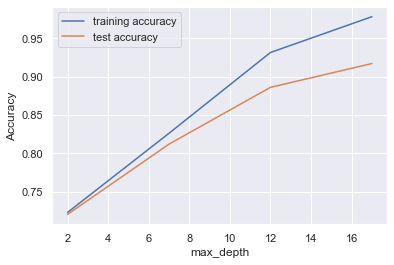

In [320]:
# plotting accuracies with max_depth
plt.figure()
plt.plot(scores_random_forest["param_max_depth"], 
         scores_random_forest["mean_train_score"], 
         label="training accuracy")
plt.plot(scores_random_forest["param_max_depth"], 
         scores_random_forest["mean_test_score"], 
         label="test accuracy")
plt.xlabel("max_depth")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

#### From the above plot it is clear that max_depth for test data increases sharply till 12 and then not showing that much growth. So will go with 12

In [321]:
# Tuning n_estimators
# GridSearchCV to find optimal n_estimators
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV

# specify number of folds for k-fold CV
n_folds = 5

# parameters to build the model on
parameters = {'n_estimators': range(100, 1500, 400)}

# instantiate the model
rf_hyper = RandomForestClassifier()


# fit tree on training data
rf_hyper = GridSearchCV(rf_hyper, parameters, 
                    cv=n_folds, 
                   scoring="accuracy", n_jobs=-1,
                 return_train_score=True)
rf_hyper.fit(df_train_pca, y_train_sm)

GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=RandomForestClassifier(bootstrap=True, class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators='warn', n_jobs=None,
                                              oob_score=False,
                                              random_state=None, verbose=0,
                                              warm_start=False),
             iid

In [322]:
# scores of GridSearch CV
scores_random_forest = rf_hyper.cv_results_
pd.DataFrame(scores_random_forest).head()

mean_fit_time  std_fit_time  mean_score_time  std_score_time  \
0      30.982229      0.139324         0.256115        0.011689   
1     156.030147      1.043444         1.257074        0.030508   
2     274.047123      5.448669         2.168827        0.076165   
3     331.705851     32.810292         2.322367        0.292167   

  param_n_estimators                  params  split0_test_score  \
0                100   {'n_estimators': 100}           0.940021   
1                500   {'n_estimators': 500}           0.940541   
2                900   {'n_estimators': 900}           0.941842   
3               1300  {'n_estimators': 1300}           0.941712   

   split1_test_score  split2_test_score  split3_test_score  split4_test_score  \
0           0.940265           0.941046           0.942087           0.941176   
1           0.944820           0.943389           0.944300           0.943779   
2           0.943259           0.942868           0.944690           0.943259   
3           0.944430           0.942738           0.944690           0.943389   

   mean_test_score  std_test_score  rank_test_score  split0_train_score  \
0         0.940919        0.000732                4                 1.0   
1         0.943366        0.001493                2                 1.0   
2         0.943184        0.000914                3                 1.0   
3         0.943392        0.001097                1                 1.0   

   split1_train_score  split2_train_score  split3_train_score  \
0                 1.0                 1.0                 1.0   
1                 1.0                 1.0                 1.0   
2                 1.0                 1.0                 1.0   
3                 1.0                 1.0                 1.0   

   split4_train_score  mean_train_score  std_train_score  
0                 1.0               1.0              0.0  
1                 1.0               1.0              0.0  
2                 1.0               1.0              0.0  
3                 1.0               1.0              0.0

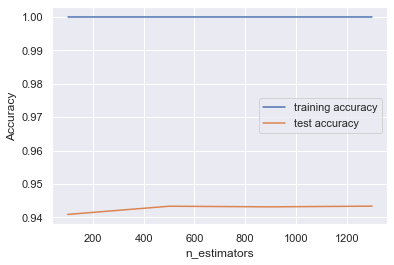

In [323]:
# plotting accuracies with n_estimators
plt.figure()
plt.plot(scores_random_forest["param_n_estimators"], 
         scores_random_forest["mean_train_score"], 
         label="training accuracy")
plt.plot(scores_random_forest["param_n_estimators"], 
         scores_random_forest["mean_test_score"], 
         label="test accuracy")
plt.xlabel("n_estimators")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

#### Test score is high at param_n_estimators= 500 and then flatten up

In [324]:
# specify number of folds for k-fold CV
n_folds = 5

# parameters to build the model on
parameters = {'max_features': [4, 8, 14, 20, 24]}

# instantiate the model
rf_hyper = RandomForestClassifier()


# fit tree on training data
rf_hyper = GridSearchCV(rf_hyper, parameters, 
                    cv=n_folds, 
                   scoring="accuracy", n_jobs=-1,
                 return_train_score=True)
rf_hyper.fit(df_train_pca, y_train_sm)

GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=RandomForestClassifier(bootstrap=True, class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators='warn', n_jobs=None,
                                              oob_score=False,
                                              random_state=None, verbose=0,
                                              warm_start=False),
             iid

In [325]:
# scores of GridSearch CV
scores_random_forest = rf_hyper.cv_results_
pd.DataFrame(scores_random_forest).head()

mean_fit_time  std_fit_time  mean_score_time  std_score_time  \
0       2.682826      0.169136         0.048189        0.028260   
1       6.483580      0.501017         0.040707        0.010703   
2       9.981288      0.255287         0.028622        0.001312   
3      13.567787      0.330359         0.027033        0.000794   
4      11.798579      1.821630         0.017364        0.003661   

  param_max_features                params  split0_test_score  \
0                  4   {'max_features': 4}           0.926360   
1                  8   {'max_features': 8}           0.928311   
2                 14  {'max_features': 14}           0.922977   
3                 20  {'max_features': 20}           0.919594   
4                 24  {'max_features': 24}           0.917122   

   split1_test_score  split2_test_score  split3_test_score  split4_test_score  \
0           0.925169           0.929204           0.932197           0.925560   
1           0.926340           0.922046           0.925299           0.920354   
2           0.918792           0.923607           0.925820           0.918792   
3           0.920094           0.917491           0.924388           0.919964   
4           0.916710           0.921135           0.919053           0.916840   

   mean_test_score  std_test_score  rank_test_score  split0_train_score  \
0         0.927698        0.002656                1            0.997592   
1         0.924470        0.002890                2            0.997755   
2         0.921998        0.002782                3            0.997300   
3         0.920306        0.002248                4            0.996616   
4         0.918172        0.001707                5            0.997267   

   split1_train_score  split2_train_score  split3_train_score  \
0            0.998081            0.997723            0.997788   
1            0.997723            0.997462            0.997397   
2            0.997039            0.997007            0.997755   
3            0.996649            0.997039            0.997072   
4            0.996714            0.997039            0.995706   

   split4_train_score  mean_train_score  std_train_score  
0            0.997788          0.997794         0.000160  
1            0.997527          0.997573         0.000142  
2            0.996942          0.997209         0.000299  
3            0.996682          0.996812         0.000201  
4            0.996909          0.996727         0.000541

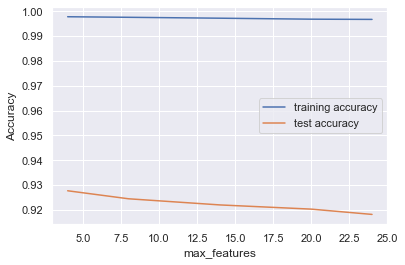

In [326]:
# plotting accuracies with max_features
plt.figure()
plt.plot(scores_random_forest["param_max_features"], 
         scores_random_forest["mean_train_score"], 
         label="training accuracy")
plt.plot(scores_random_forest["param_max_features"], 
         scores_random_forest["mean_test_score"], 
         label="test accuracy")
plt.xlabel("max_features")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

#### From the plot above it is clear that for both tarin and test mean_test_score decreases with increased number of features. We see 3 feature is optimum, but that will be too less, so will go with 10

In [327]:
# specify number of folds for k-fold CV
n_folds = 5

# parameters to build the model on
parameters = {'min_samples_leaf': range(100, 400, 50)}

# instantiate the model
rf_hyper = RandomForestClassifier()


# fit tree on training data
rf_hyper = GridSearchCV(rf_hyper, parameters, 
                    cv=n_folds, 
                   scoring="accuracy", n_jobs=-1,
                 return_train_score=True)
rf_hyper.fit(df_train_pca, y_train_sm)

GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=RandomForestClassifier(bootstrap=True, class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators='warn', n_jobs=None,
                                              oob_score=False,
                                              random_state=None, verbose=0,
                                              warm_start=False),
             iid

In [328]:
# scores of GridSearch CV
scores_random_forest = rf_hyper.cv_results_
pd.DataFrame(scores_random_forest).head()

mean_fit_time  std_fit_time  mean_score_time  std_score_time  \
0       1.929569      0.029363         0.020957        0.002782   
1       1.837161      0.056246         0.016909        0.003940   
2       1.773596      0.039047         0.018125        0.003126   
3       1.668069      0.028188         0.018137        0.003127   
4       1.563285      0.089149         0.017320        0.003761   

  param_min_samples_leaf                     params  split0_test_score  \
0                    100  {'min_samples_leaf': 100}           0.808223   
1                    150  {'min_samples_leaf': 150}           0.801848   
2                    200  {'min_samples_leaf': 200}           0.792090   
3                    250  {'min_samples_leaf': 250}           0.784153   
4                    300  {'min_samples_leaf': 300}           0.776477   

   split1_test_score  split2_test_score  split3_test_score  split4_test_score  \
0           0.805830           0.820536           0.818714           0.817673   
1           0.806091           0.807522           0.814810           0.808954   
2           0.795809           0.798933           0.807132           0.799193   
3           0.798803           0.799323           0.798803           0.795549   
4           0.787611           0.780062           0.791775           0.793727   

   mean_test_score  std_test_score  rank_test_score  split0_train_score  \
0         0.814195        0.005973                1            0.831208   
1         0.807844        0.004217                2            0.819918   
2         0.798631        0.004968                3            0.811003   
3         0.795326        0.005746                4            0.802512   
4         0.785930        0.006657                5            0.795224   

   split1_train_score  split2_train_score  split3_train_score  \
0            0.823736            0.831056            0.830991   
1            0.818726            0.819474            0.814594   
2            0.810007            0.806689            0.807535   
3            0.805583            0.807535            0.799922   
4            0.797482            0.788731            0.795595   

   split4_train_score  mean_train_score  std_train_score  
0            0.830893          0.829577         0.002922  
1            0.816807          0.817904         0.001968  
2            0.807177          0.808482         0.001703  
3            0.799824          0.803075         0.003066  
4            0.796994          0.794805         0.003151

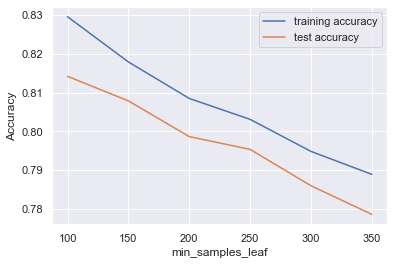

In [329]:
# plotting accuracies with min_samples_leaf
plt.figure()
plt.plot(scores_random_forest["param_min_samples_leaf"], 
         scores_random_forest["mean_train_score"], 
         label="training accuracy")
plt.plot(scores_random_forest["param_min_samples_leaf"], 
         scores_random_forest["mean_test_score"], 
         label="test accuracy")
plt.xlabel("min_samples_leaf")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

#### From the above plot is it clear that both train and test score are max when min_sample_leaf = 100. After that accuracy decreases for both train and test data

In [330]:
# specify number of folds for k-fold CV
n_folds = 5

# parameters to build the model on
parameters = {'min_samples_split': range(200, 500, 50)}

# instantiate the model
rf_hyper = RandomForestClassifier()


# fit tree on training data
rf_hyper = GridSearchCV(rf_hyper, parameters, 
                    cv=n_folds, 
                   scoring="accuracy",
                   return_train_score=True)
rf_hyper.fit(df_train_pca, y_train_sm)

GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=RandomForestClassifier(bootstrap=True, class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators='warn', n_jobs=None,
                                              oob_score=False,
                                              random_state=None, verbose=0,
                                              warm_start=False),
             iid

In [331]:
# scores of GridSearch CV
scores_random_forest = rf_hyper.cv_results_
pd.DataFrame(scores_random_forest).head()

mean_fit_time  std_fit_time  mean_score_time  std_score_time  \
0       1.007794      0.017225         0.011602        0.003029   
1       0.966109      0.009150         0.008106        0.003042   
2       0.967698      0.013854         0.009600        0.000740   
3       0.972050      0.028394         0.008295        0.003122   
4       0.964227      0.028763         0.010081        0.001039   

  param_min_samples_split                      params  split0_test_score  \
0                     200  {'min_samples_split': 200}           0.829560   
1                     250  {'min_samples_split': 250}           0.818631   
2                     300  {'min_samples_split': 300}           0.814858   
3                     350  {'min_samples_split': 350}           0.813167   
4                     400  {'min_samples_split': 400}           0.803409   

   split1_test_score  split2_test_score  split3_test_score  split4_test_score  \
0           0.841749           0.835372           0.840838           0.843831   
1           0.832249           0.828475           0.832900           0.830297   
2           0.820146           0.820276           0.822358           0.826393   
3           0.818324           0.821577           0.820146           0.819625   
4           0.816111           0.813639           0.820406           0.812988   

   mean_test_score  std_test_score  rank_test_score  split0_train_score  \
0         0.838270        0.005175                1            0.862246   
1         0.828510        0.005178                2            0.852746   
2         0.820806        0.003734                3            0.845230   
3         0.818567        0.002895                4            0.839179   
4         0.813310        0.005594                5            0.828963   

   split1_train_score  split2_train_score  split3_train_score  \
0            0.863622            0.859913            0.857603   
1            0.852593            0.844557            0.849893   
2            0.842247            0.838213            0.836652   
3            0.831739            0.837010            0.832748   
4            0.833073            0.828811            0.825493   

   split4_train_score  mean_train_score  std_train_score  
0            0.862190          0.861115         0.002121  
1            0.848852          0.849728         0.002995  
2            0.842052          0.840879         0.003071  
3            0.837920          0.835719         0.002938  
4            0.825200          0.828308         0.002863

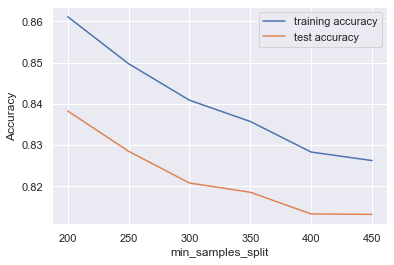

In [332]:
# plotting accuracies with min_samples_split
plt.figure()
plt.plot(scores_random_forest["param_min_samples_split"], 
         scores_random_forest["mean_train_score"], 
         label="training accuracy")
plt.plot(scores_random_forest["param_min_samples_split"], 
         scores_random_forest["mean_test_score"], 
         label="test accuracy")
plt.xlabel("min_samples_split")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

#### From the above plot, it is observed that optimum value of min_sample_split=200

In [333]:
# Create the parameter grid based on the results of random search 
param_grid = {
    'max_depth': [8,10],
    'min_samples_leaf': range(100, 200, 100),
    'min_samples_split': range(200, 400, 100),
    'n_estimators': range(200, 400, 100), 
    'max_features': [8, 10, 12]
}
# Create a based model
rf_hyper = RandomForestClassifier()

# Instantiate the grid search model
grid_search = GridSearchCV(estimator = rf_hyper, param_grid = param_grid,refit='recall_score' ,
                          cv = 5, n_jobs=-1, verbose = 1)

In [334]:
# Fit the grid search to the data
grid_search.fit(df_train_pca, y_train_sm)

Fitting 5 folds for each of 24 candidates, totalling 120 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:  5.5min
[Parallel(n_jobs=-1)]: Done 120 out of 120 | elapsed: 20.4min finished


GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=RandomForestClassifier(bootstrap=True, class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators='warn', n_jobs=None,
                                              oob_score=False,
                                              random_state=None, verbose=0,
                                              warm_start=False),
             iid

In [335]:
# printing the optimal accuracy score and hyperparameters
print('Best Accuracy score along with the list of hyperameters',grid_search.best_score_,'using',grid_search.best_params_)

Best Accuracy score along with the list of hyperameters 0.8215605642600593 using {'max_depth': 10, 'max_features': 12, 'min_samples_leaf': 100, 'min_samples_split': 200, 'n_estimators': 300}


In [336]:
# model with the best hyperparameters
from sklearn.ensemble import RandomForestClassifier
rfc_final = RandomForestClassifier(bootstrap=True, max_depth=10,
                             min_samples_leaf=100, 
                             min_samples_split=200,
                             max_features=12,
                             n_estimators=300)

In [337]:
# fit
rfc_final.fit(df_train_pca,y_train_sm)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=10, max_features=12, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=100, min_samples_split=200,
                       min_weight_fraction_leaf=0.0, n_estimators=300,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [338]:
# predict
y_pred_rf_hyper_final = rfc_final.predict(df_test_pca)

In [339]:
print(classification_report(y_test,y_pred_rf_hyper_final))
print(confusion_matrix(y_test,y_pred_rf_hyper_final))
print('accuracy_score:  ',accuracy_score(y_test,y_pred_rf_hyper_final))

              precision    recall  f1-score   support

           0       0.97      0.82      0.89      8179
           1       0.29      0.72      0.41       815

    accuracy                           0.81      8994
   macro avg       0.63      0.77      0.65      8994
weighted avg       0.91      0.81      0.85      8994

[[6738 1441]
 [ 232  583]]
accuracy_score:   0.8139871025127863


In [340]:
# Confusion Matrix
confusion_rf_hyper=confusion_matrix(y_test,y_pred_rf_hyper_final)
confusion_rf_hyper

array([[6738, 1441],
       [ 232,  583]], dtype=int64)

In [341]:
TP = confusion_rf_hyper[1,1] # true positive 
TN = confusion_rf_hyper[0,0] # true negatives
FP = confusion_rf_hyper[0,1] # false positives
FN = confusion_rf_hyper[1,0] # false negatives

print('Acuracy Score', accuracy_score(y_test,y_pred_default))

# Let's see the sensitivity of our logistic regression model
print('Sensitivity/ Recall(Churn Correctly Detected): ', TP / float(TP+FN))

# positive predictive value 
print('Precision or positive predictive value: ', TP / float(TP+FP))

# Let us calculate specificity
print('Specificity: ',TN / float(TN+FP))

# Calculate false postive rate - predicting churn when customer does not have churned
print('false postive rate: ',FP/ float(TN+FP))

# Negative predictive value
print('Negative predictive value: ',TN / float(TN+ FN))

## Misclassification rate
print('Misclassification Rate: ',(FN+FP)/(TP+TN+FP+FN))

Acuracy Score 0.885256837891928
Sensitivity/ Recall(Churn Correctly Detected):  0.7153374233128834
Precision or positive predictive value:  0.28804347826086957
Specificity:  0.823817092554102
false postive rate:  0.17618290744589804
Negative predictive value:  0.9667144906743185
Misclassification Rate:  0.1860128974872137


<a id='recomen'></a>
### Recomendation for Final Model Selection (With PCA)
- For this dataset after using PCA, Random Forest & Logistic Regression performed better than Decision Tree for Customer Churn Analysis.
- On comparing various values above on varius parameters, we are concluding
- Random Forest is the best model with 88% Accuracy and 71% recall
- For Logistic Regression both accuracy and recall values are 74.7% & 74.9%

#### Below is the overall Summary of the various model performance on various parameters
##### RandomForest
- Accuracy Score:  88%
- Sensitivity   :  71%


##### LogisticRegression 
- Accuracy Score : 75%
- Sensitivity    : 75%

##### LogisticRegression (RFE) 
- Accuracy Score : 76%
- Sensitivity    : 76%

##### DecisionTree
- Accuracy Score : 66%
- Sensitivity    : 65%

<a id='ooo'></a>
## Summary and Recommendation

In [342]:
#Let's identify the important variables responsible for Churn
from collections import OrderedDict
feature_names=list(X_train.columns.values)
important_features_dict = {}
for name, importance in zip(feature_names, rfc_final.feature_importances_):
    important_features_dict[name]=importance
#Sorting Dictionary in descending order of the importance variable
dict_sorted = OrderedDict(sorted(important_features_dict.items(), 
                                  key=lambda kv: kv[1], reverse=True))

In [343]:
#Importance of top 10 features
dic= dict(dict_sorted)

from itertools import islice

def find(n, iterable):
    "Return first n items of the iterable as a list"
    return list(islice(iterable, n))

# Let's define the number of feature required
n=10
n_items = find(n, dic.items())

In [344]:
print('Please find the top 10 driver features responsible for Churn: ',n_items)

Please find the top 10 driver features responsible for Churn:  [('offnet_mou_7', 0.2761281111167887), ('spl_og_mou_8', 0.1965174813492394), ('loc_og_t2c_mou_8', 0.06747541230114015), ('std_og_t2f_mou_7', 0.05996135803353091), ('roam_og_mou_6', 0.047420520464519424), ('arpu_7', 0.044683169192784186), ('arpu_6', 0.04021545855196985), ('loc_og_t2f_mou_6', 0.03925246192981848), ('loc_og_t2m_mou_6', 0.03621048436934917), ('roam_ic_mou_8', 0.025613671164883247)]


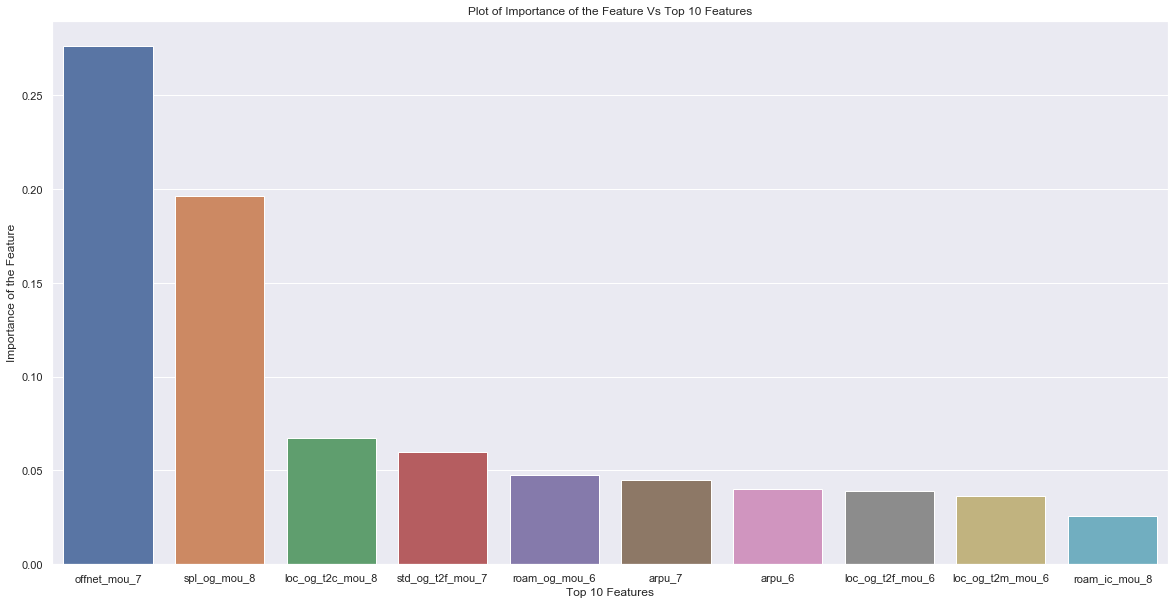

In [345]:
imp=rfc_final.feature_importances_
names=X_train.columns.values
imp,names=zip(*sorted(zip(imp,names)))

df_imp=pd.DataFrame({"Variable":names,"importance":imp})
df_imp = df_imp.sort_values(by="importance",axis=0,ascending=False)
df_imp = df_imp.reset_index(drop=True)


plt.figure(figsize=(20, 10))

ax_plot_feature_importance = sns.barplot(x='Variable', y= 'importance', data=df_imp[0:10])
ax_plot_feature_importance.set(xlabel = 'Top 10 Features', ylabel = 'Importance')
ax_plot_feature_importance.set_ylabel('Importance of the Feature')
ax_plot_feature_importance.set_xlabel('Top 10 Features')
ax_plot_feature_importance.set_title('Plot of Importance of the Feature Vs Top 10 Features')
plt.show()

#### Above plot is depicting the top 10 features along with their importance for predicting the Customer Churn

- From the above plot it is concluded that `offnet_mou_7` is the top most feature for predicting Customer Churn followed by `spl_og_mou_8`

#### Recommendation

- Entire analysis is done on high value customers and we see very few cusomers are churning out (8.6%)
- According to the above analysis Random Forest model is the best for predicting the Customer Churn, followed by Logistic Regression. So use this technique to predict the probable churn customers
- From the EDA section it is observed that most of the customer churns happen between 25th to 31st of the month. So sending out different attractive offers from 20th of the month to retain the customers
- Focus on customers making more offnet calls. There are chances that customer may churn
- Look out for customers who are making more outgoing special calls (spl_og_mou_8) in 8th month. There are chances that these customer may churn
- loc_og_t2c_mou_8 - Focus on these customers who are more ofeten calling the T operator own call center on the 8th month. They might be facing some problem and if that don't get resolved, these customer may churn
- Focus on those customers, who are making more outgoing calls or receiving incoming calls in roaming in the 8th month. These customer have more probability of churn